In [1]:
from css_utility import *
from wordcloud import WordCloud
import stylecloud
from collections import Counter

/home/lee/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import logomaker

In [11]:
state_col_dict_num

{'A': (1.0, 0.0, 0.0),
 'B': (1.0, 0.271, 0.0),
 'C': (0.196, 0.804, 0.196),
 'D': (0.0, 0.502, 0.0),
 'E': (0.0, 0.392, 0.0),
 'F': (0.761, 0.882, 0.02),
 'G': (1.0, 1.0, 0.0),
 'H': (0.4, 0.804, 0.667),
 'I': (0.541, 0.569, 0.816),
 'J': (0.804, 0.361, 0.361),
 'K': (0.914, 0.588, 0.478),
 'L': (0.741, 0.718, 0.42),
 'M': (0.502, 0.502, 0.502),
 'N': (0.753, 0.753, 0.753),
 'O': (0.941, 0.941, 0.941)}

In [187]:
letters=["A","B","C","D","E"]
scores=[0.1,0.2,0.5,0.2,0.7]
scores_data={}

In [188]:
for i, letter in enumerate(letters):
    score_list=[0]*len(letters)
    score_list[i]=scores[i]
    scores_data[letter]=score_list

In [189]:
scores_df=pd.DataFrame(scores_data)

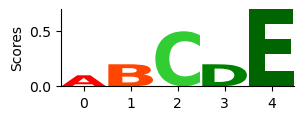

In [190]:
# plt.figure(figsize=(3,1))
logo=logomaker.Logo(scores_df, font_name="sans-serif", color_scheme=state_col_dict_num, figsize=(3,1))
# for letter, color in state_col_dict_num.items():
#     logo.style_glyphs_in_sequence(sequence=letter, color=color)
logo.ax.set_ylabel("Scores")
# logo.ax.set_title("Letter Heights According to Scores")
logo.ax.set_xticks(range(len(scored_df.columns)))
logo.ax.spines["top"].set_visible(False)
logo.ax.spines["right"].set_visible(False)
# logo.ax.spines["left"].set_visible(False)

# logo.fig.show()

In [26]:
path="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not"

In [27]:
atten_path=os.path.join(path,"atten.npy")
# pred_path=os.path.join(path,"pred_results.npy")

In [29]:
with open(atten_path,"rb") as f:
    atten=np.load(f)

In [30]:
# with open(pred_path,"rb") as g:
#     pred=np.load(g)

In [38]:
atten.shape

(1000, 81)

In [41]:
atten

array([[0.10529267, 0.1061179 , 0.10663665, ..., 0.1112875 , 0.10998453,
        0.10973557],
       [0.13960469, 0.23908932, 0.36994302, ..., 0.00892215, 0.00859546,
        0.00842014],
       [0.70822478, 0.43105982, 0.33225884, ..., 0.03953029, 0.03736311,
        0.03842764],
       ...,
       [0.10529267, 0.1061179 , 0.10663665, ..., 0.1112875 , 0.10998453,
        0.10973557],
       [0.00354642, 0.00352609, 0.00438013, ..., 0.00409123, 0.0044855 ,
        0.00320146],
       [0.08188338, 0.05876536, 0.04883464, ..., 0.01936665, 0.01971447,
        0.02035096]])

In [48]:
def get_matWcss(mat_path,dev_path):
    atten_raw=np.load(mat_path)
    atten=pd.DataFrame(atten_raw)
    dev_raw=dev_conv(dev_path) #dev_conv is a function in css_utility
    dev=dev_raw[["ori_seq","label"]]
    dev.reset_index(drop=True, inplace=True)  # remove the header
    
    dev_label_1=dev[dev["label"]==1]
    dev_label_0=dev[dev["label"]==0]

    atten["label"] = dev["label"].values
    atten_label_1=atten[atten["label"]==1]
    dev_label_1.pop("label") # remove the label column
    atten_label_1.pop("label") # remove the label column
    atten_label_0=atten[atten["label"]==0]
    dev_label_0.pop("label") # remove the label column
    atten_label_0.pop("label") # remove the label column
    
    assert len(dev_label_1)==len(atten_label_1)
    assert len(dev_label_0)==len(atten_label_0)
    
    all_dict_1={i:(dev_label_1.loc[i], atten_label_1.loc[i]) for i in dev_label_1.index}
    all_dict_0={i:(dev_label_0.loc[i], atten_label_0.loc[i]) for i in dev_label_0.index}

    ### to use, apply following 
#     for index, (dev_entry, atten_entry) in list(atten_dict_1.items()):
#         dev_tar=dev_entry['ori_seq']
#         atten_tar=atten_entry.values
    
    return all_dict_1, all_dict_0

In [49]:
mat_path="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/atten.npy"
dev_path="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm30_or_not/tr_len_40k/dev.tsv"

In [50]:
all_dict_1, all_dict_0=get_matWcss(mat_path,dev_path)

In [55]:
all_dict_1

{1: (ori_seq    AABBBBGGEEDDFDDDD
  Name: 1, dtype: object,
  0     0.139605
  1     0.239089
  2     0.369943
  3     0.358618
  4     0.364915
          ...   
  76    0.010331
  77    0.009904
  78    0.008922
  79    0.008595
  80    0.008420
  Name: 1, Length: 81, dtype: float64),
 2: (ori_seq    BGGBBB
  Name: 2, dtype: object,
  0     0.708225
  1     0.431060
  2     0.332259
  3     0.295145
  4     0.125993
          ...   
  76    0.038237
  77    0.039837
  78    0.039530
  79    0.037363
  80    0.038428
  Name: 2, Length: 81, dtype: float64),
 3: (ori_seq    DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDFFFFFFBGGGGGG...
  Name: 3, dtype: object,
  0     0.026569
  1     0.026581
  2     0.026650
  3     0.026717
  4     0.026800
          ...   
  76    0.010163
  77    0.010301
  78    0.010400
  79    0.010546
  80    0.010632
  Name: 3, Length: 81, dtype: float64),
 6: (ori_seq    GGGGGGFFGGGEEEEEGEEGEEEEEEEEEEEEEEEEGGGGGGGGGG...
  Name: 6, dtype: object,
  0     0.062076
  1     0

In [67]:
all_dict_1.values()

dict_values([(ori_seq    AABBBBGGEEDDFDDDD
Name: 1, dtype: object, 0     0.139605
1     0.239089
2     0.369943
3     0.358618
4     0.364915
        ...   
76    0.010331
77    0.009904
78    0.008922
79    0.008595
80    0.008420
Name: 1, Length: 81, dtype: float64), (ori_seq    BGGBBB
Name: 2, dtype: object, 0     0.708225
1     0.431060
2     0.332259
3     0.295145
4     0.125993
        ...   
76    0.038237
77    0.039837
78    0.039530
79    0.037363
80    0.038428
Name: 2, Length: 81, dtype: float64), (ori_seq    DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDFFFFFFBGGGGGG...
Name: 3, dtype: object, 0     0.026569
1     0.026581
2     0.026650
3     0.026717
4     0.026800
        ...   
76    0.010163
77    0.010301
78    0.010400
79    0.010546
80    0.010632
Name: 3, Length: 81, dtype: float64), (ori_seq    GGGGGGFFGGGEEEEEGEEGEEEEEEEEEEEEEEEEGGGGGGGGGG...
Name: 6, dtype: object, 0     0.062076
1     0.056335
2     0.055720
3     0.050591
4     0.183215
        ...   
76    0.102843
77  

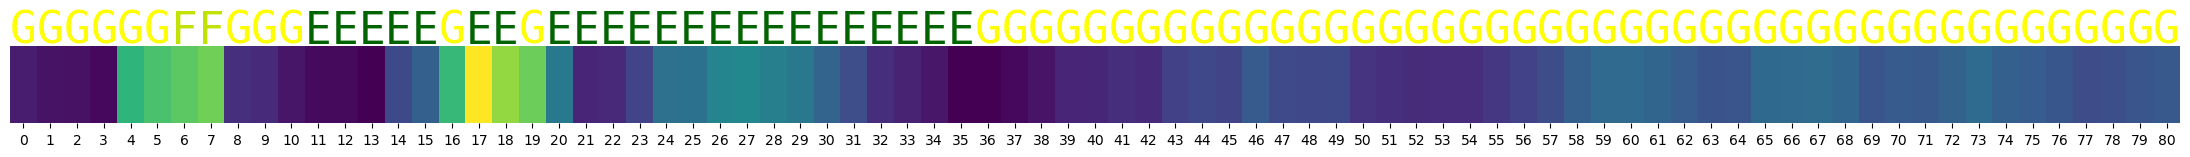

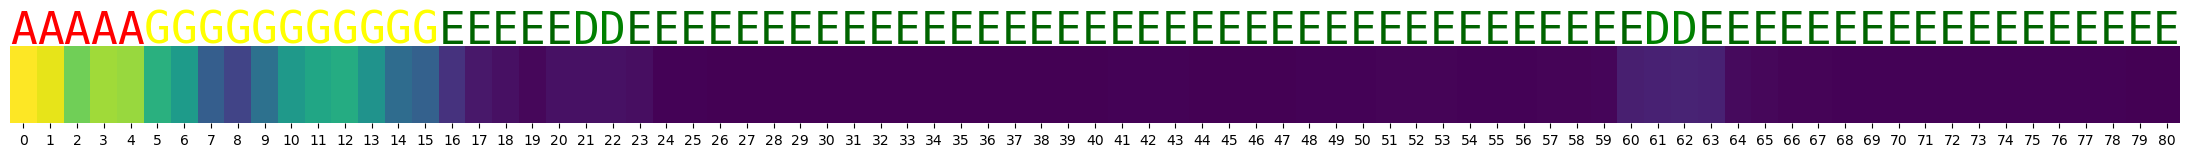

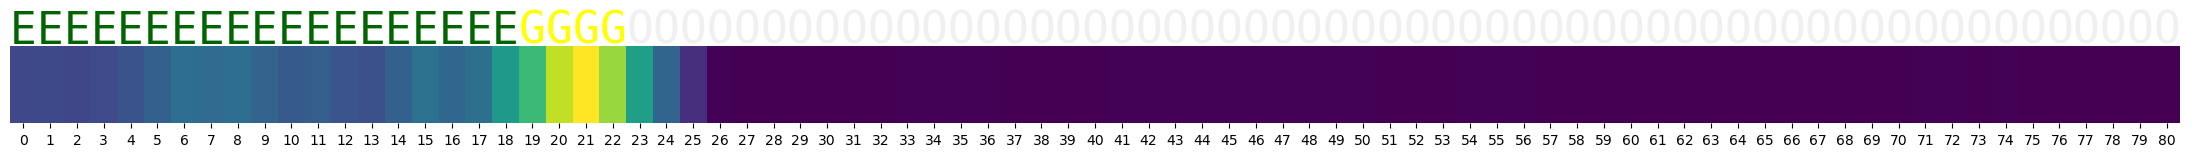

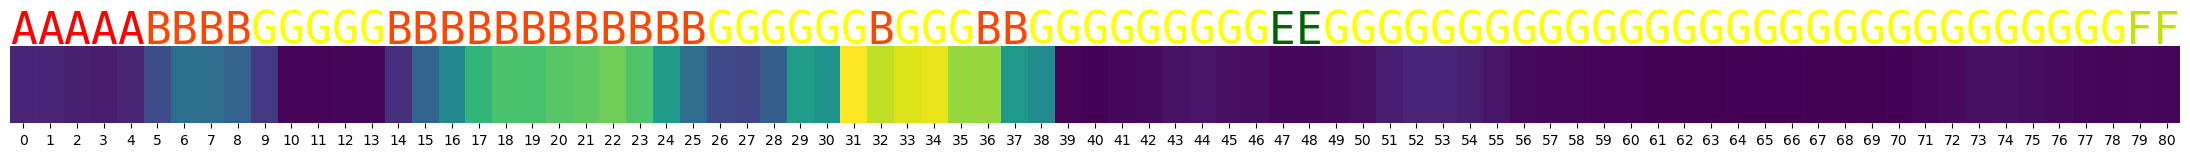

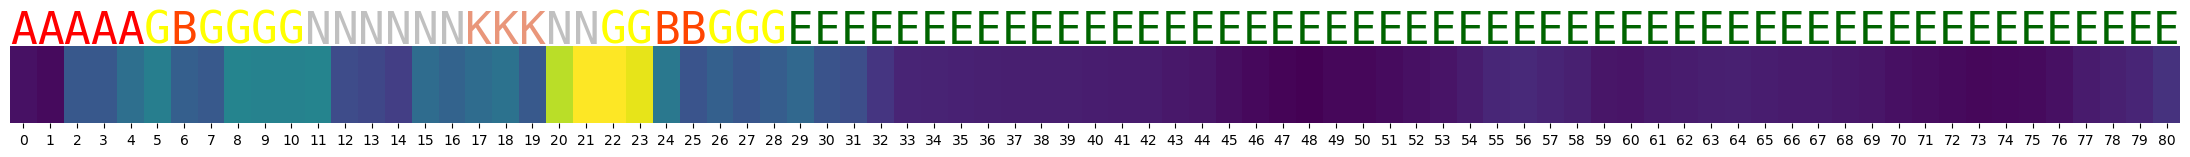

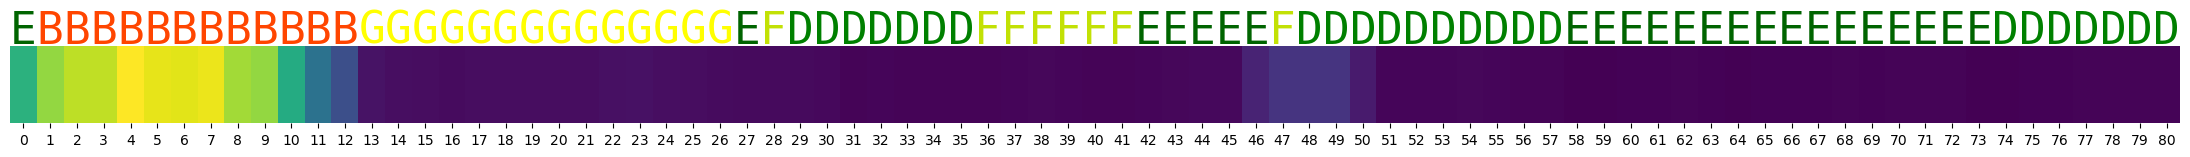

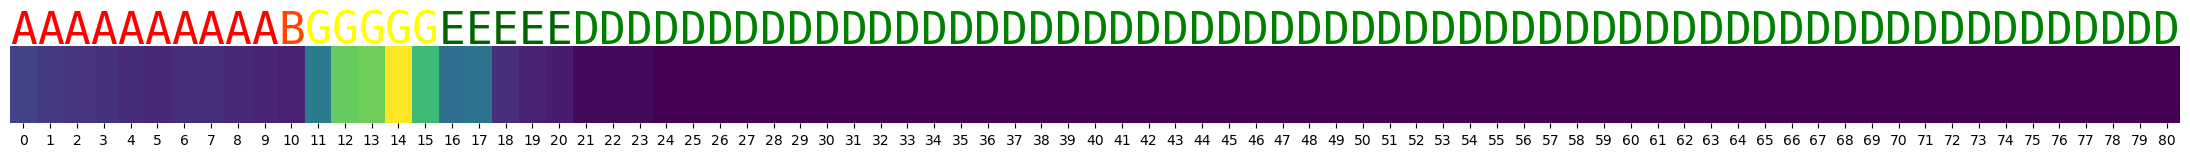

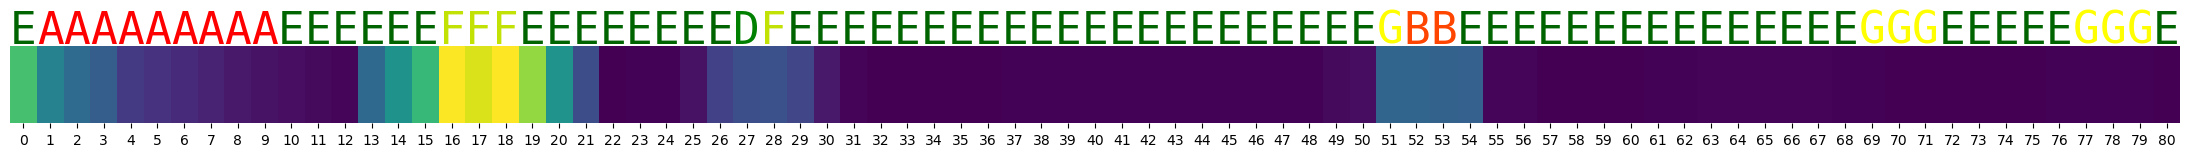

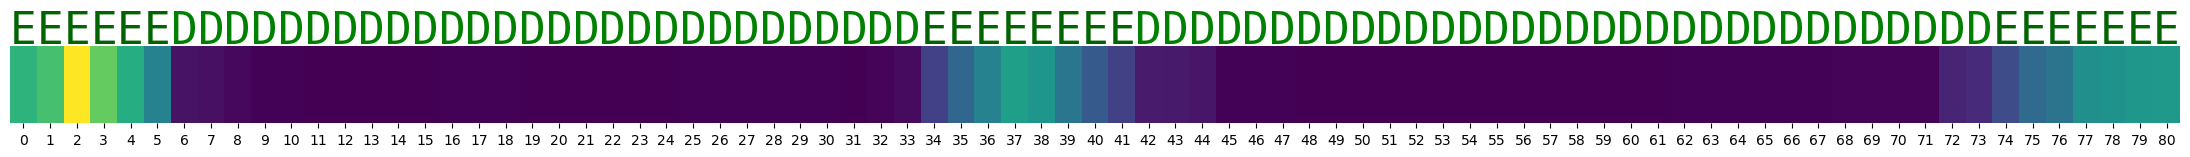

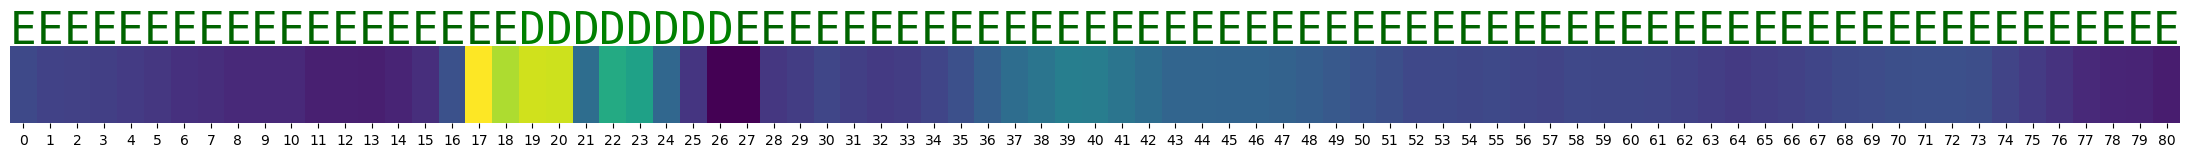

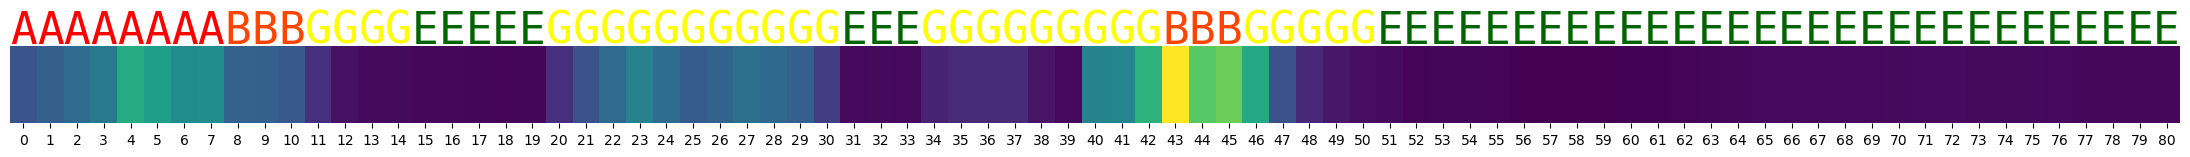

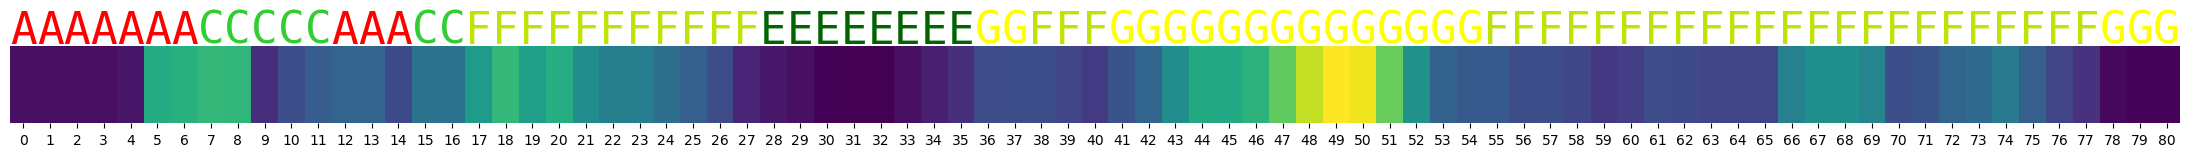

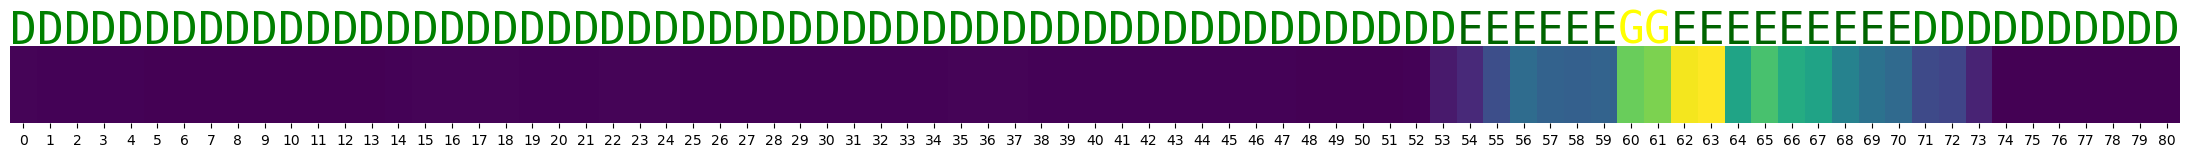

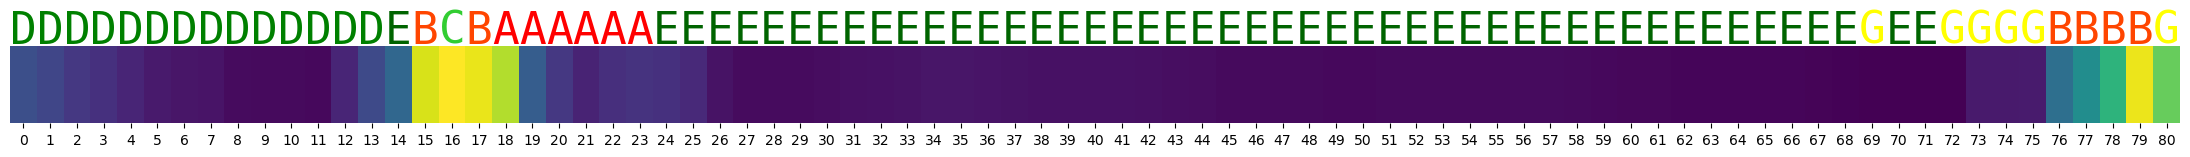

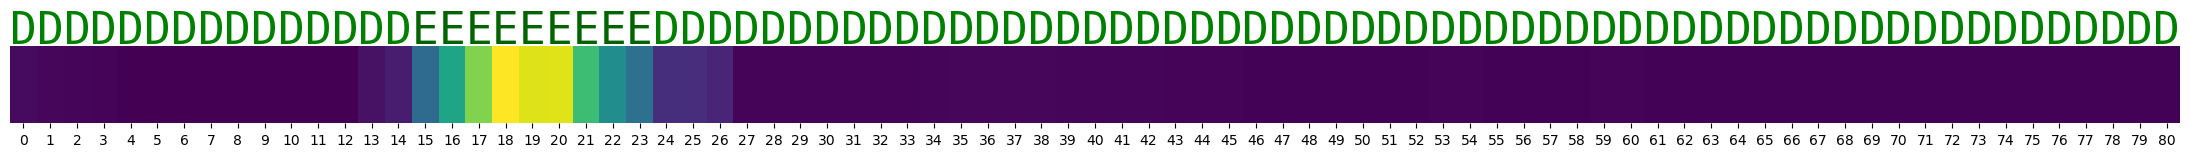

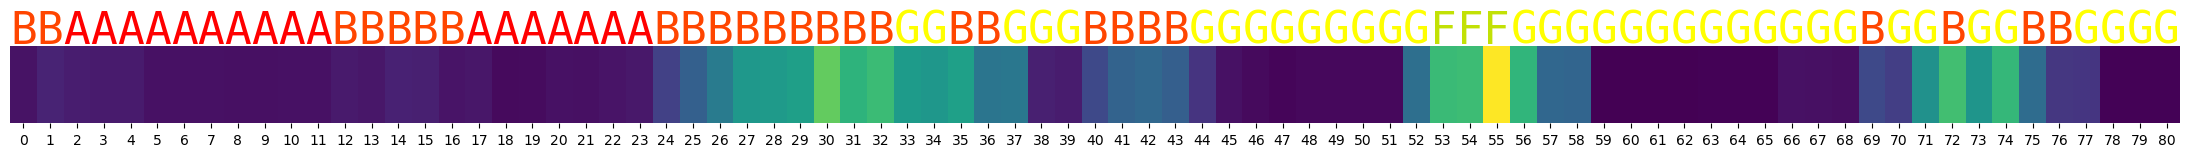

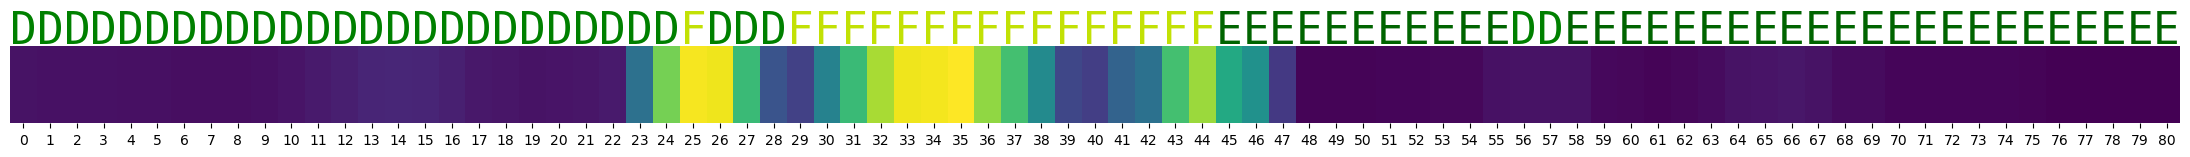

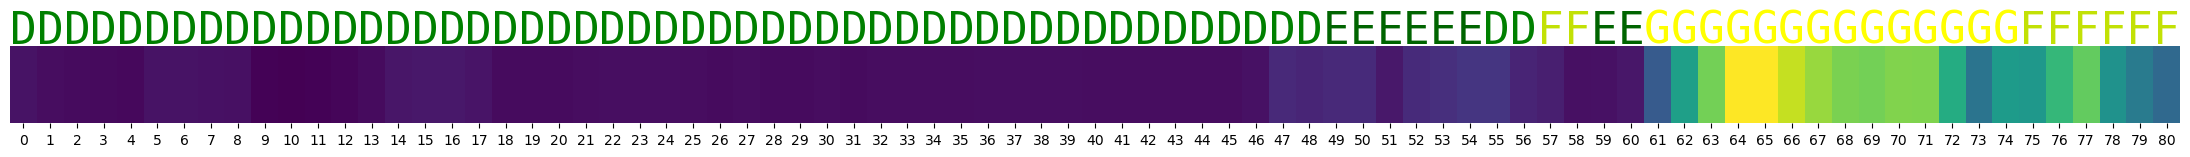

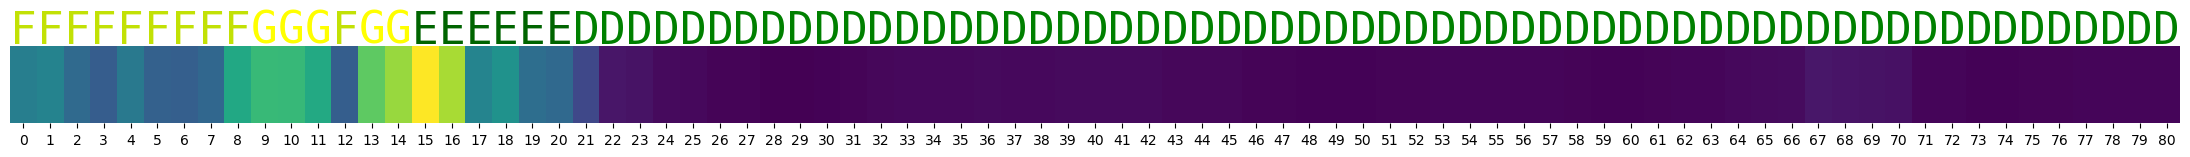

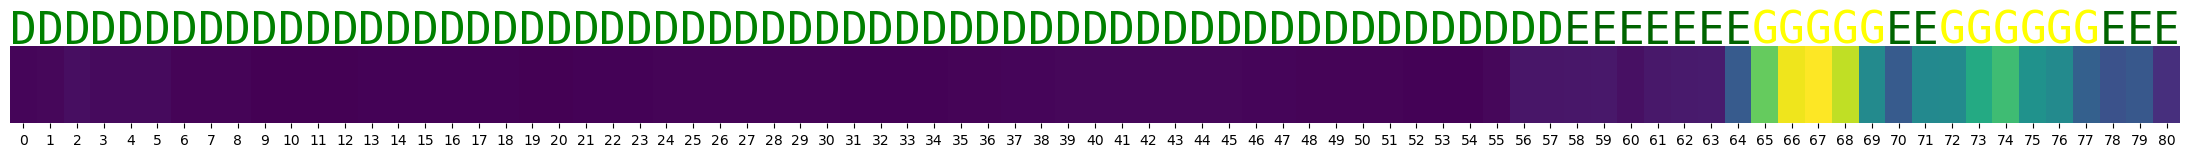

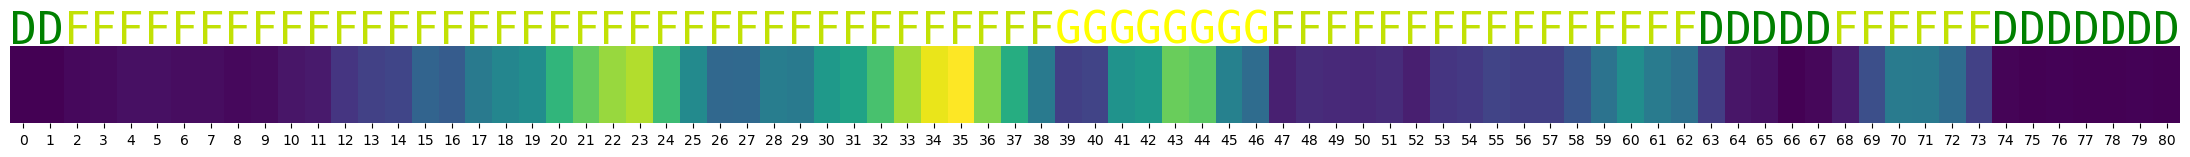

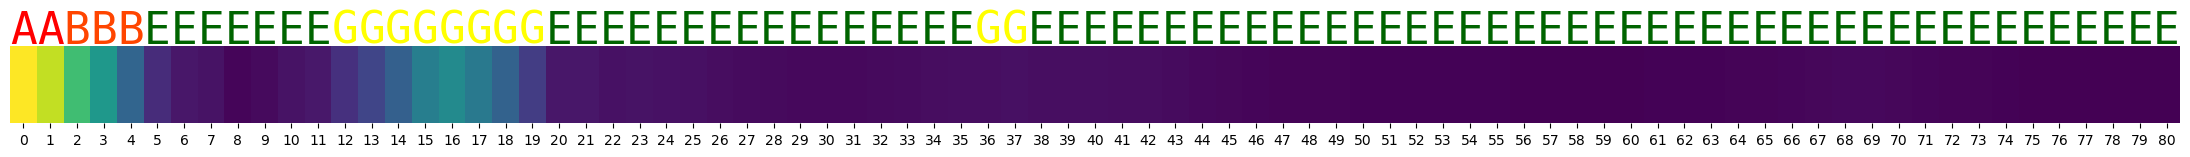

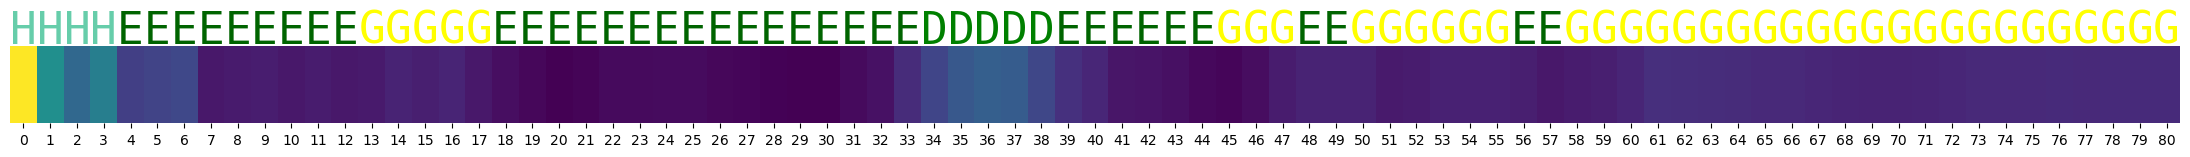

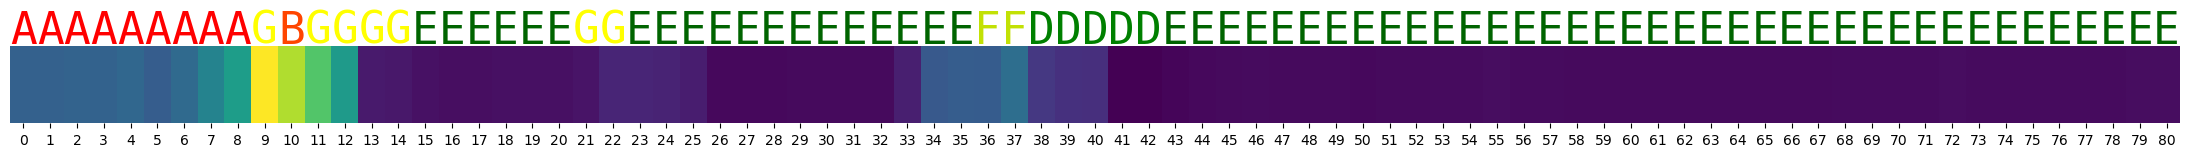

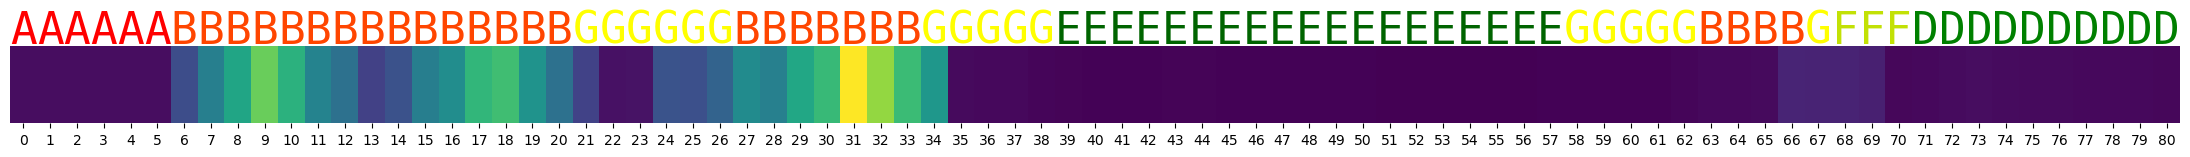

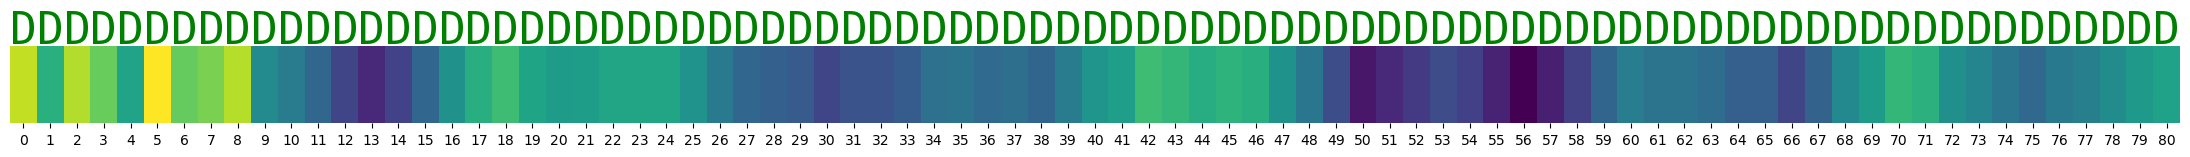

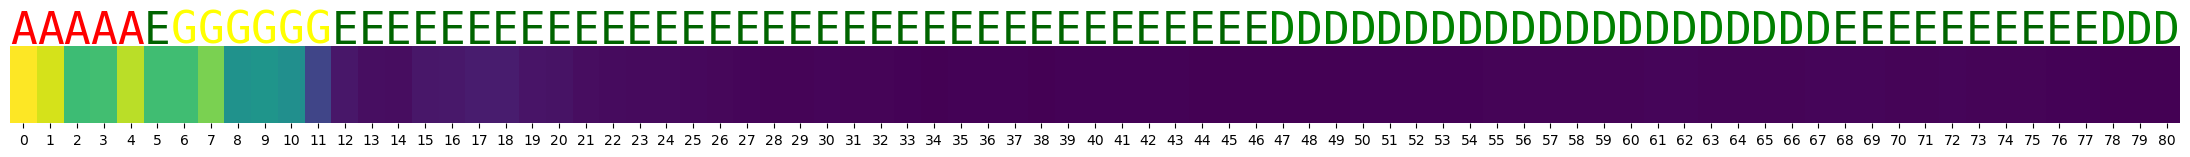

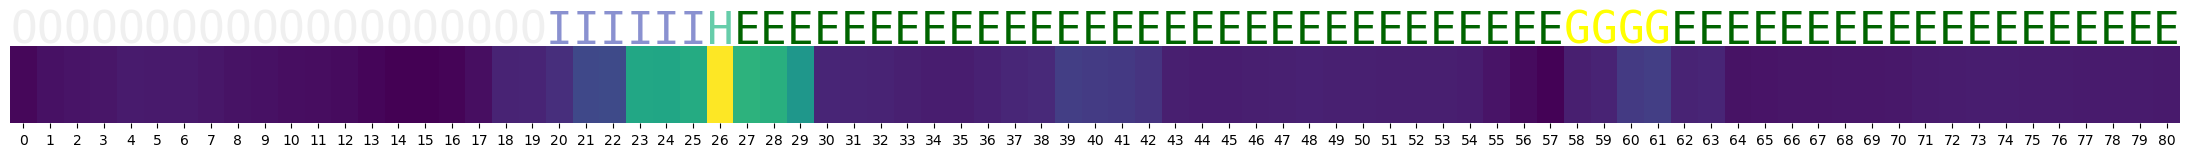

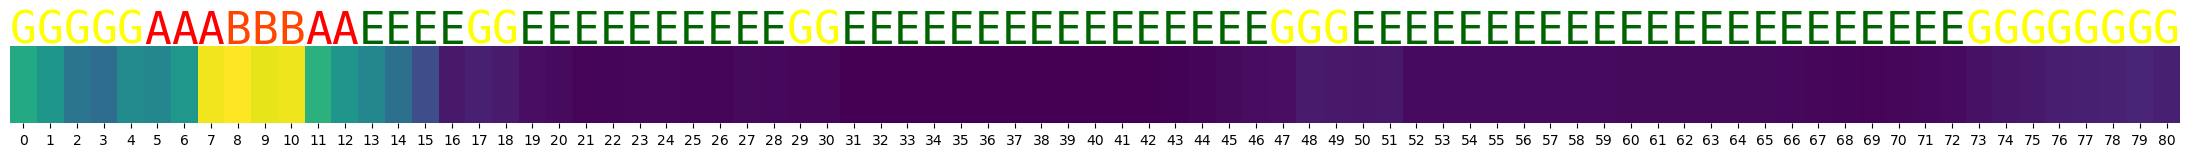

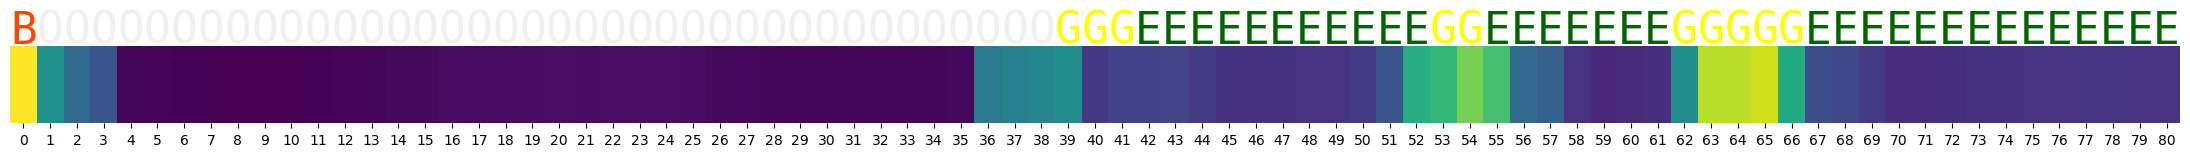

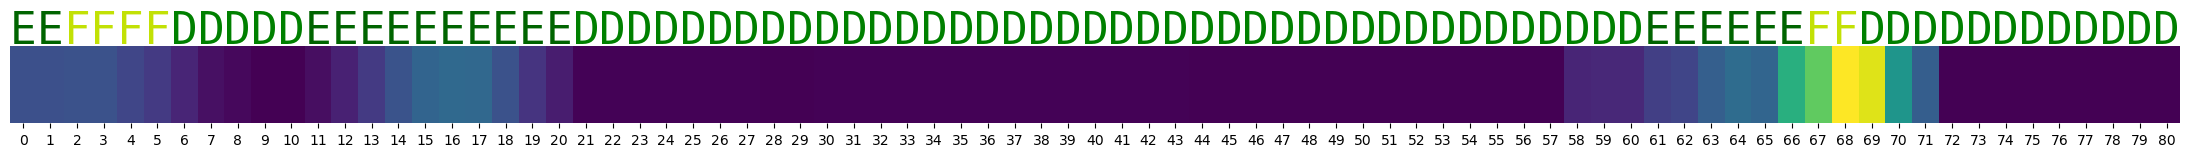

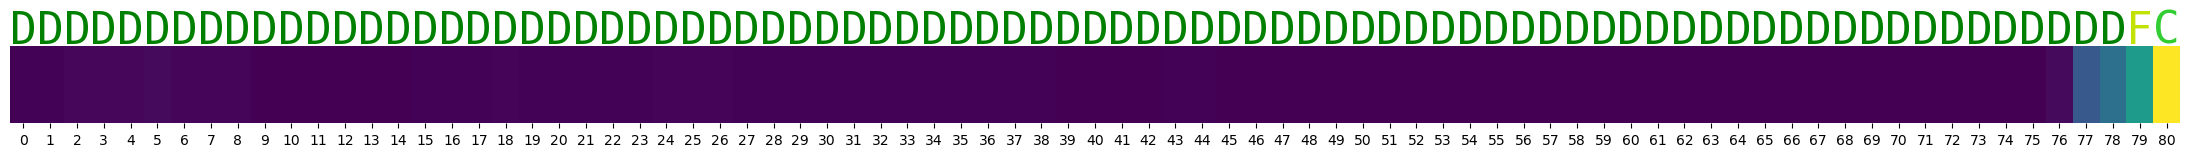

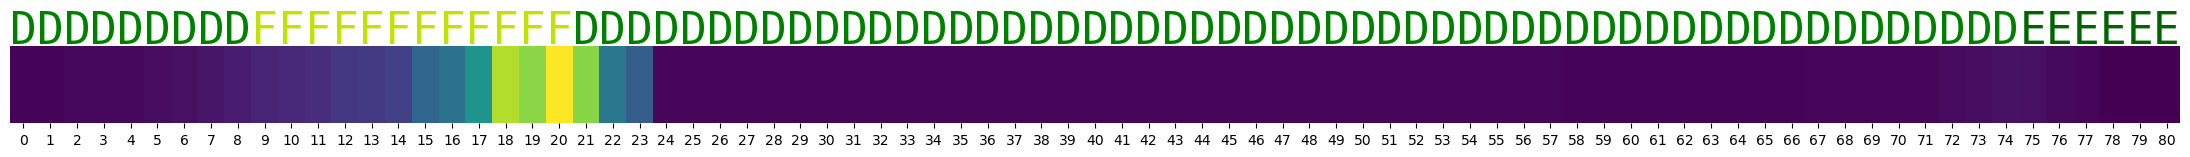

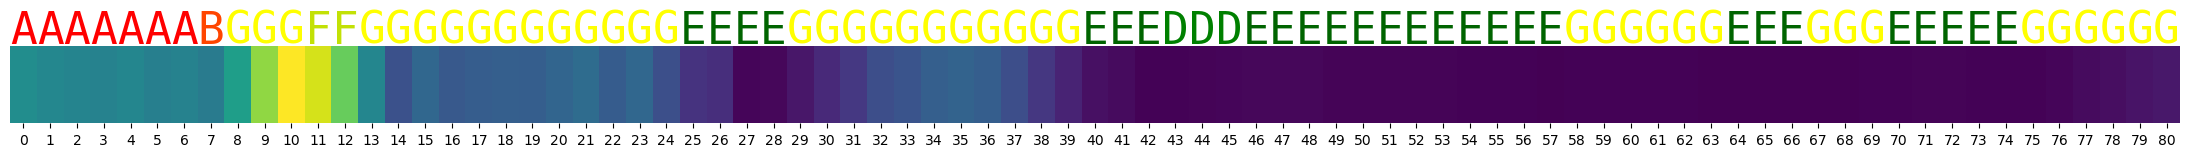

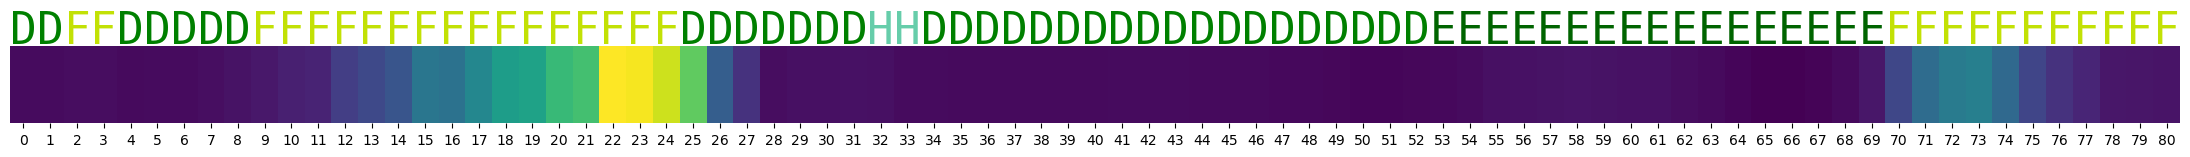

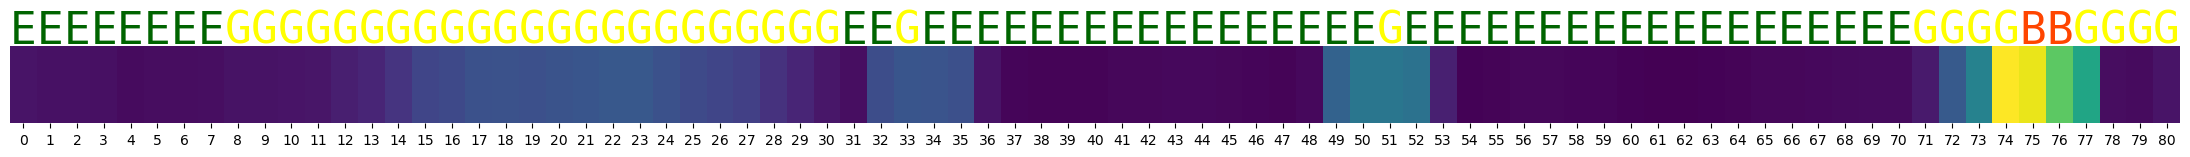

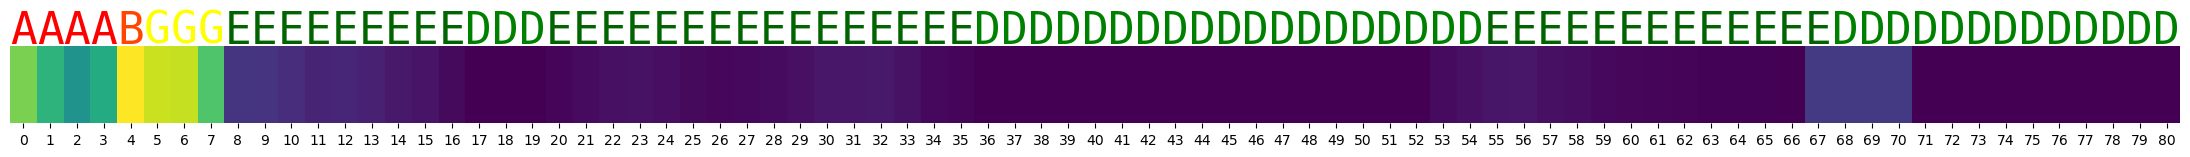

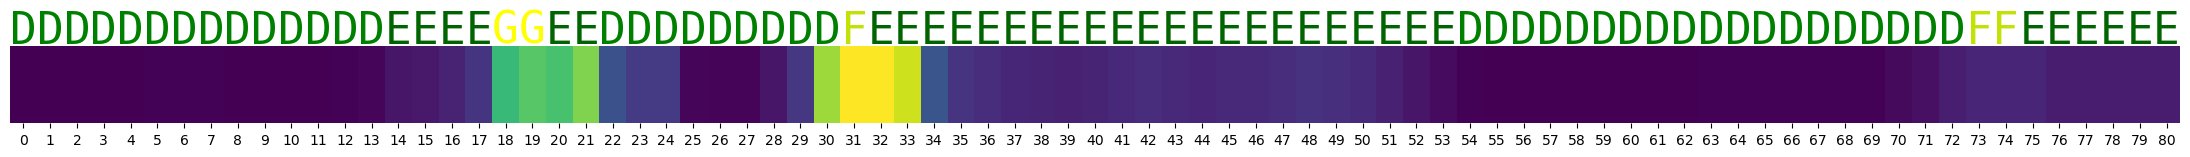

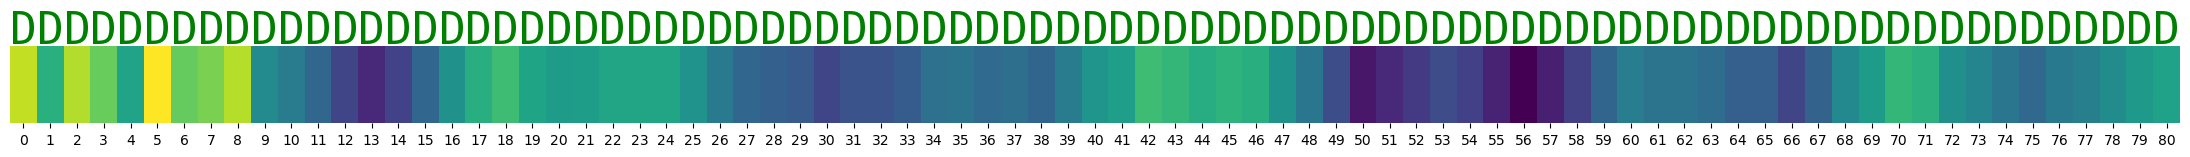

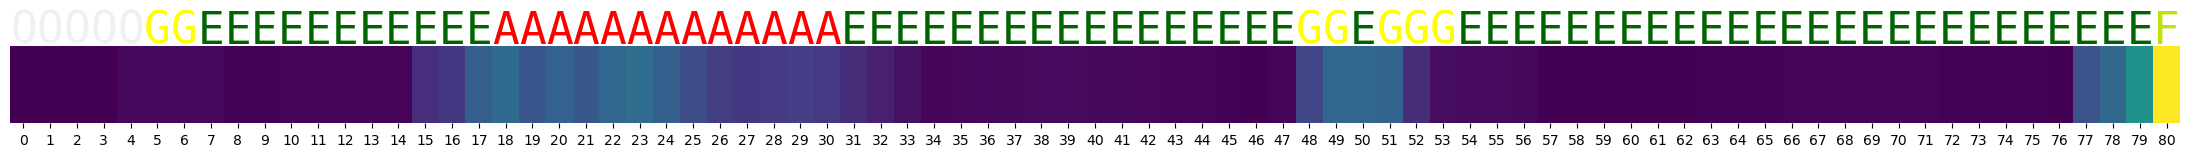

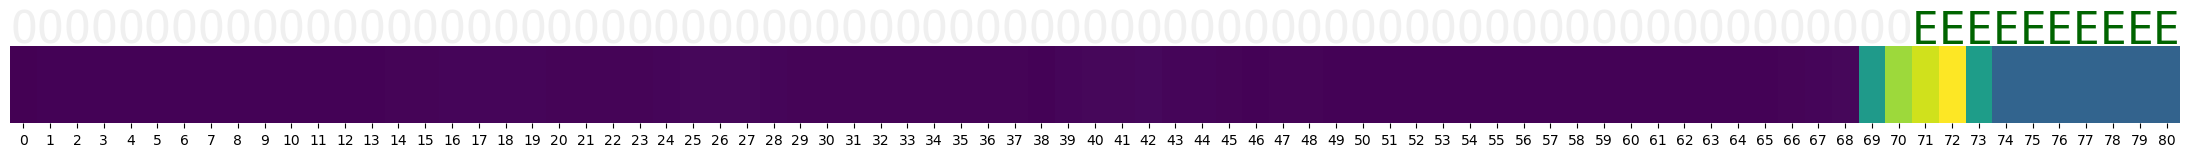

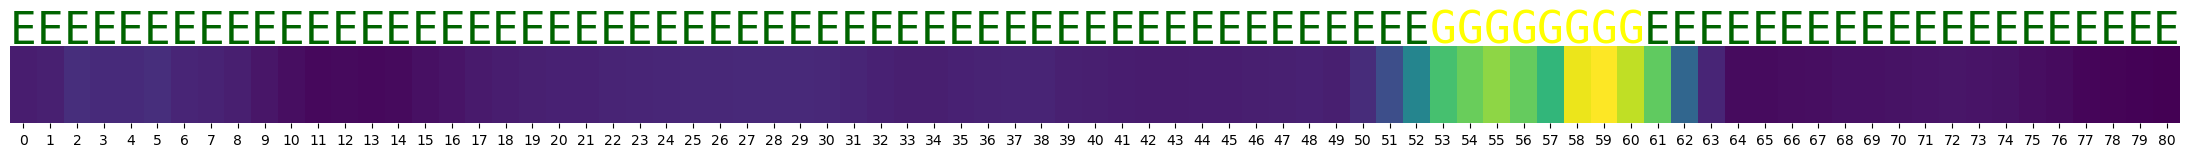

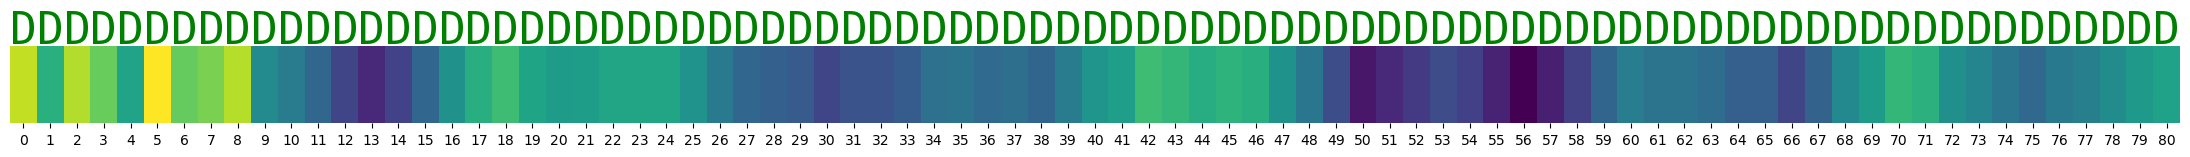

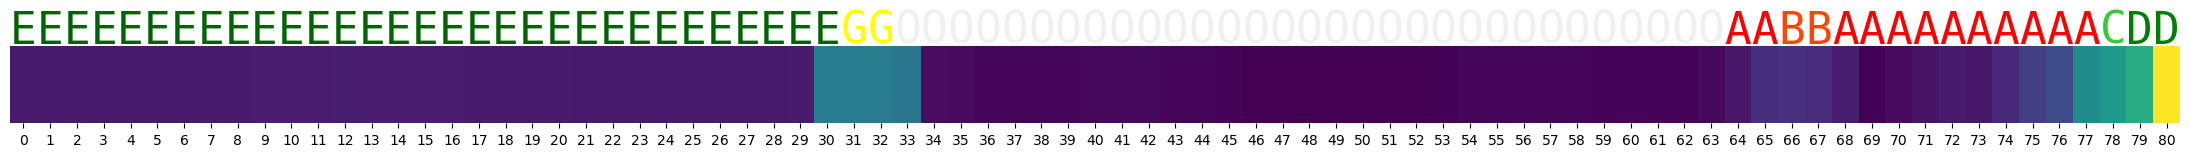

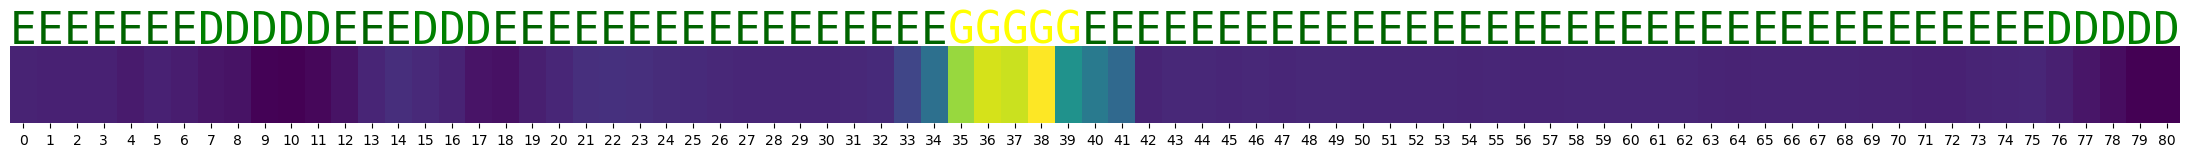

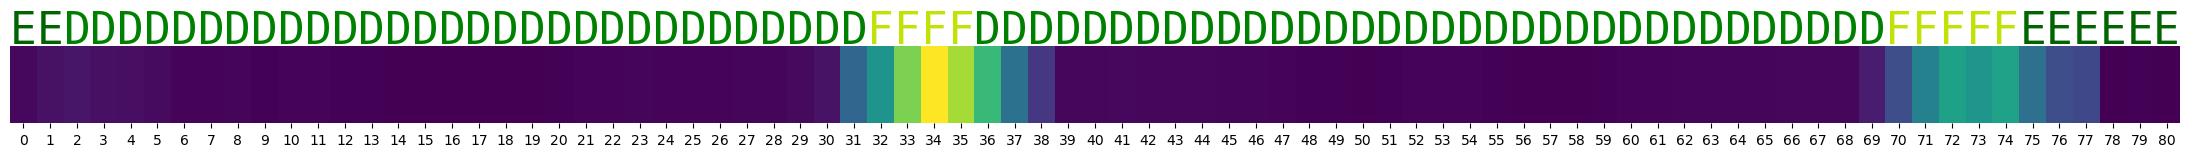

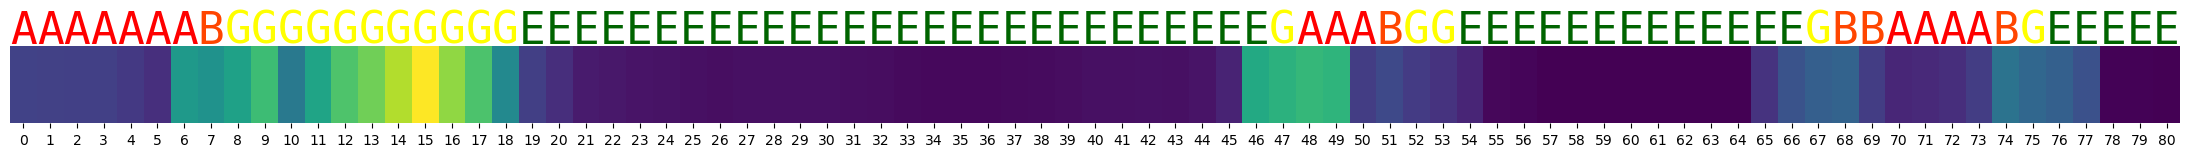

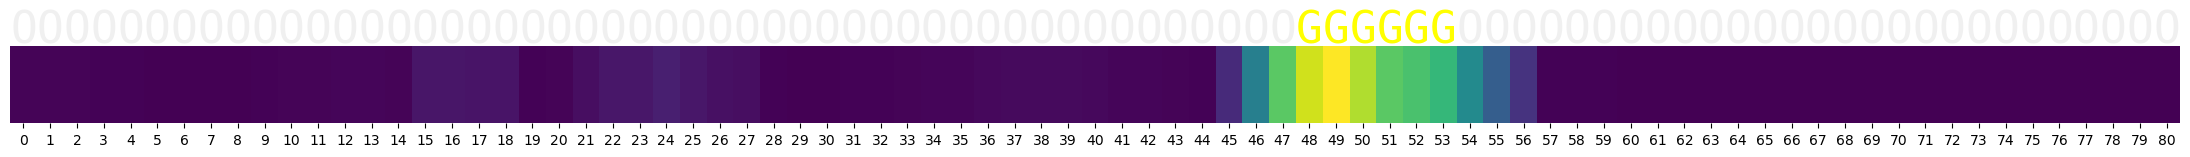

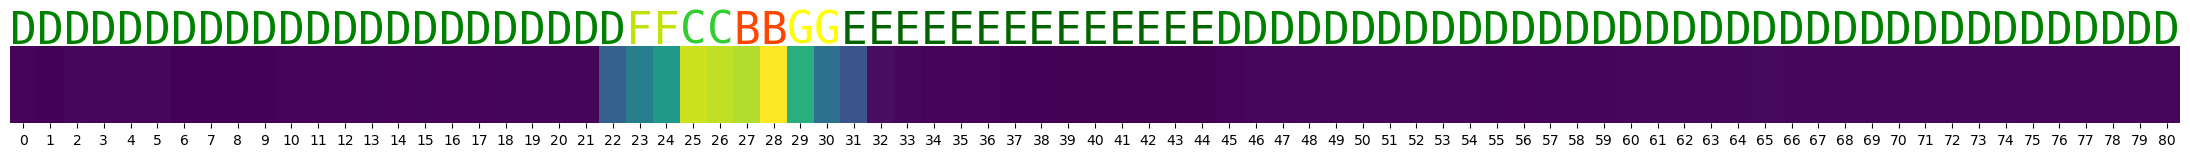

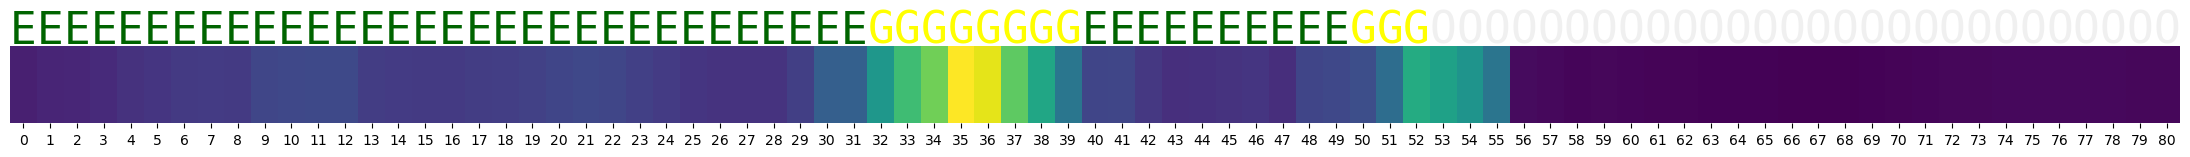

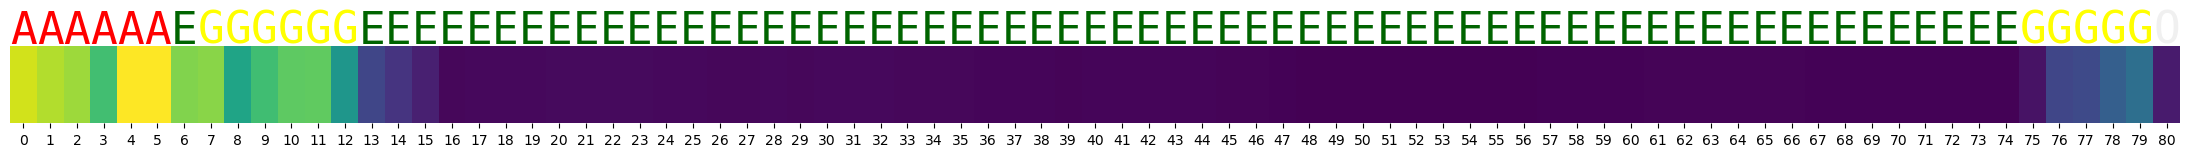

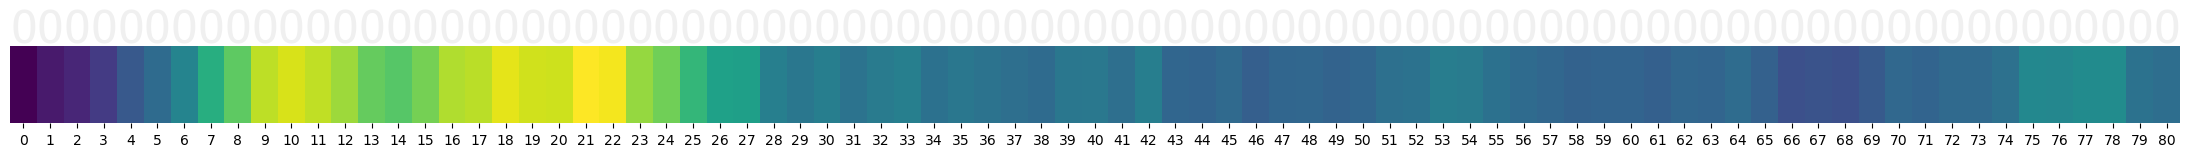

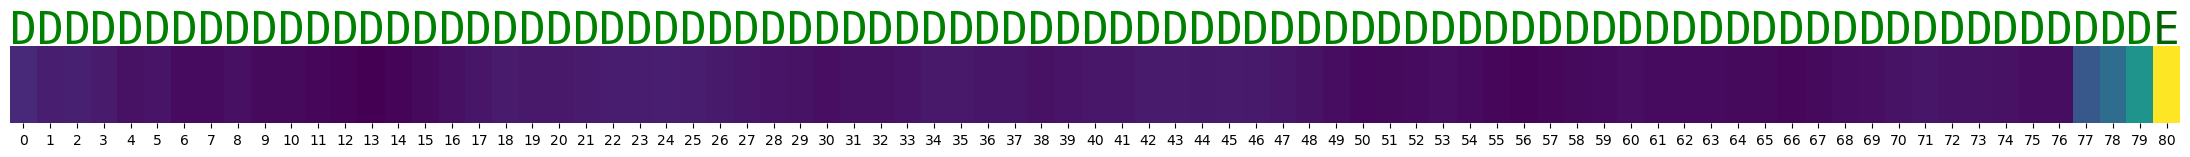

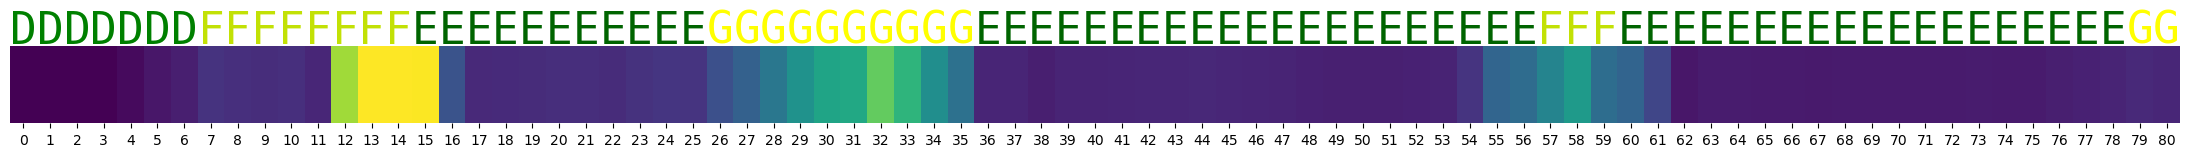

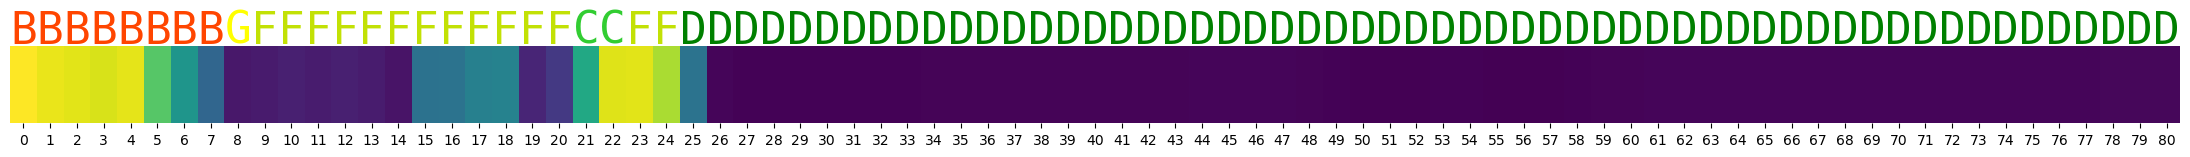

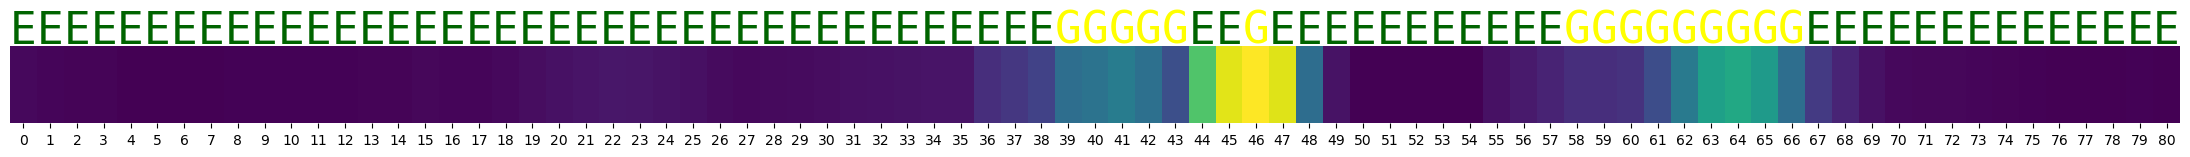

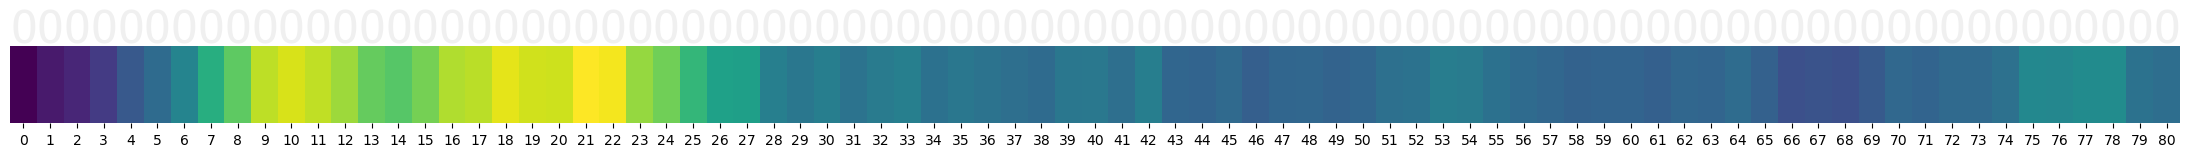

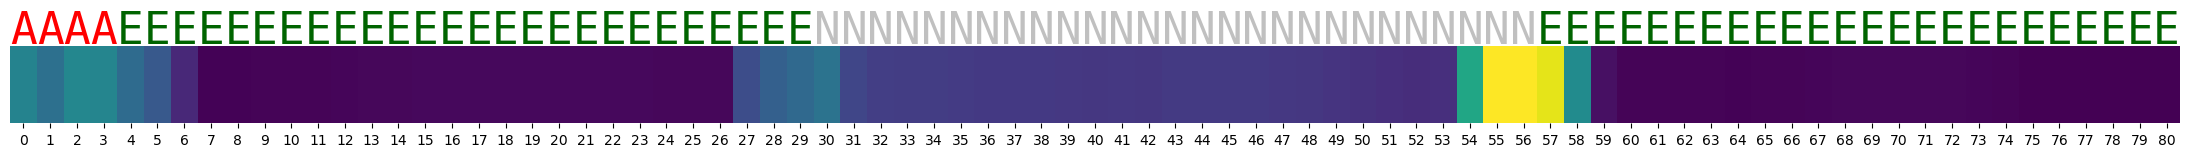

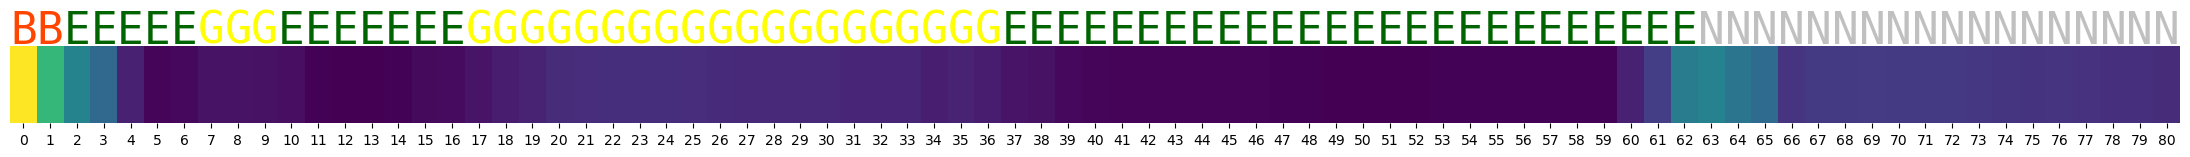

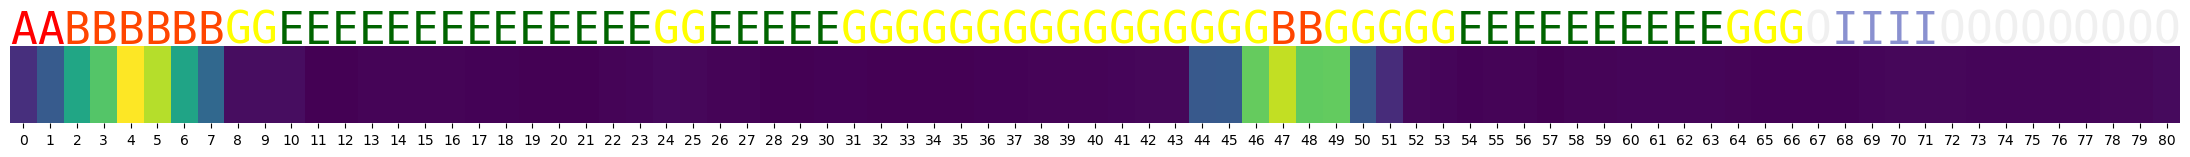

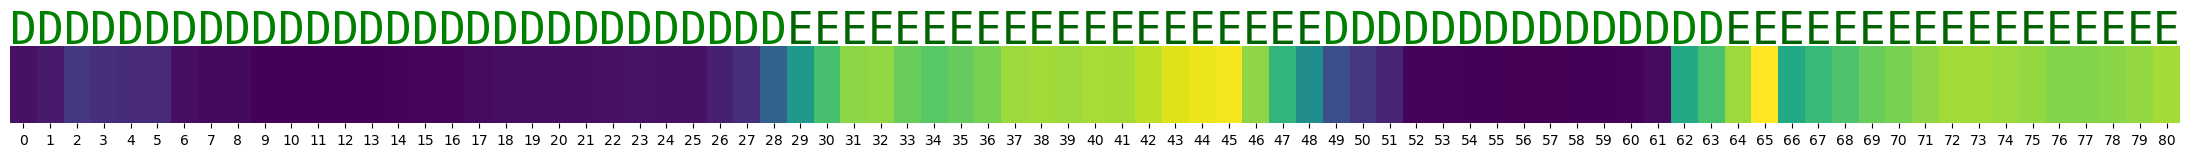

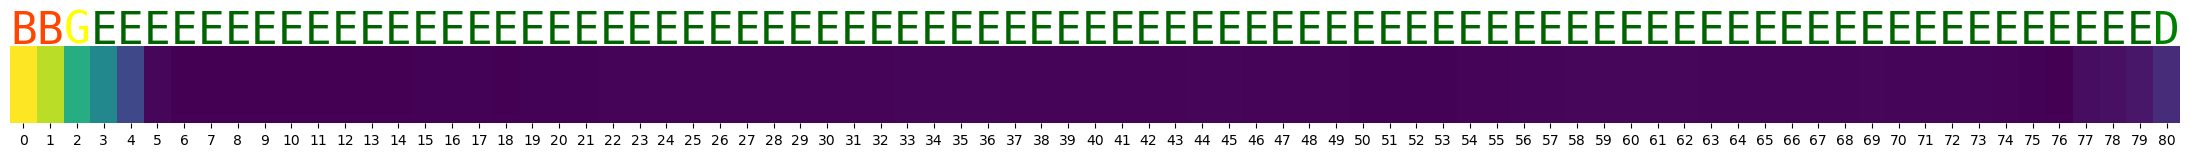

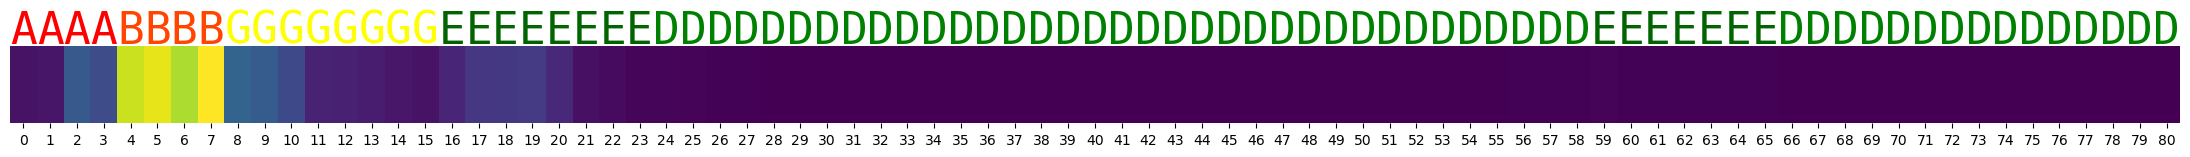

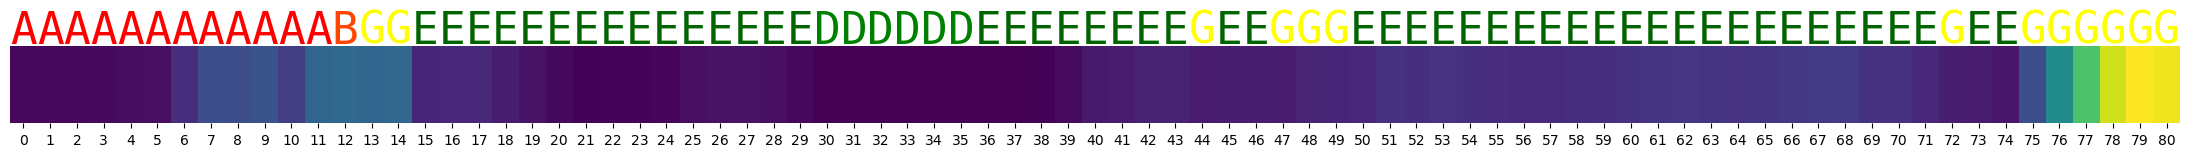

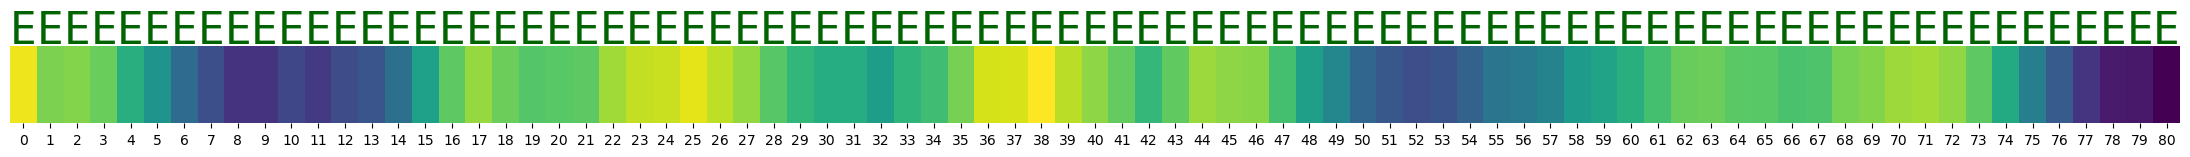

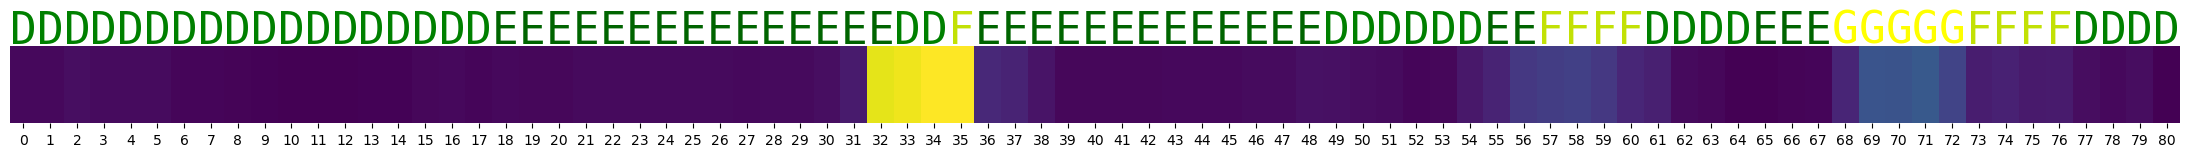

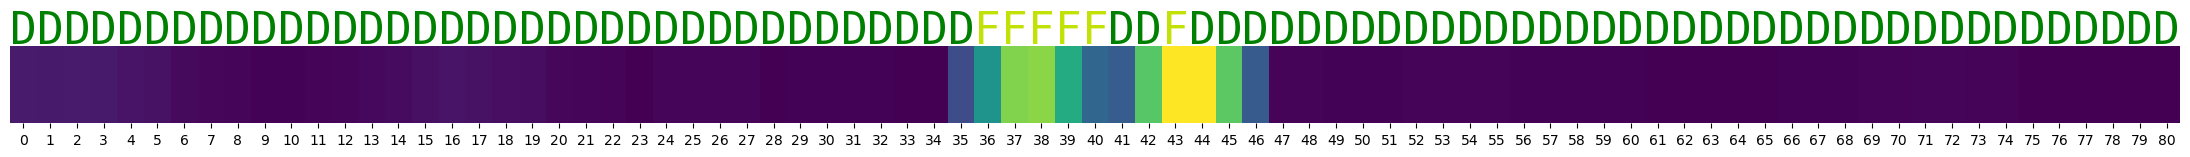

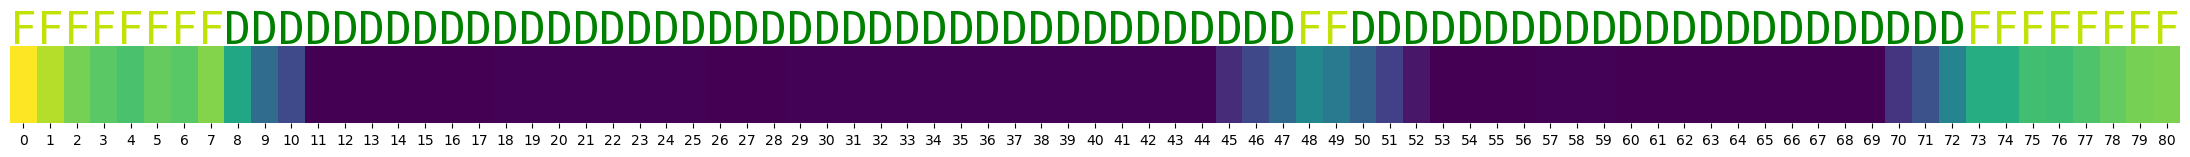

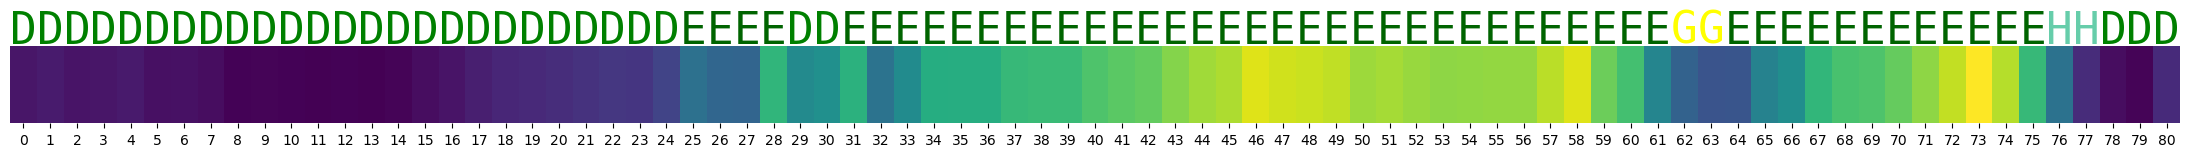

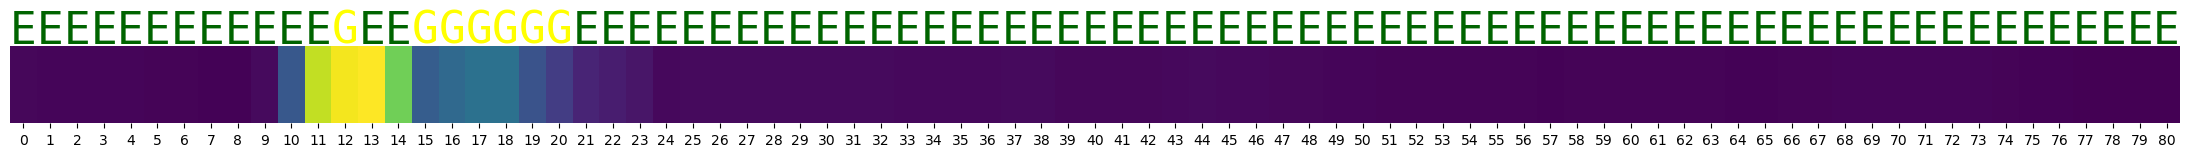

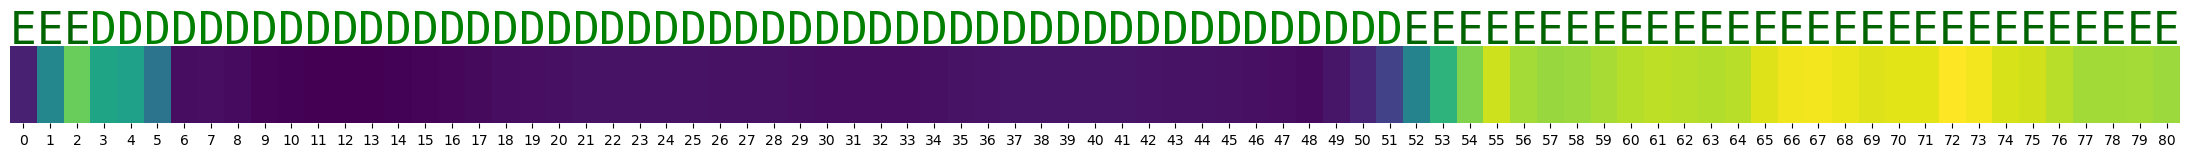

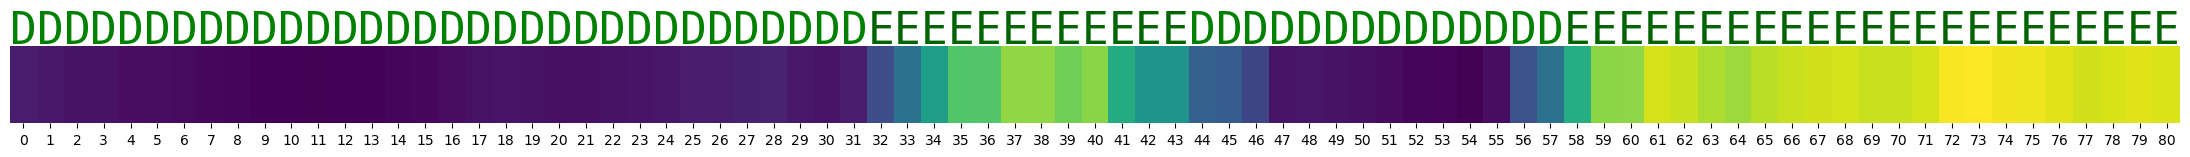

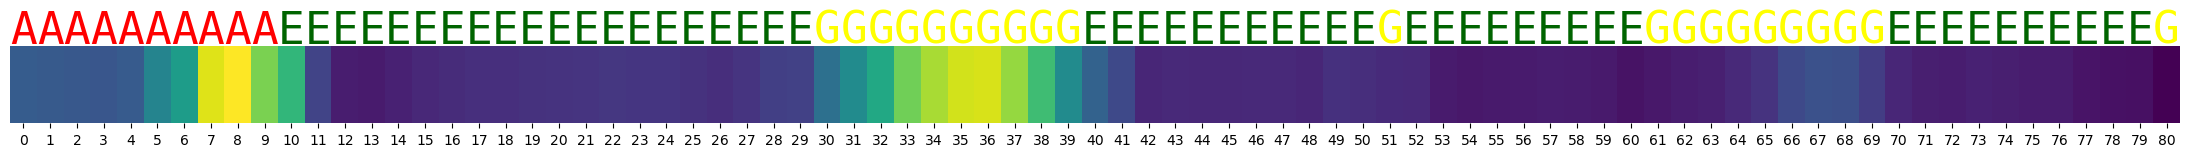

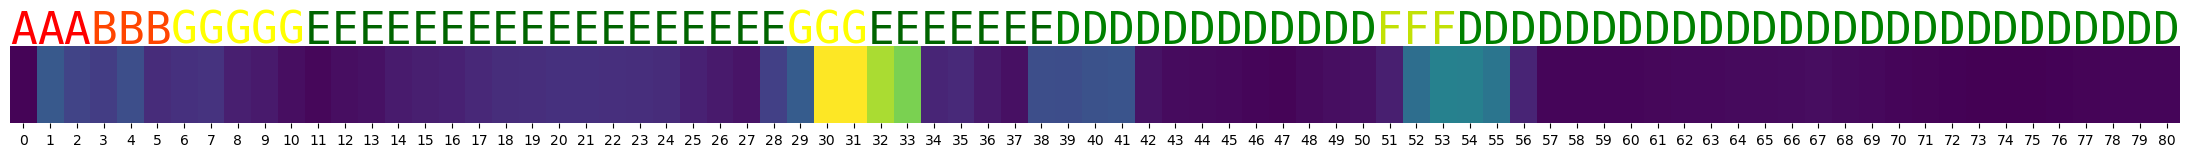

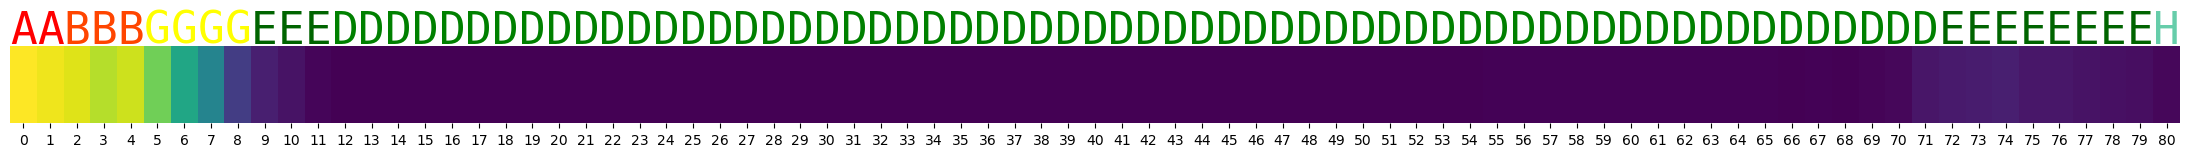

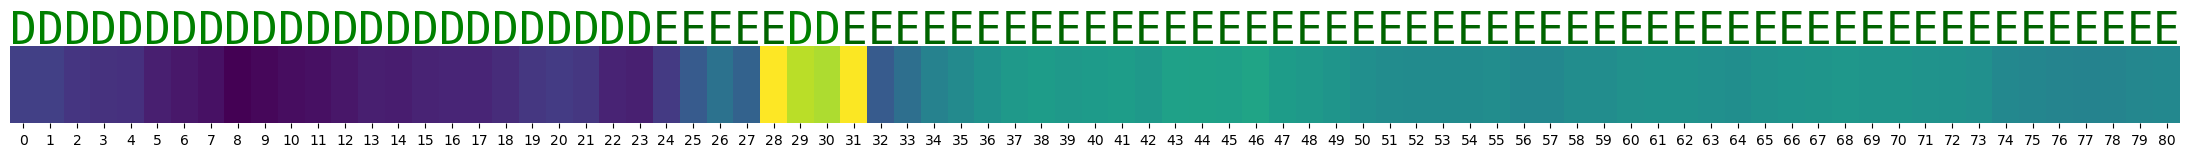

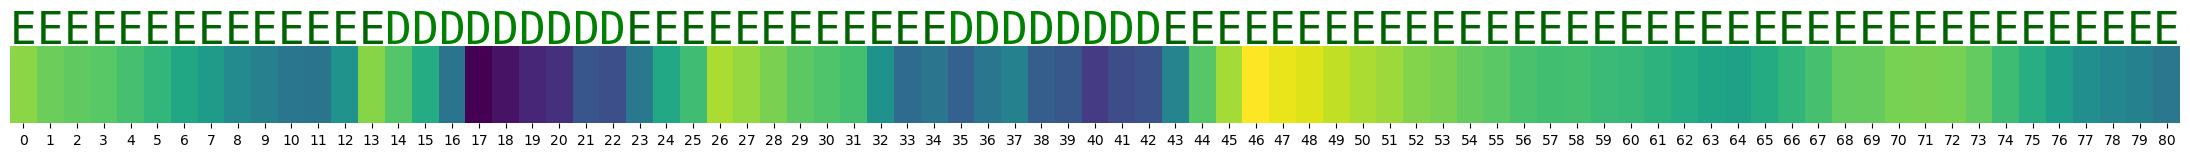

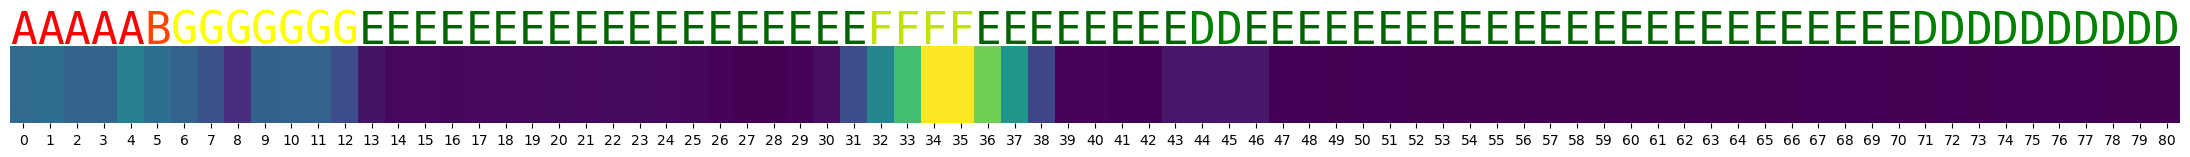

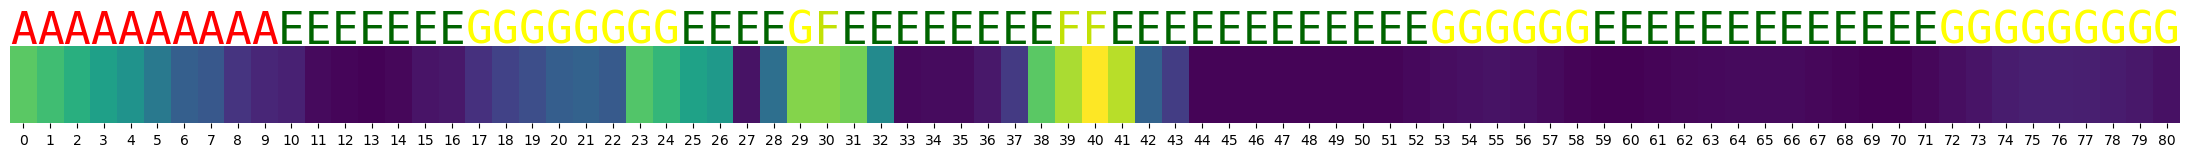

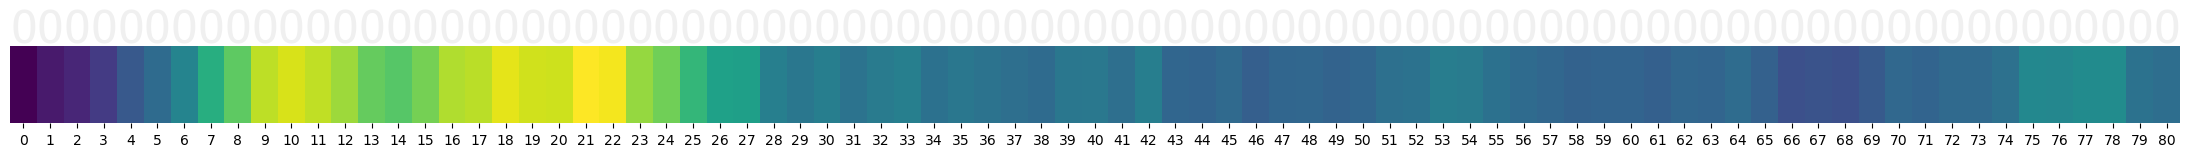

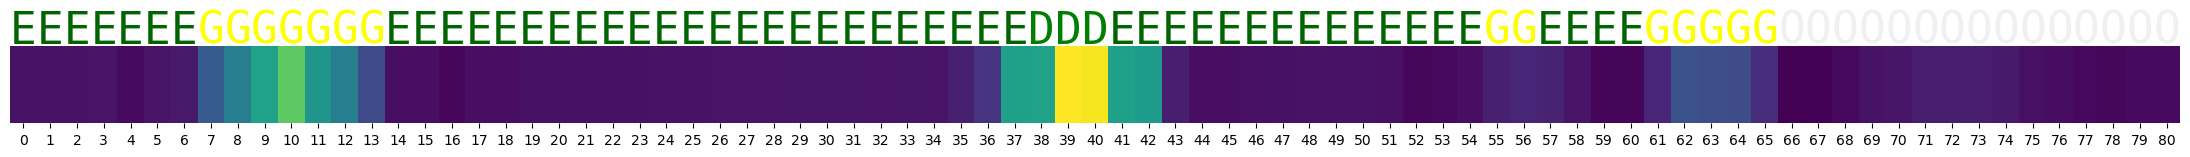

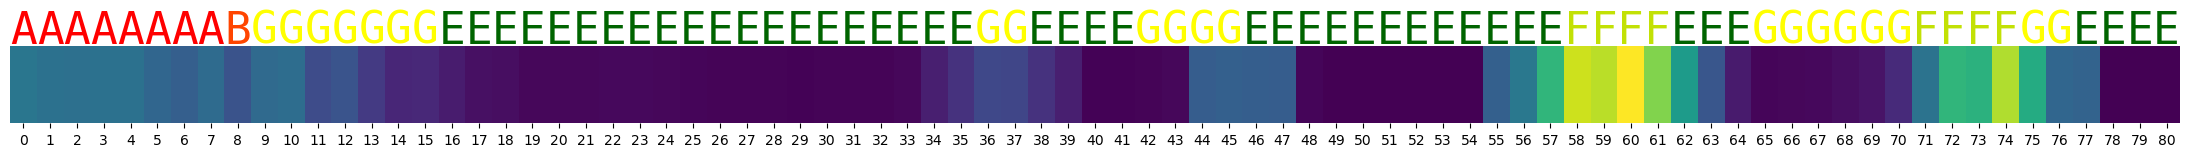

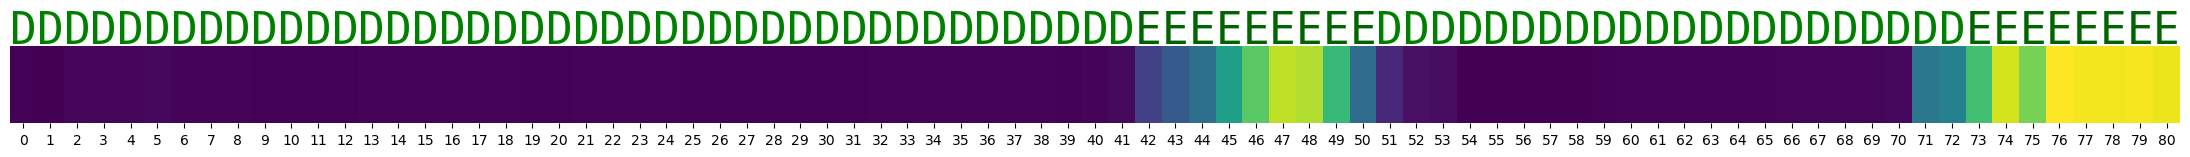

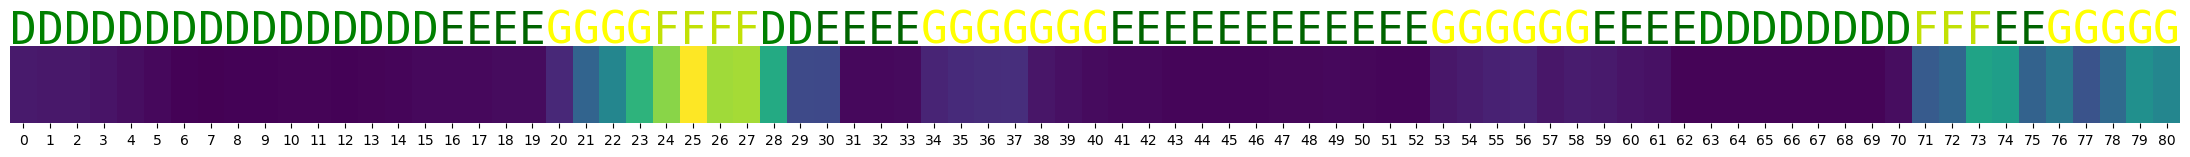

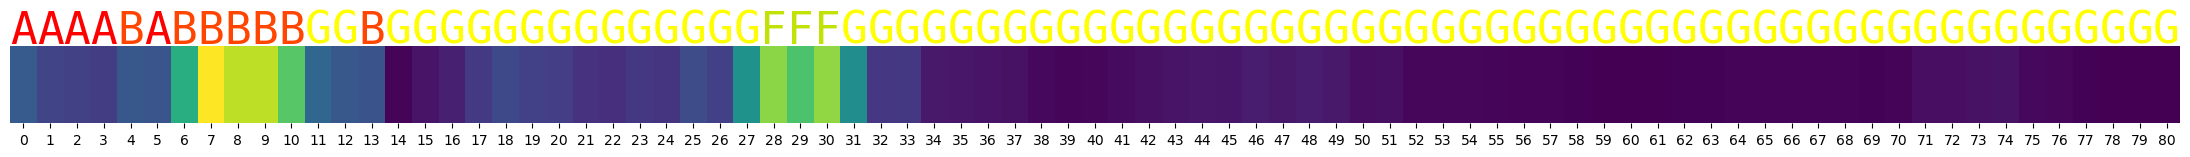

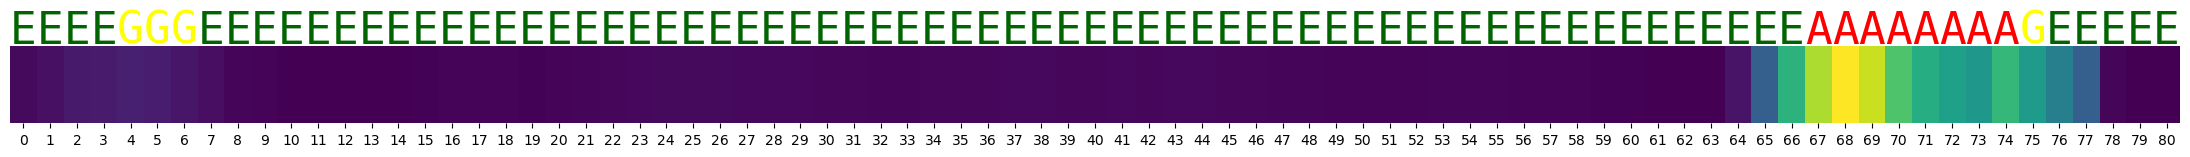

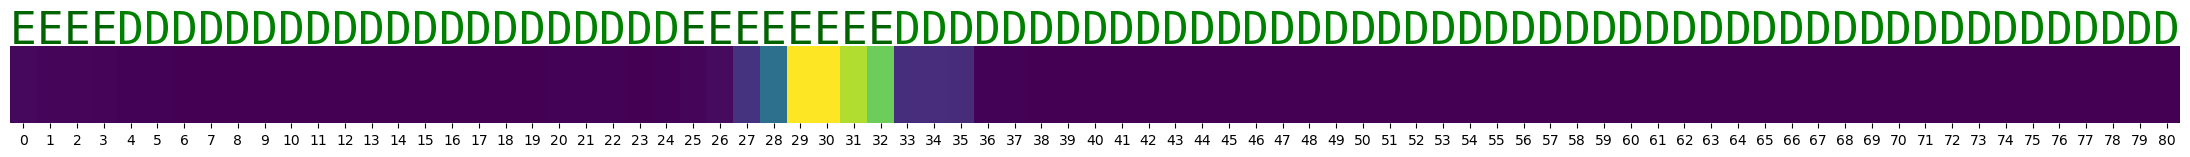

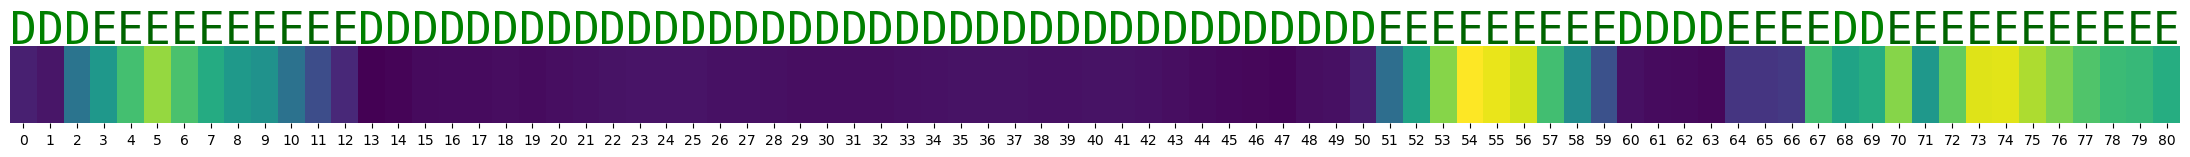

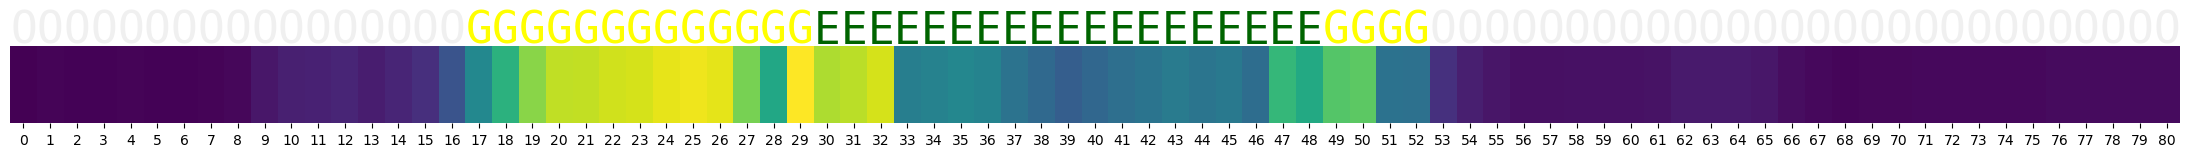

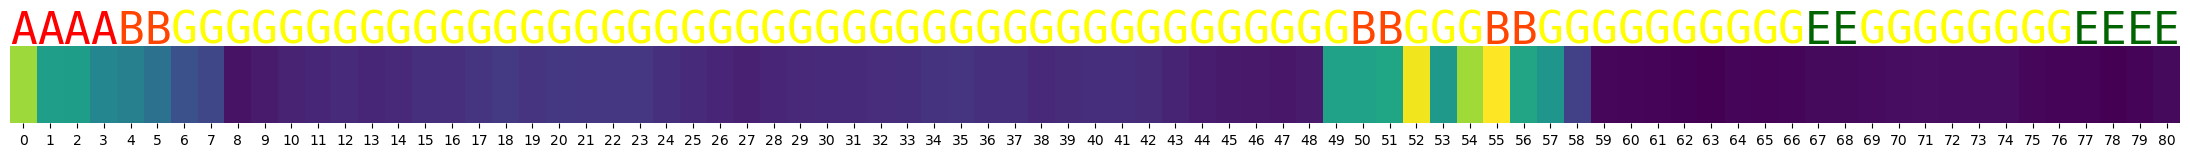

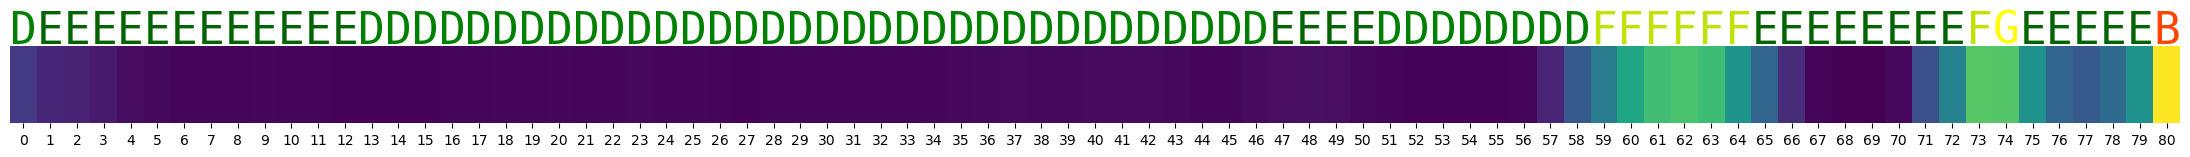

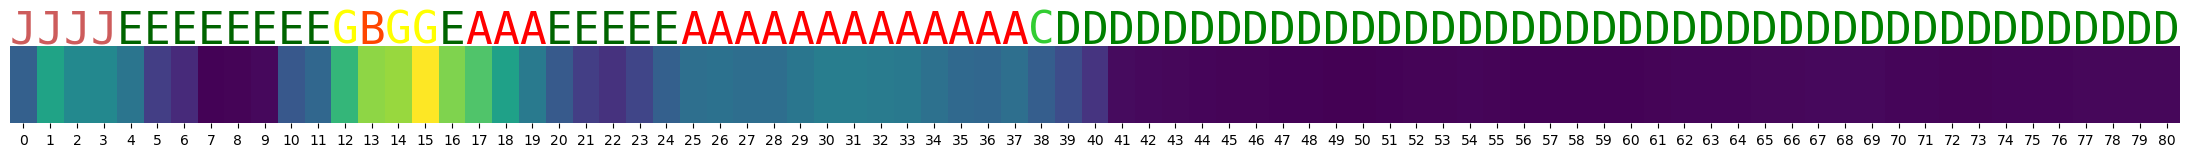

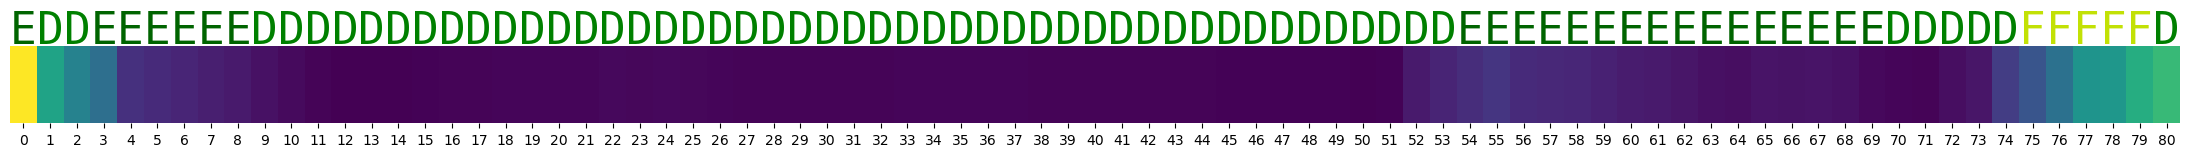

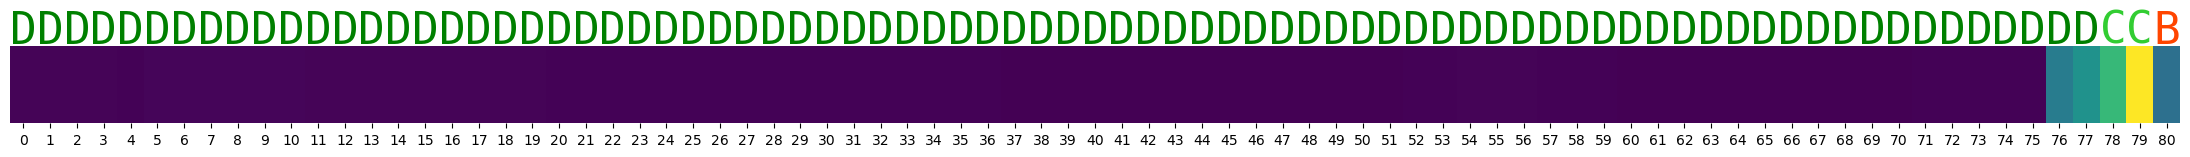

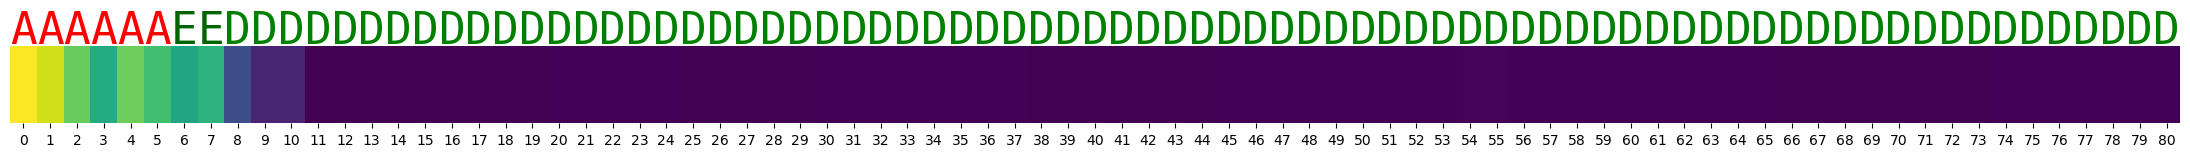

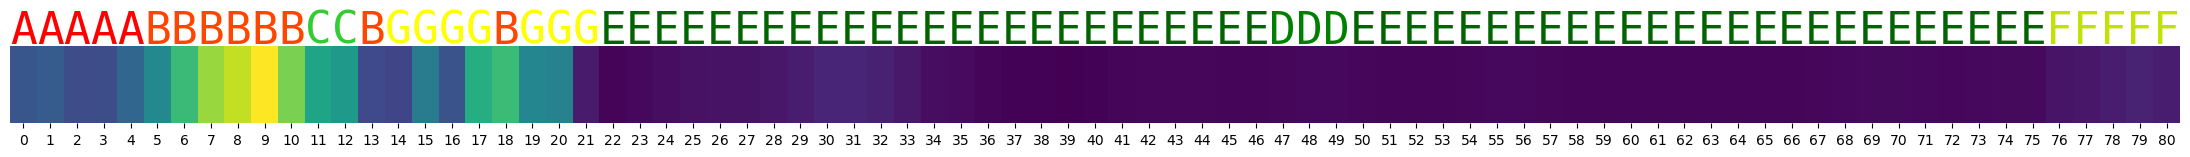

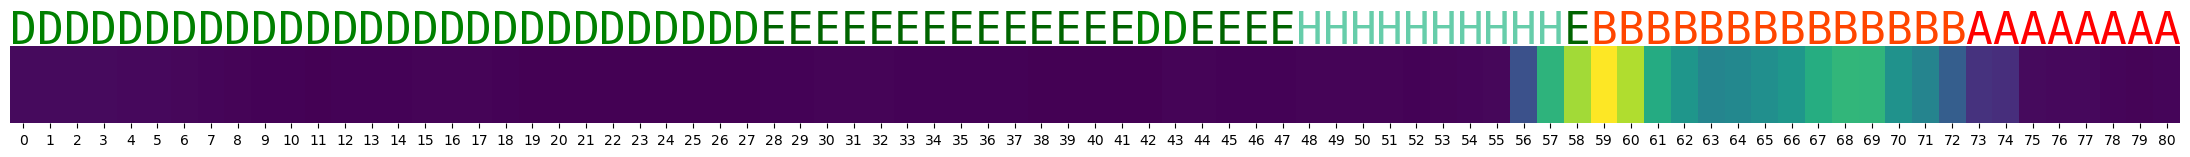

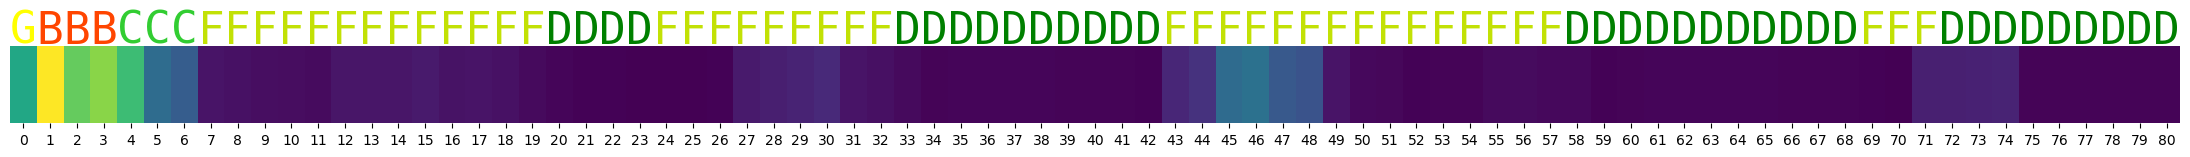

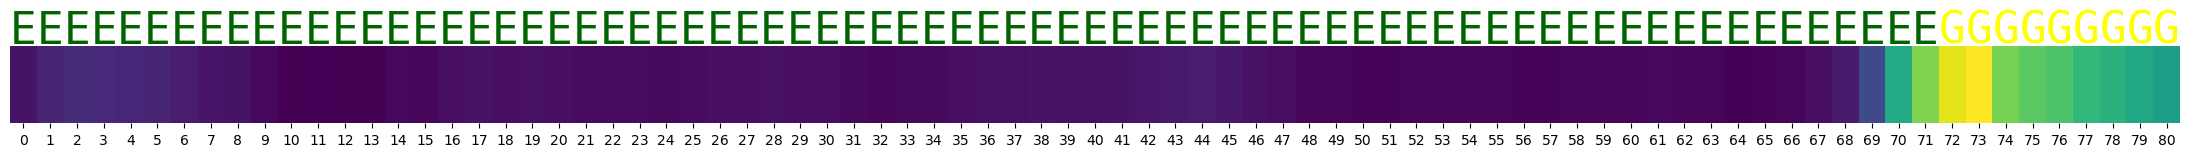

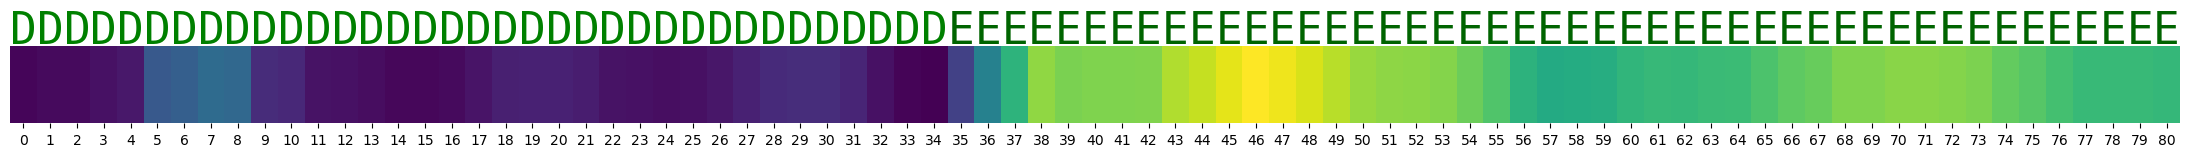

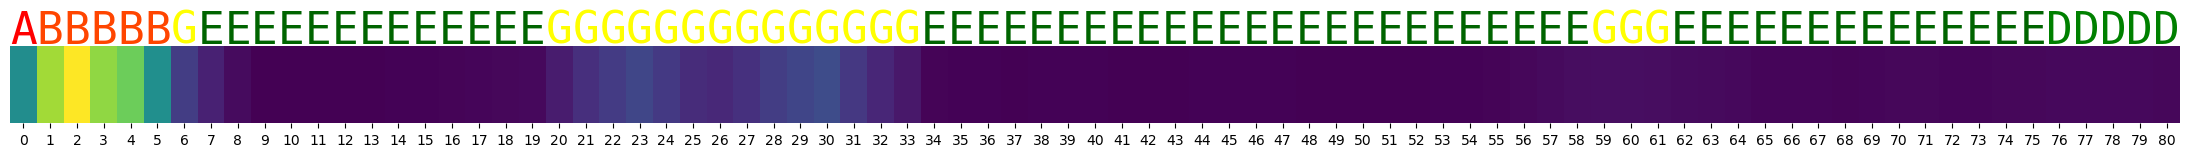

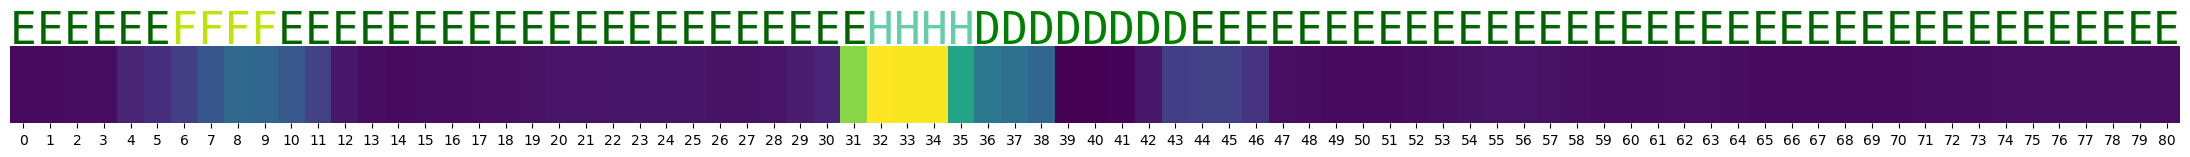

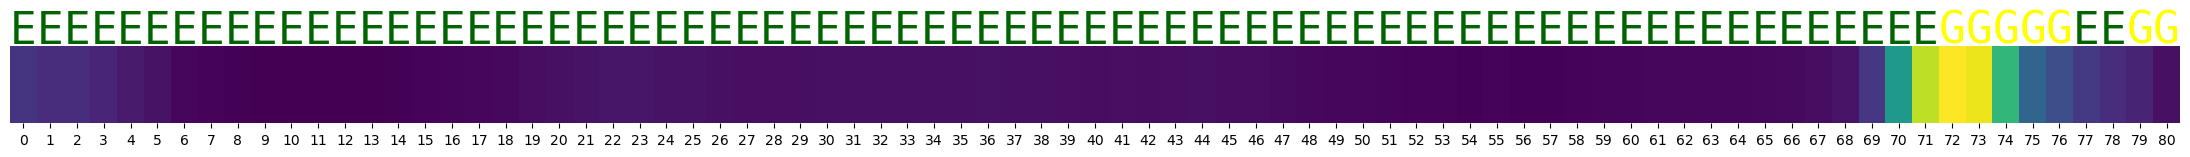

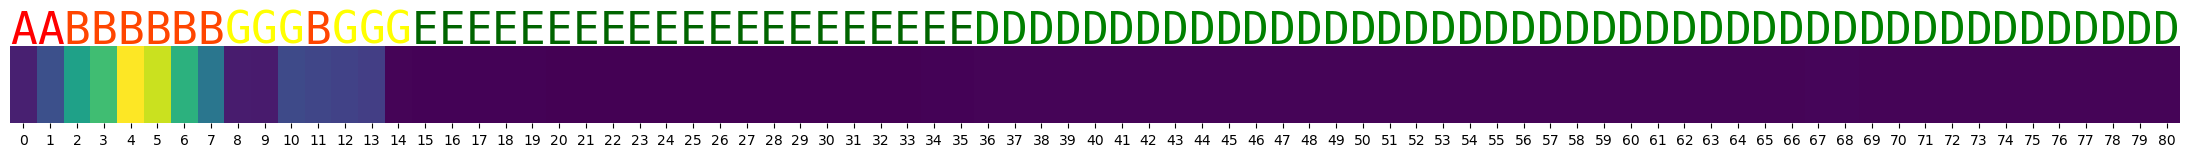

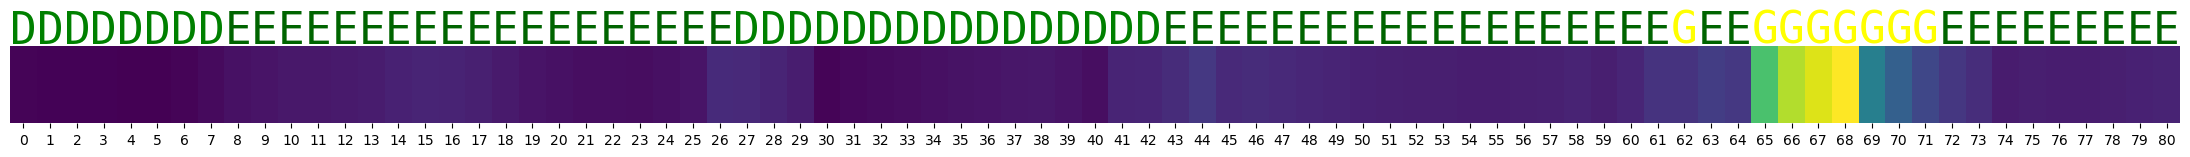

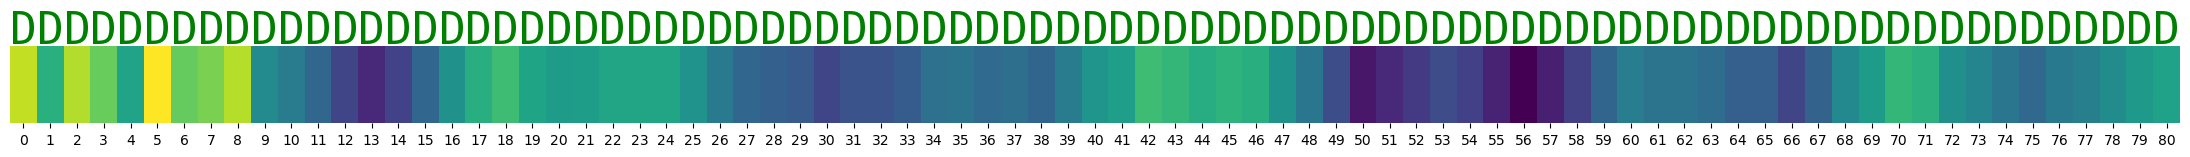

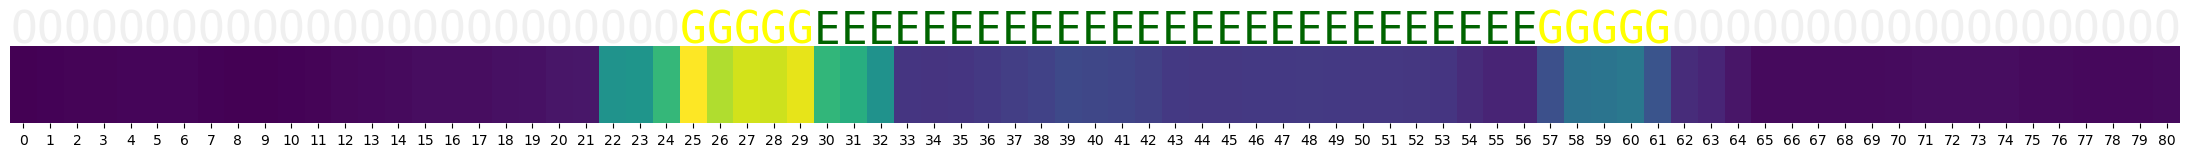

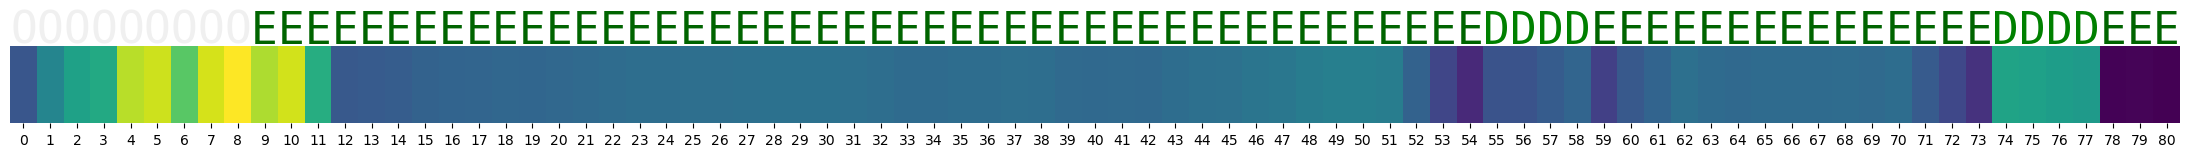

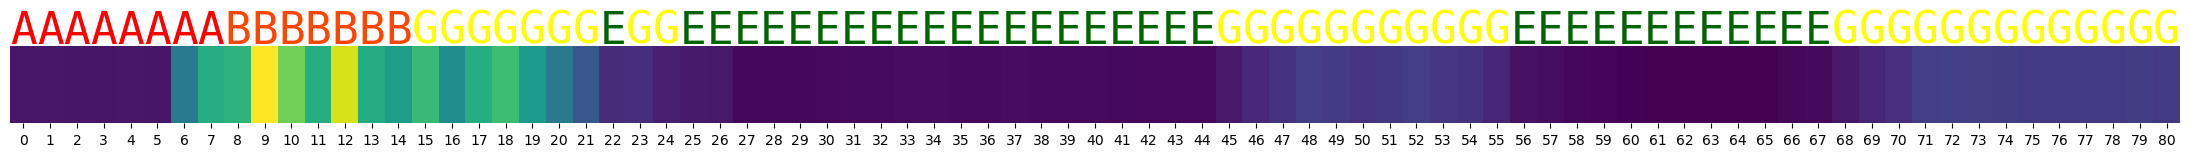

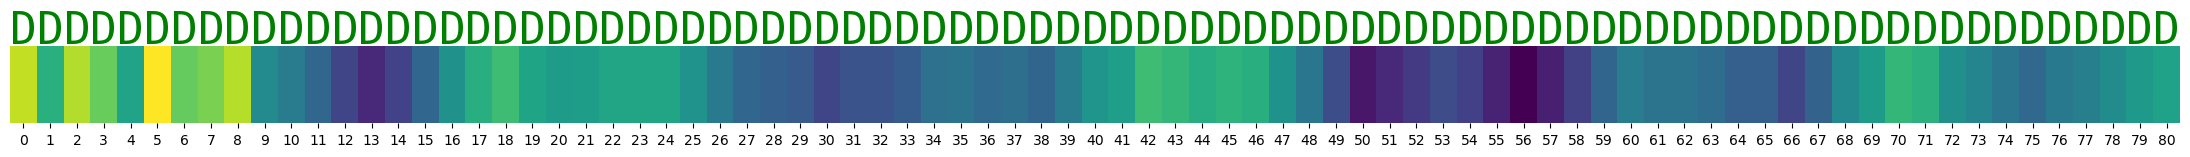

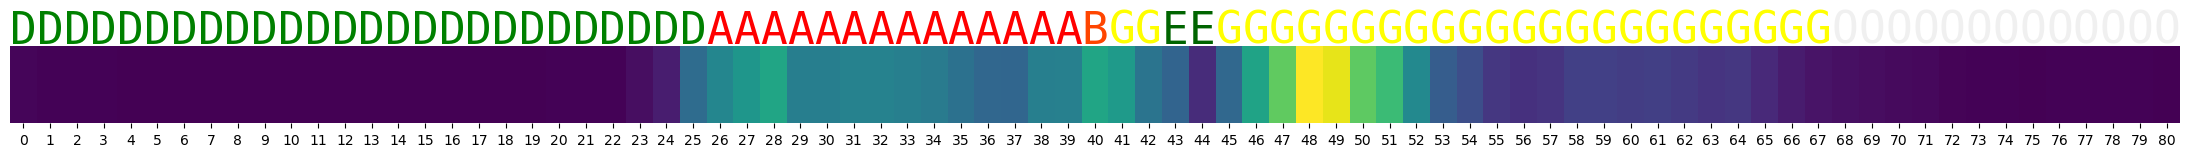

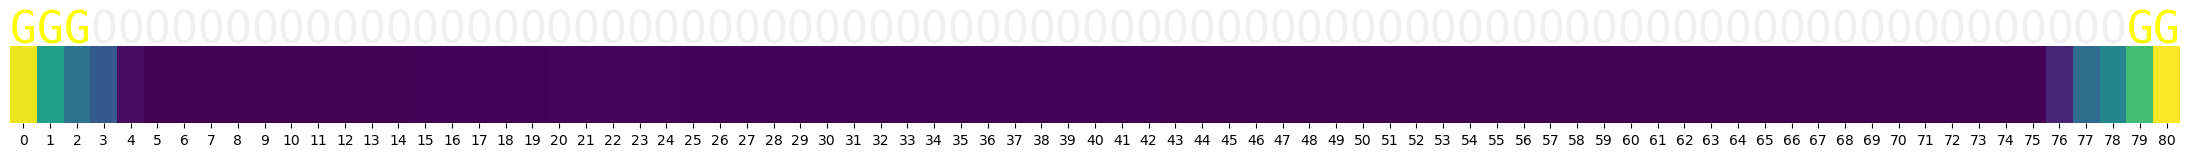

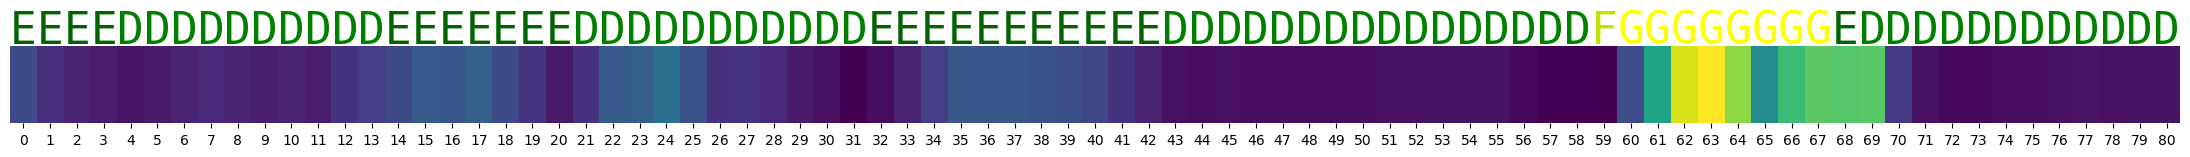

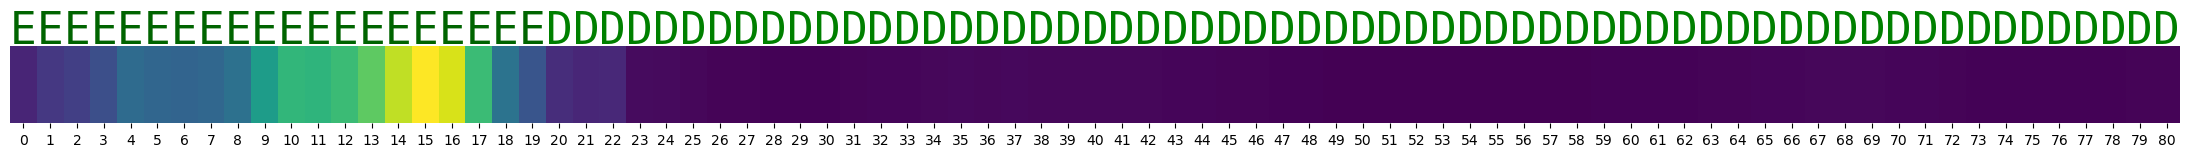

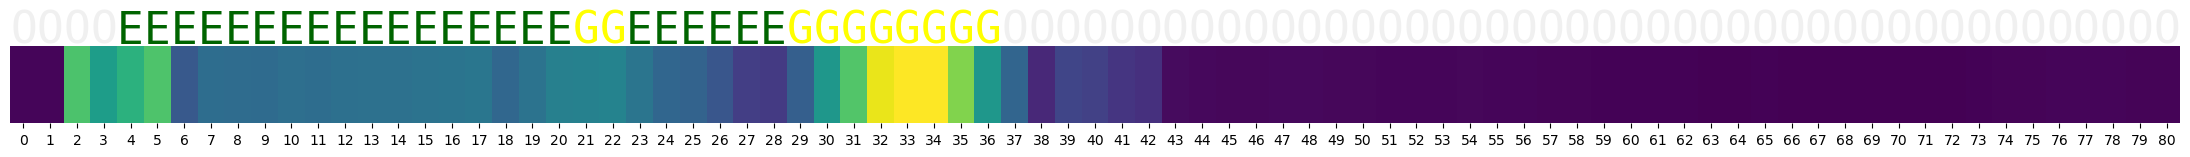

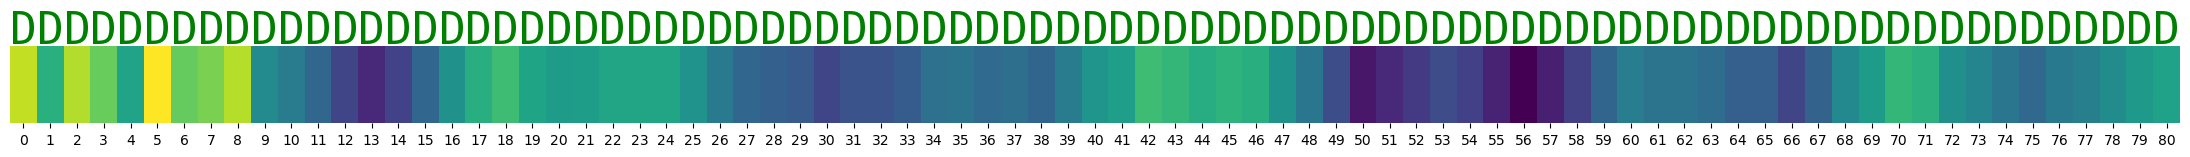

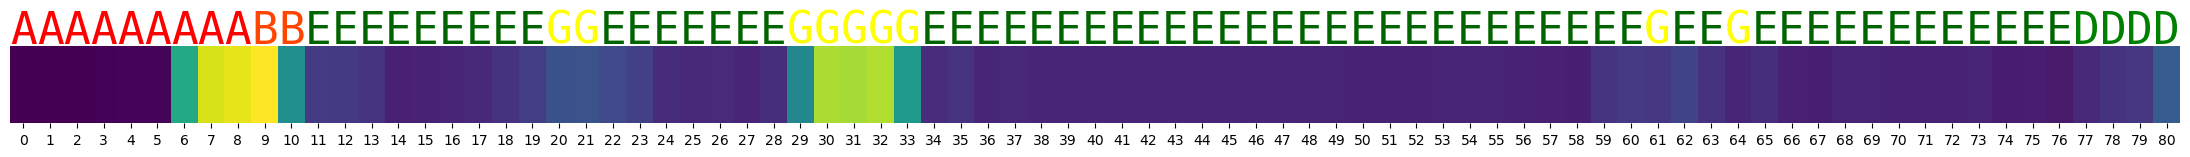

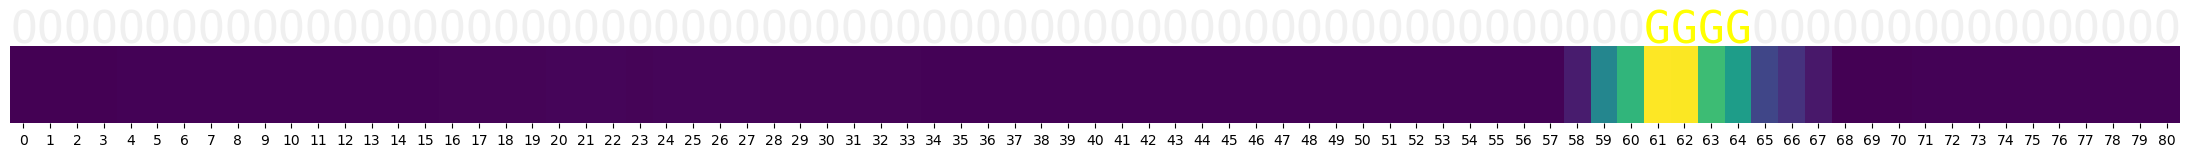

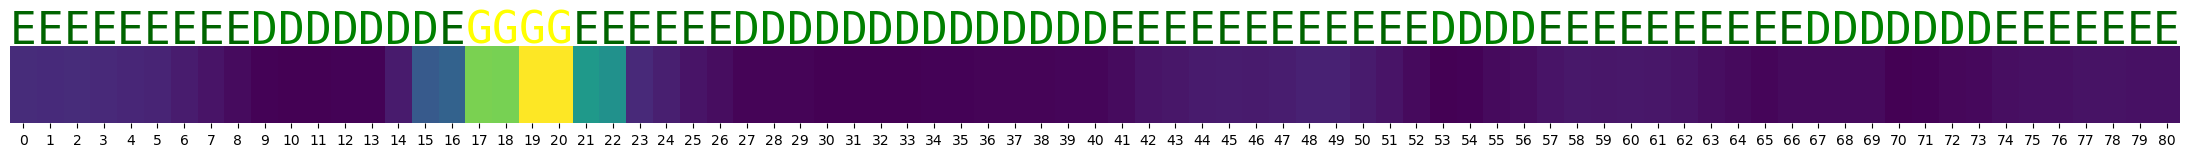

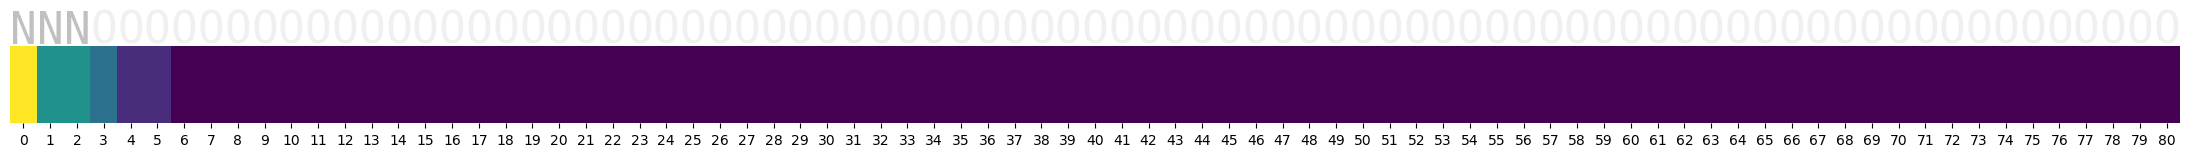

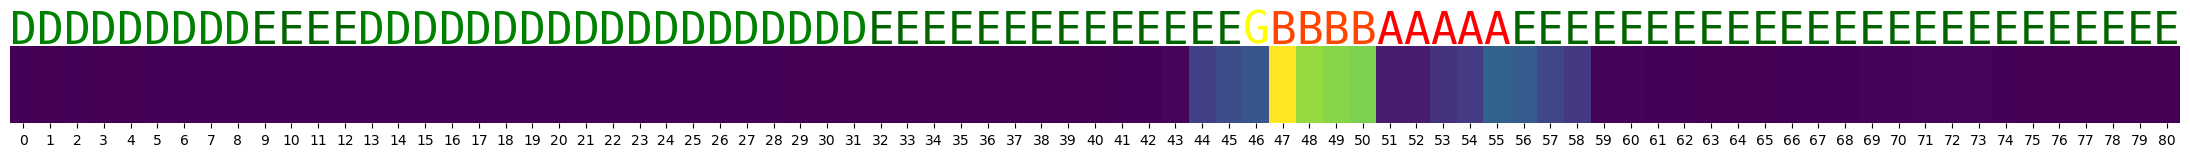

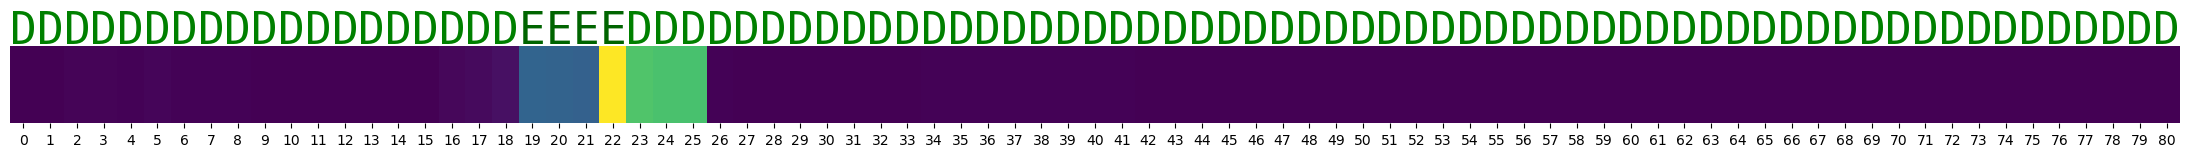

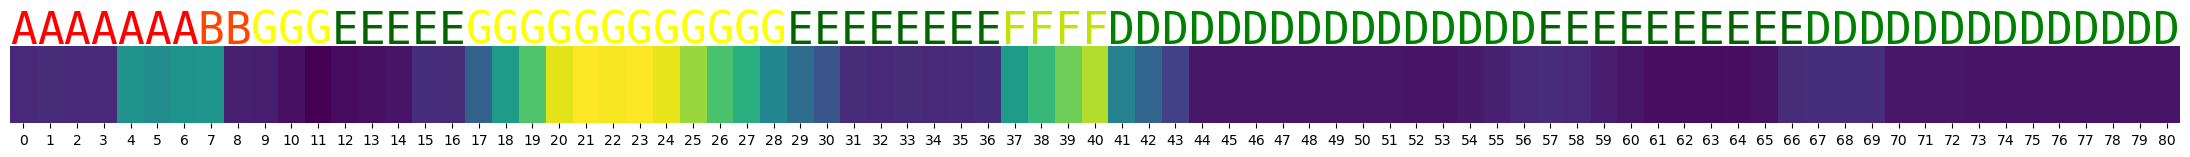

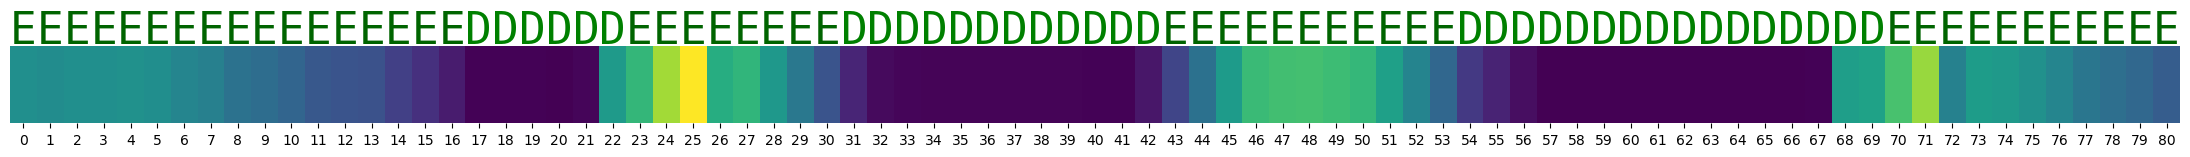

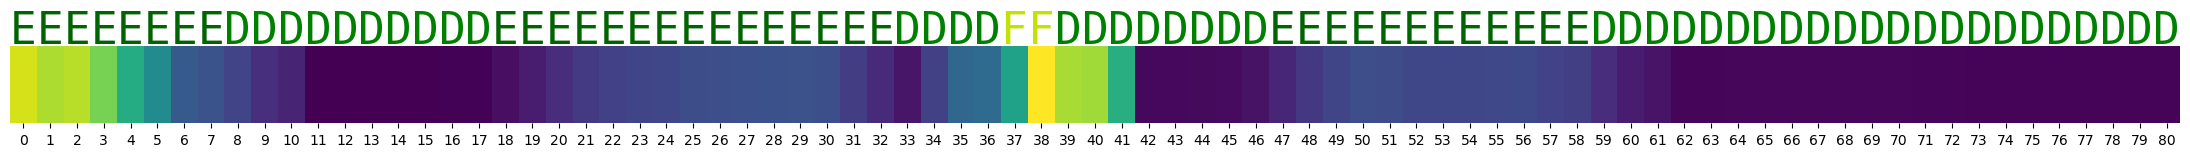

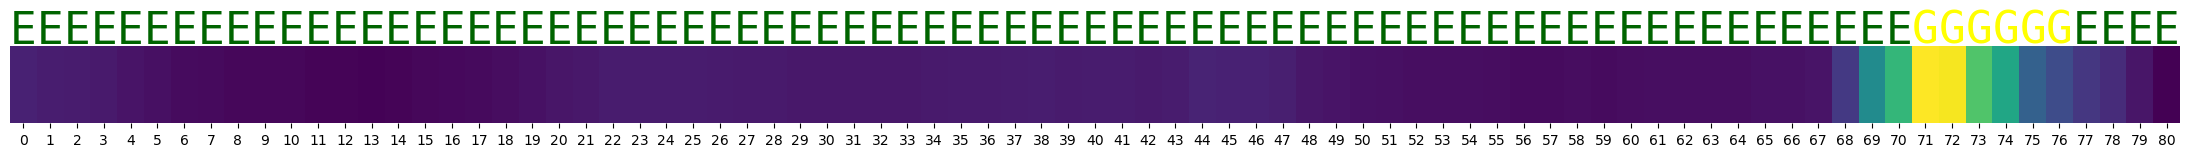

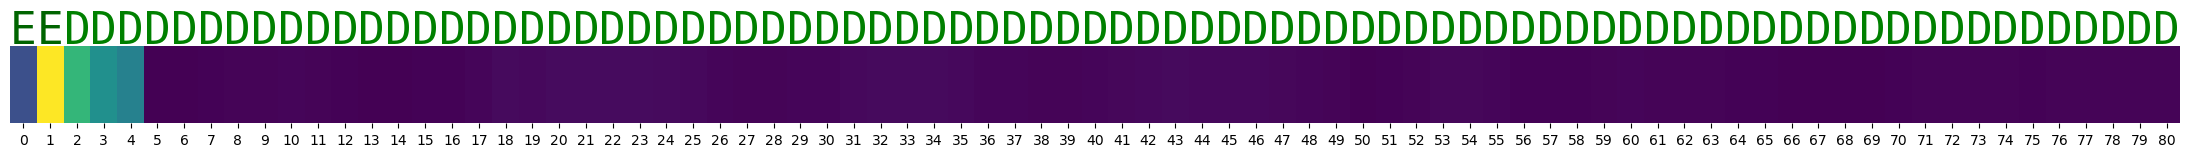

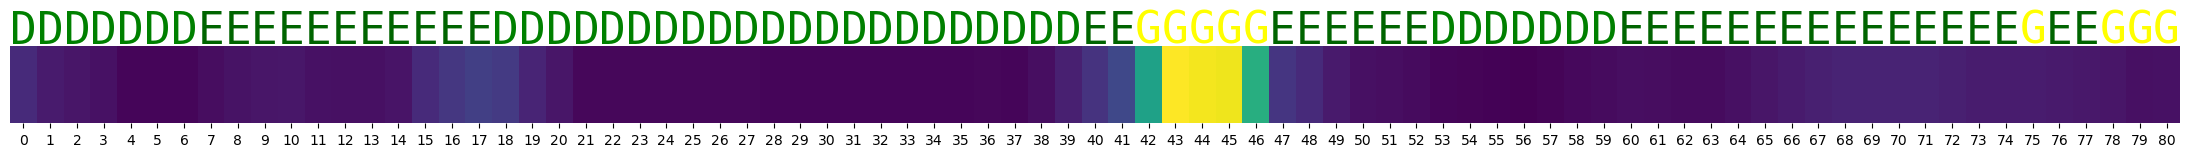

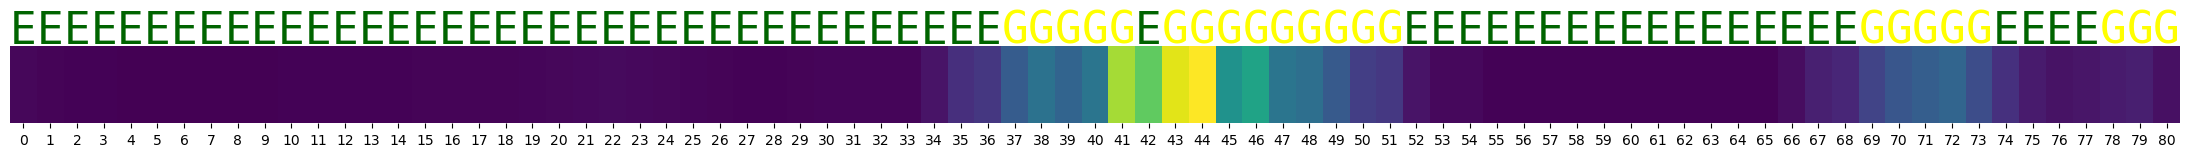

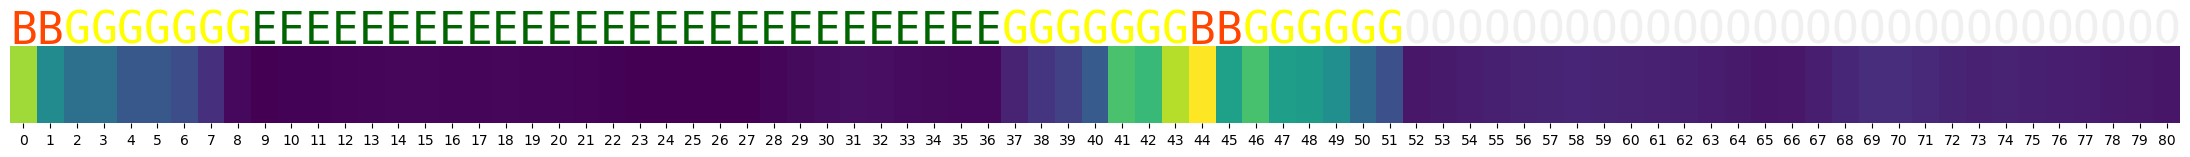

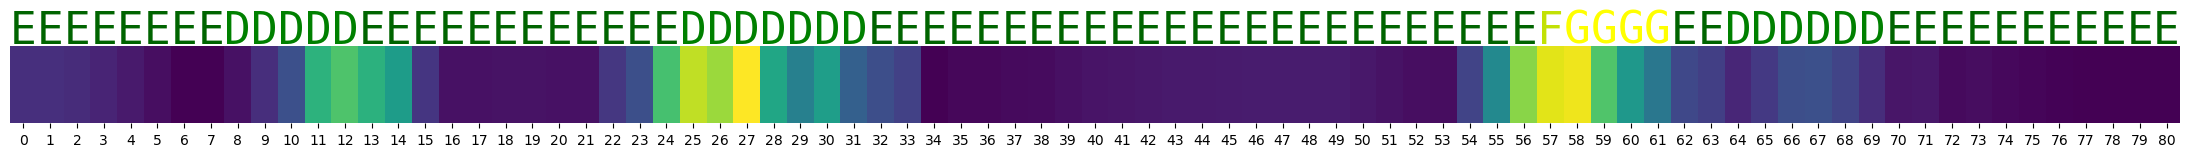

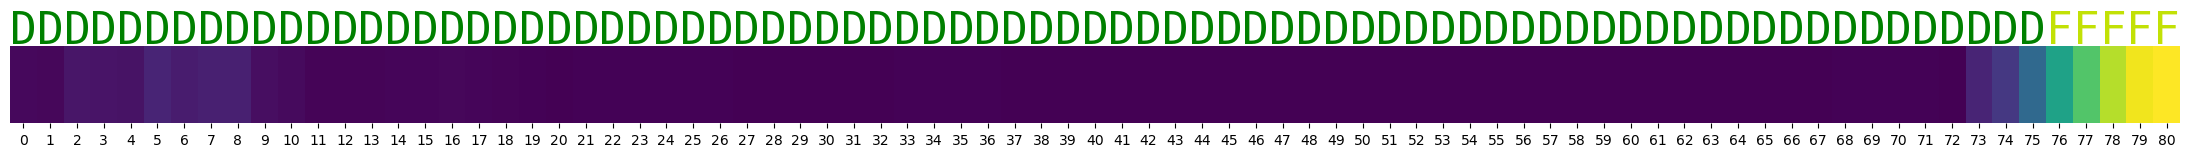

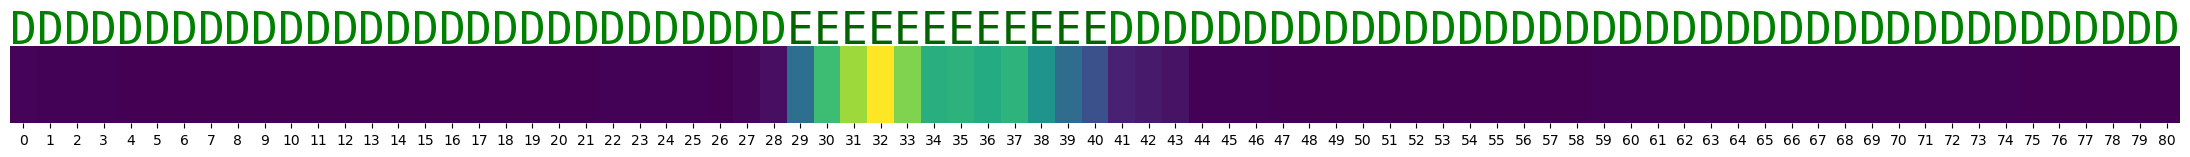

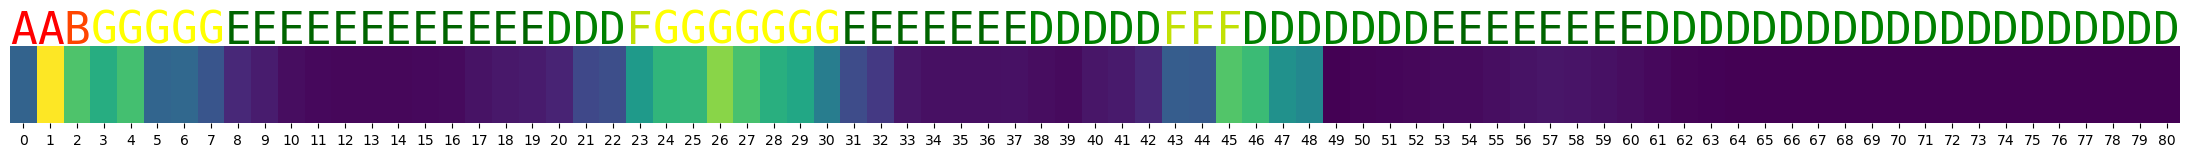

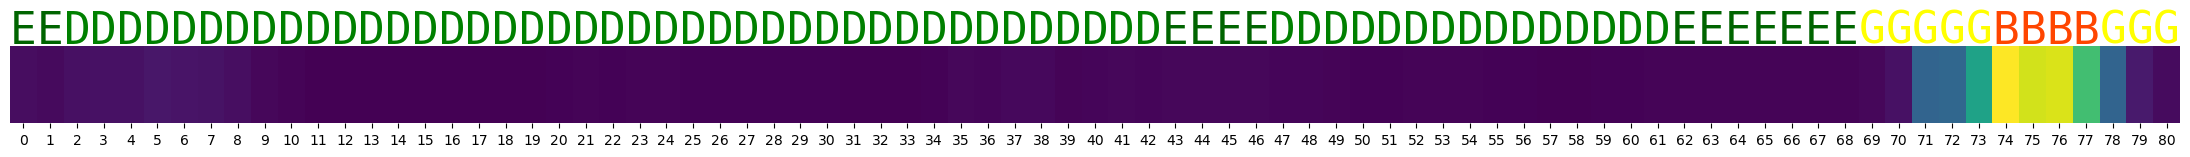

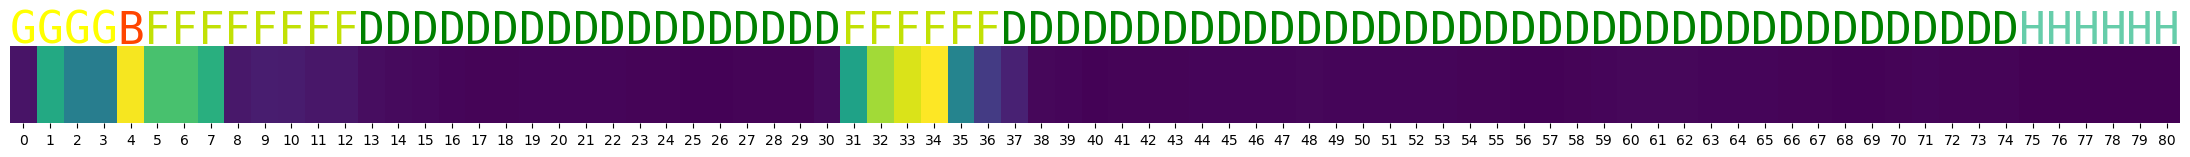

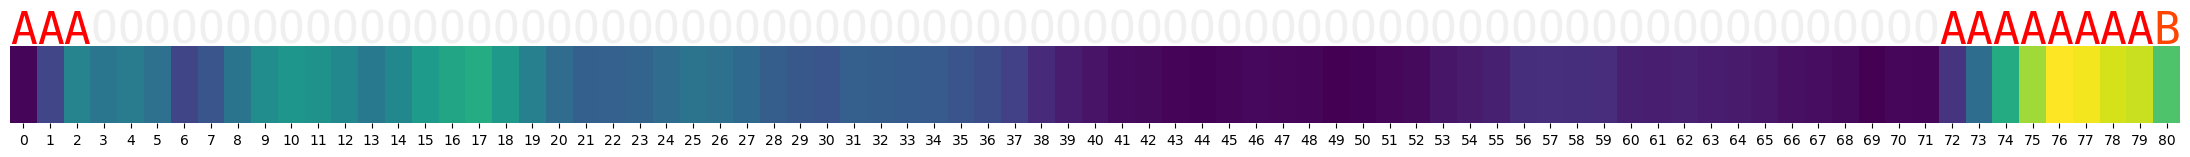

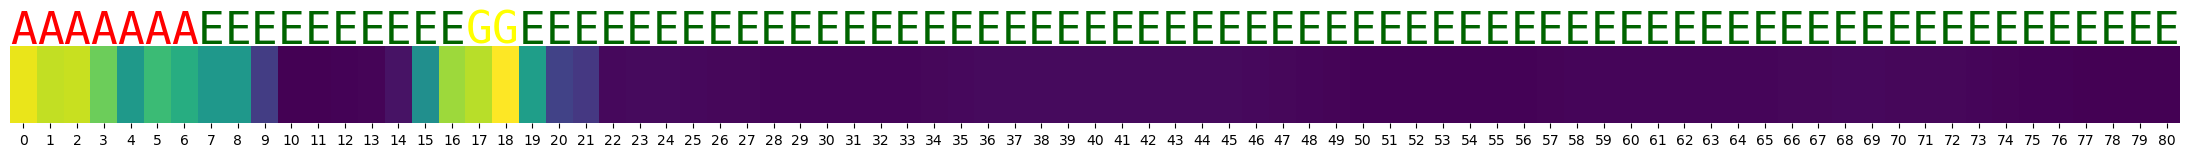

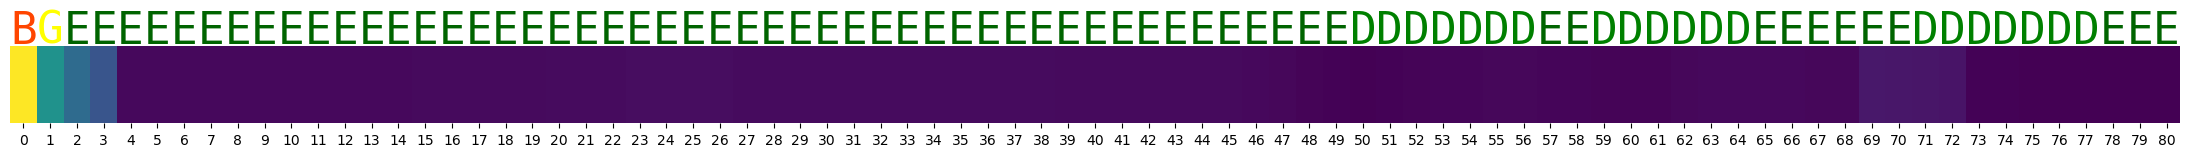

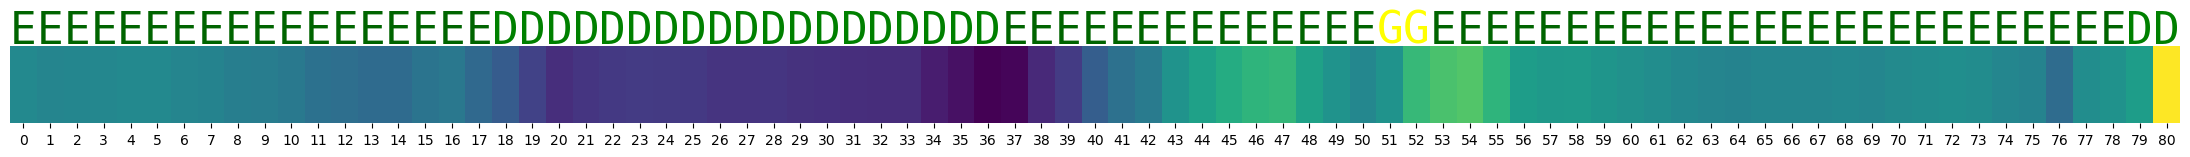

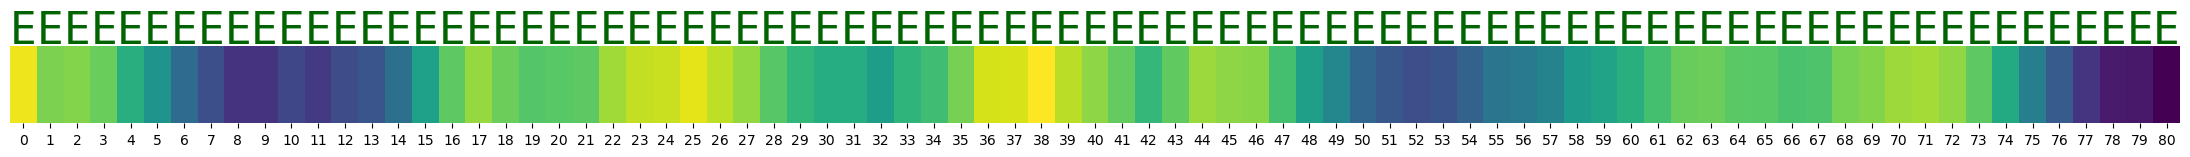

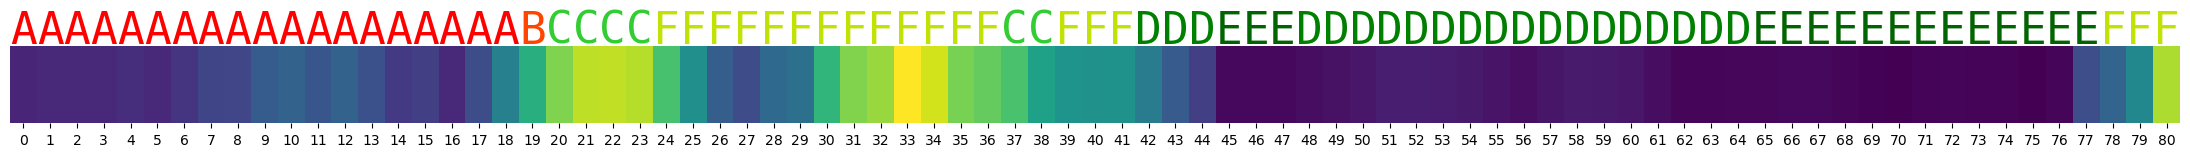

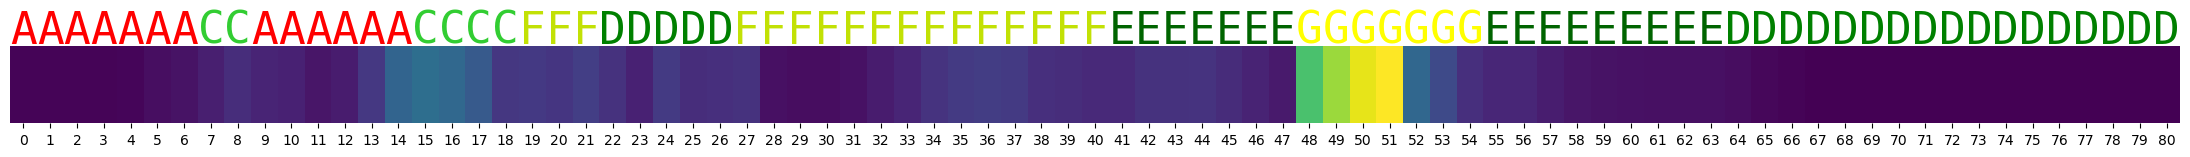

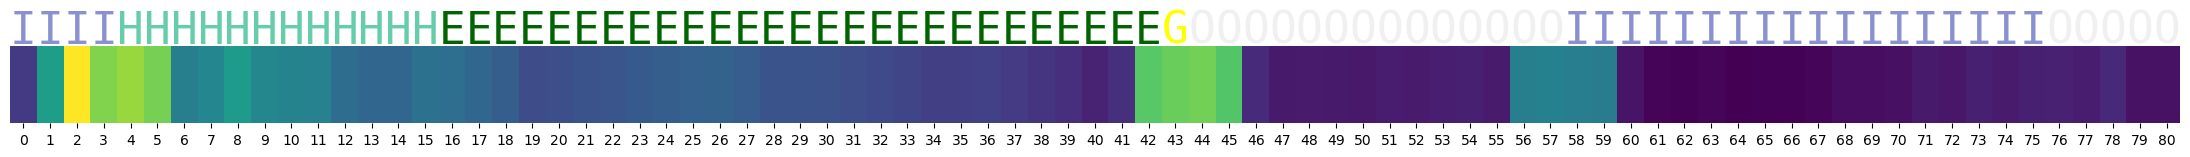

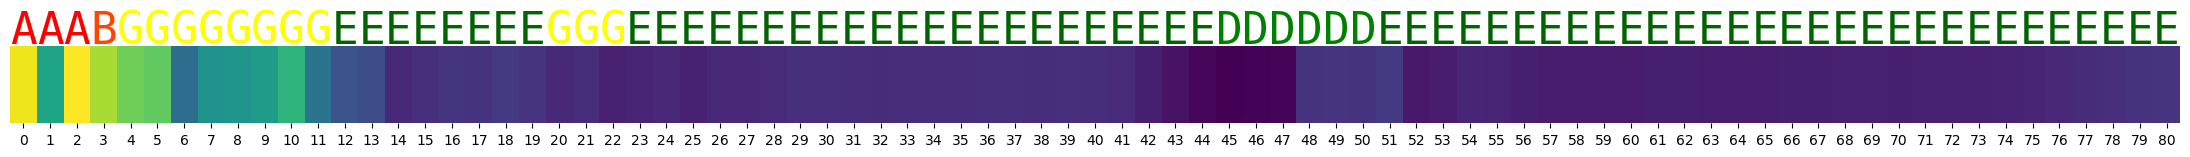

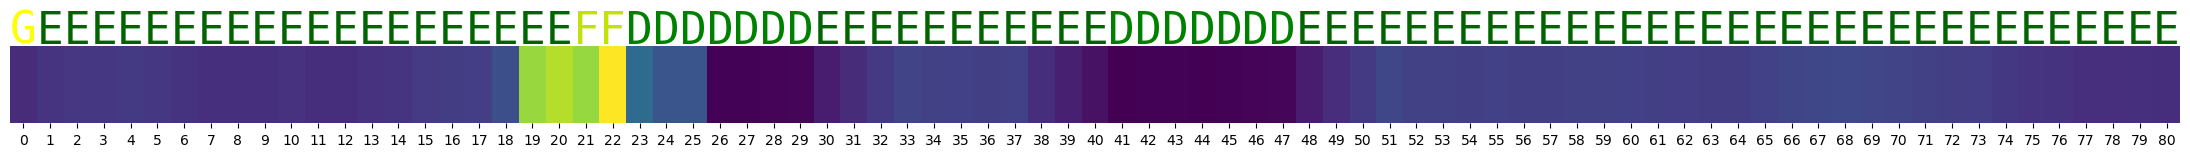

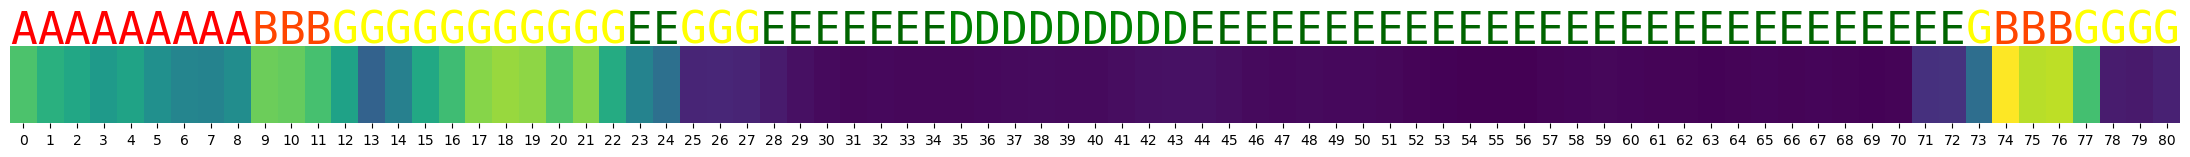

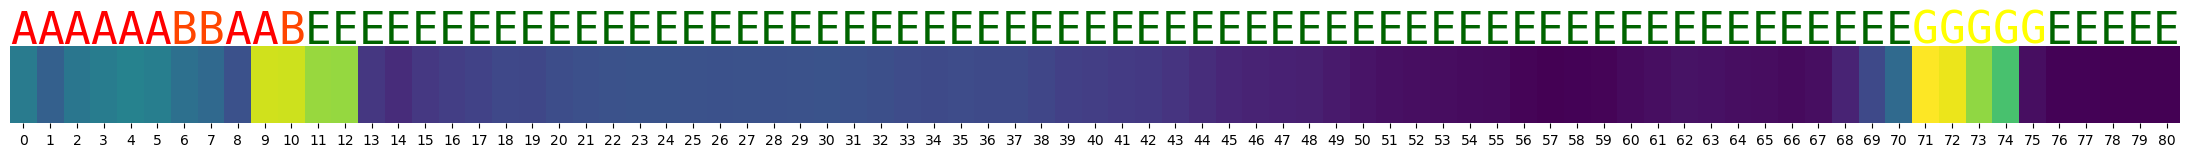

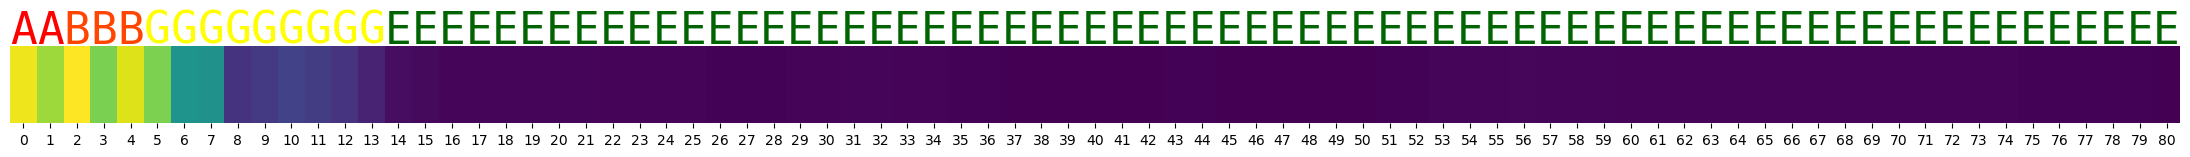

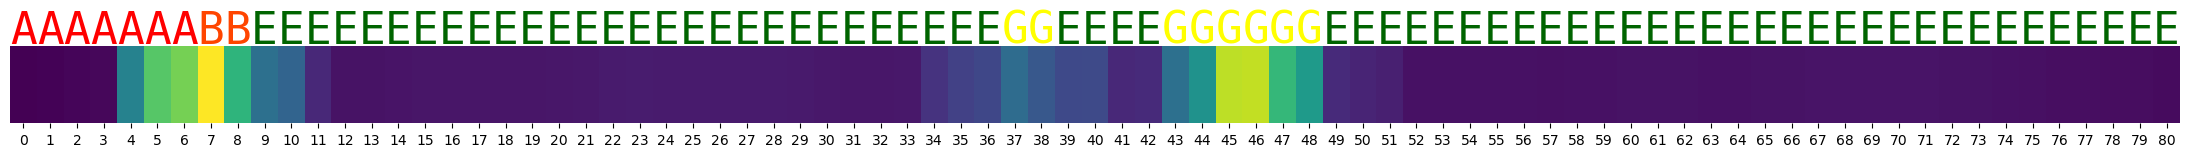

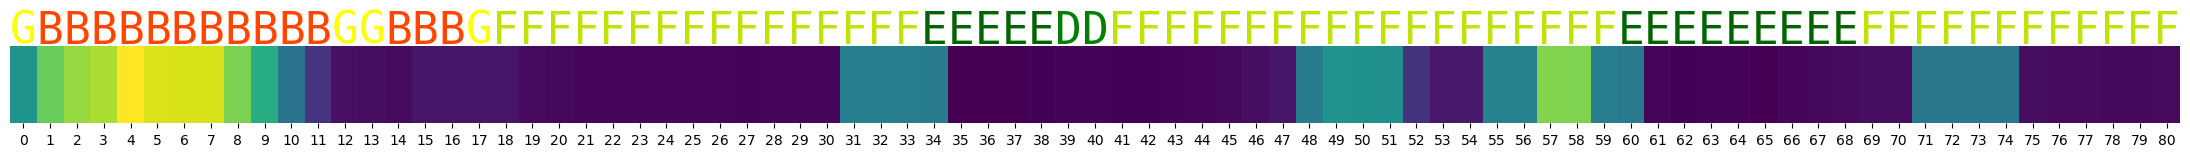

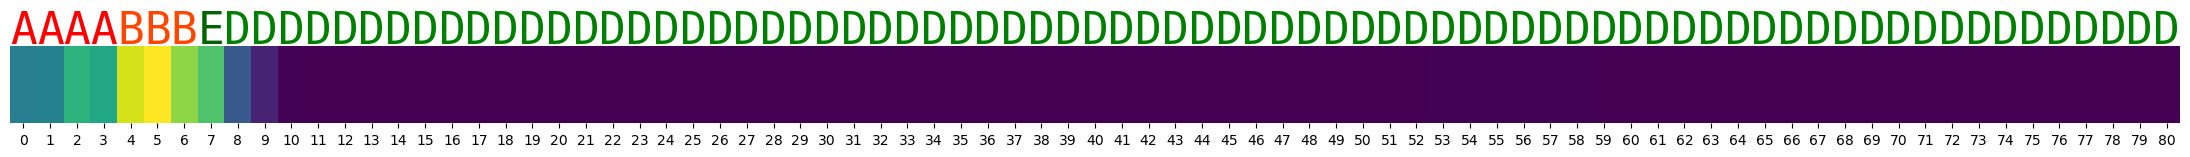

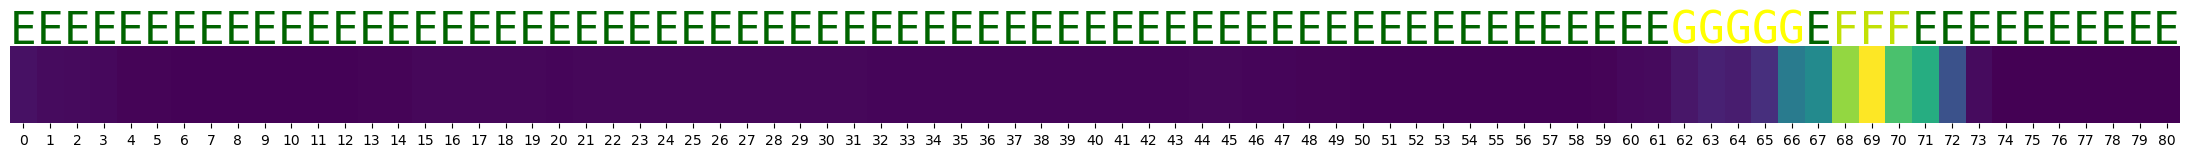

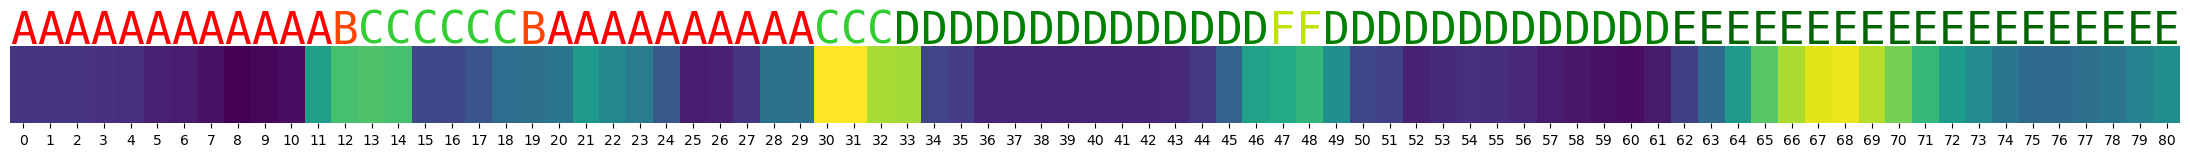

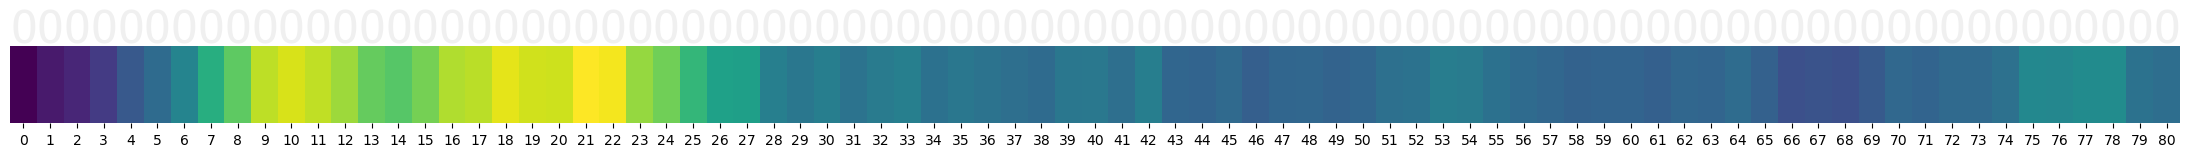

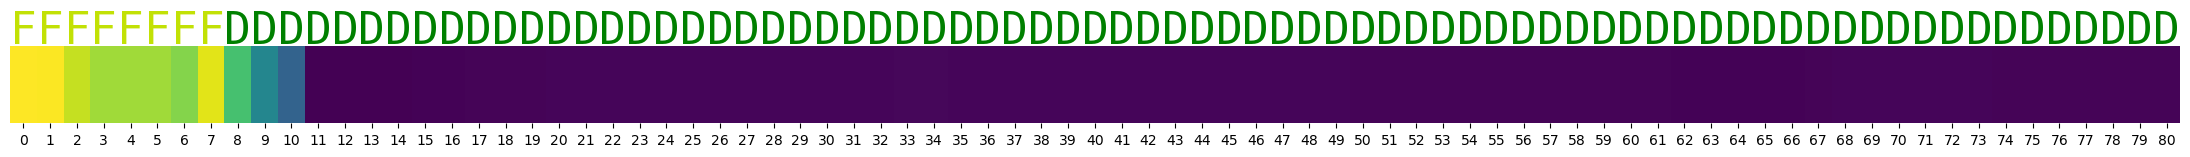

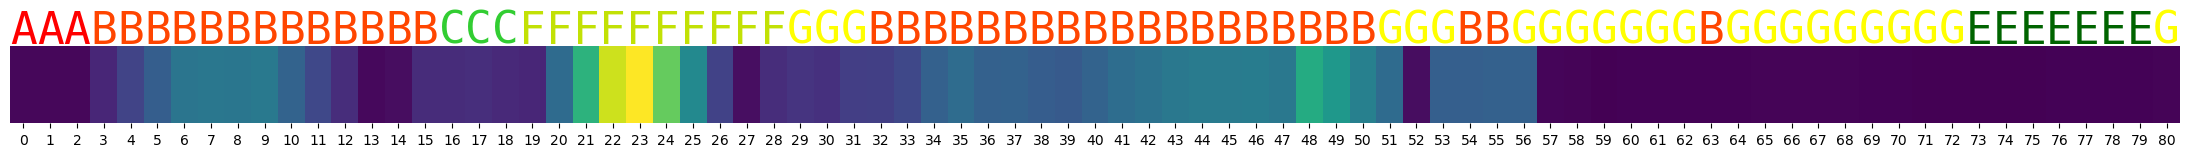

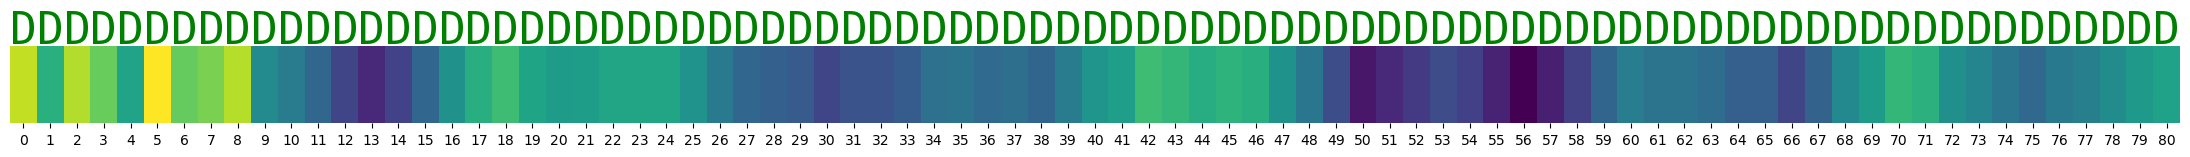

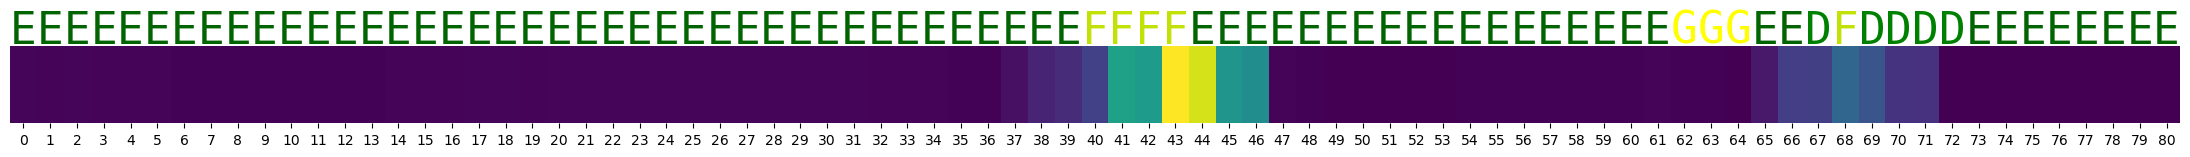

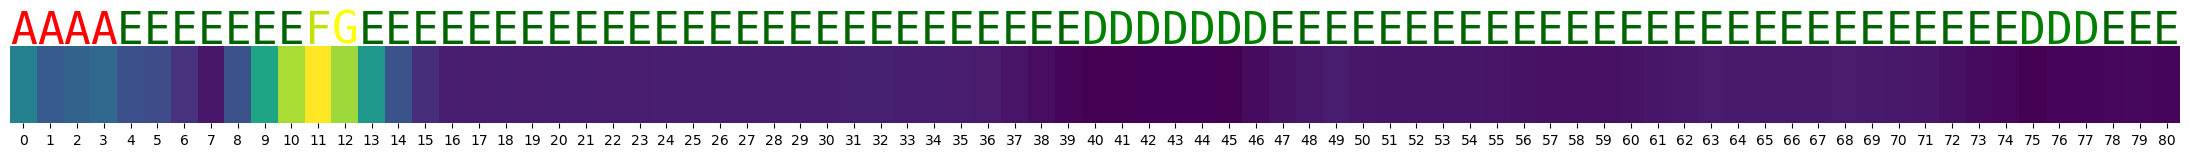

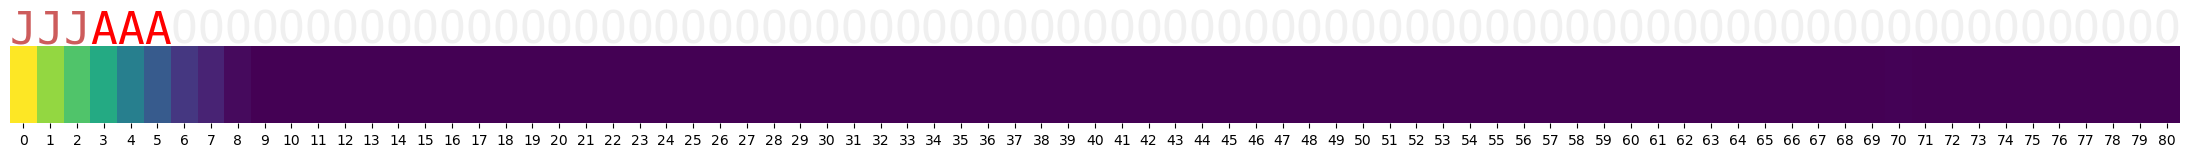

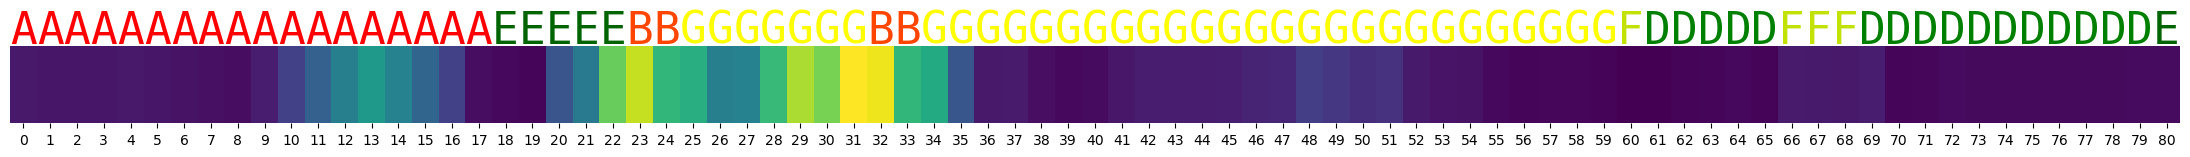

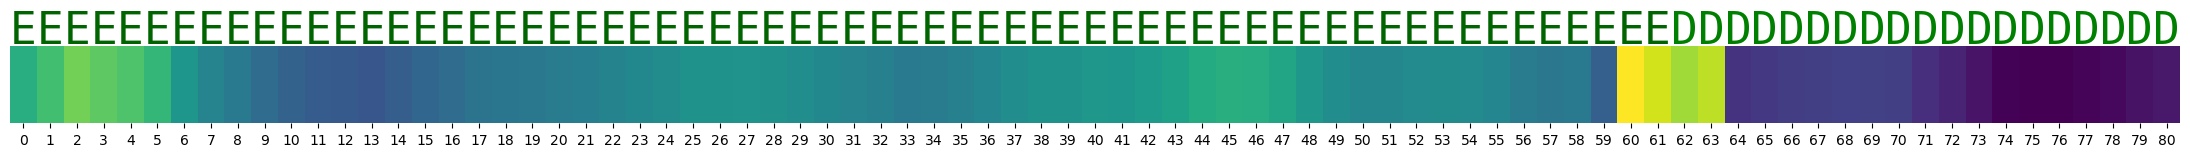

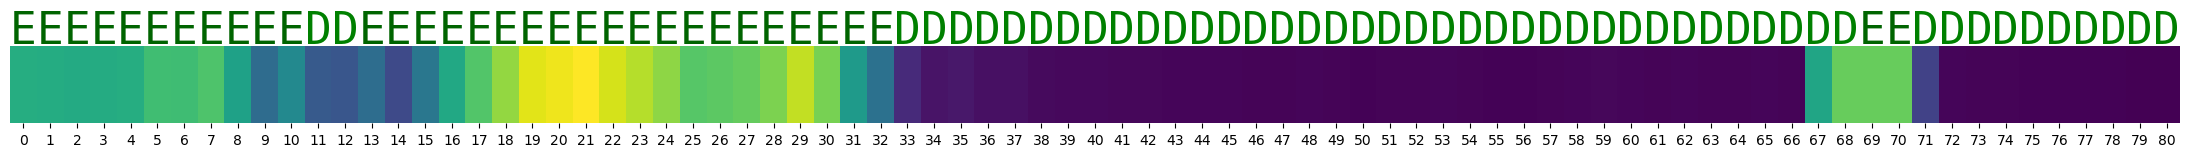

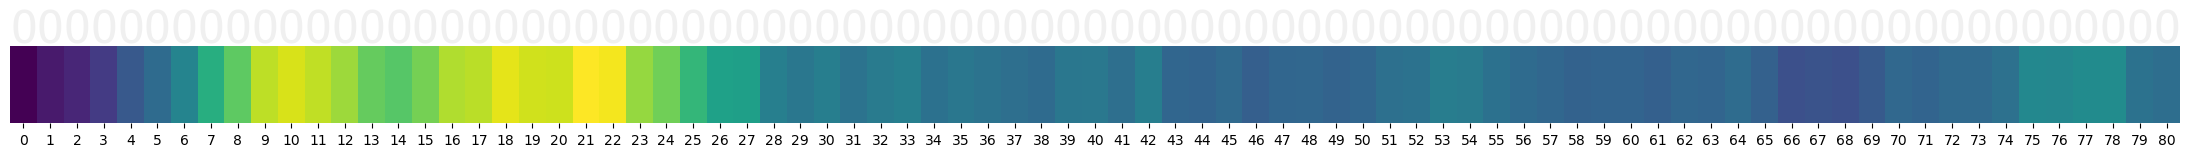

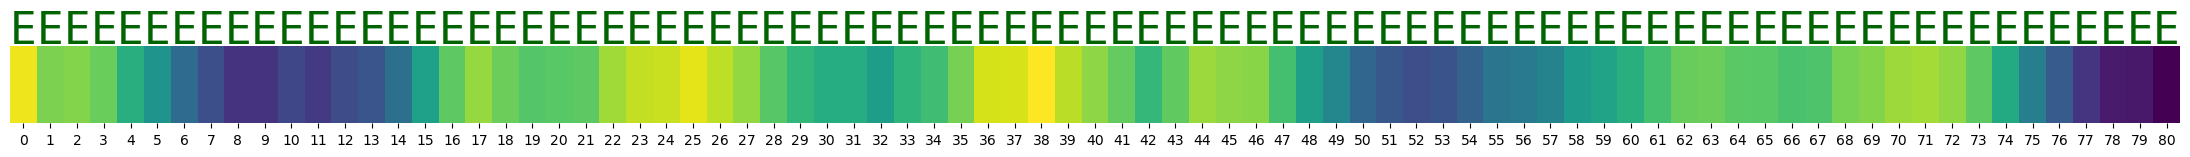

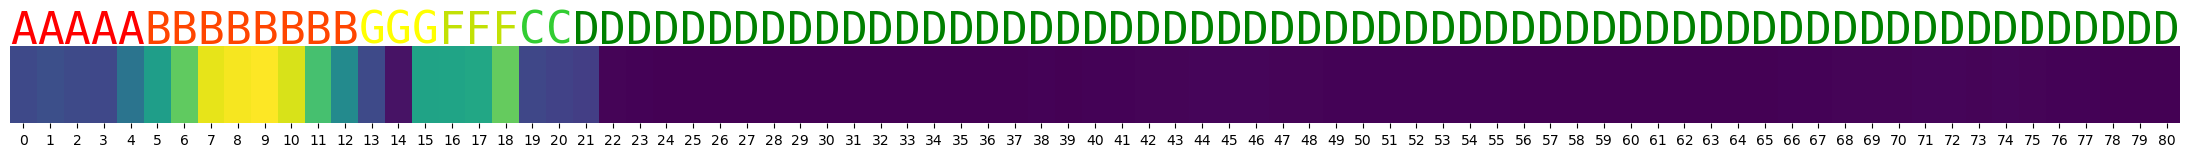

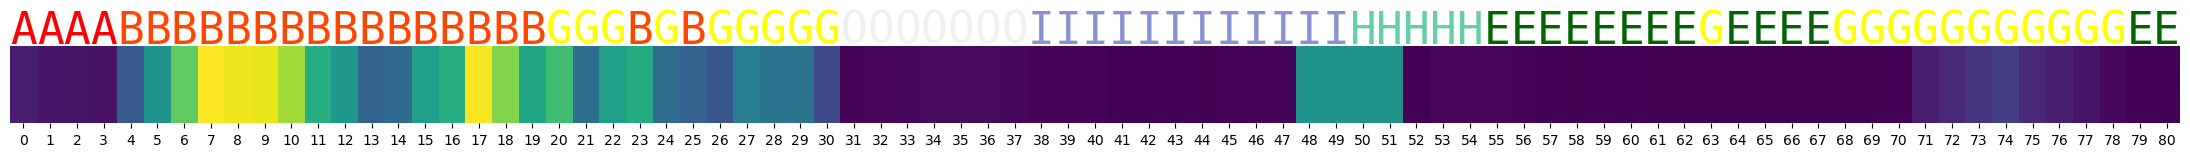

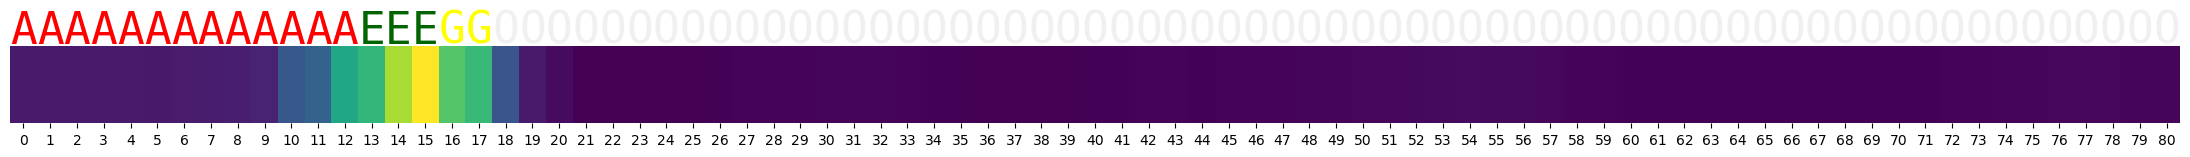

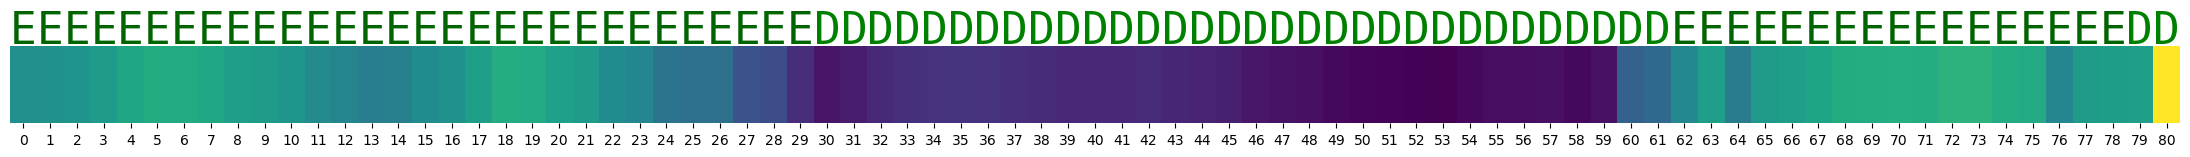

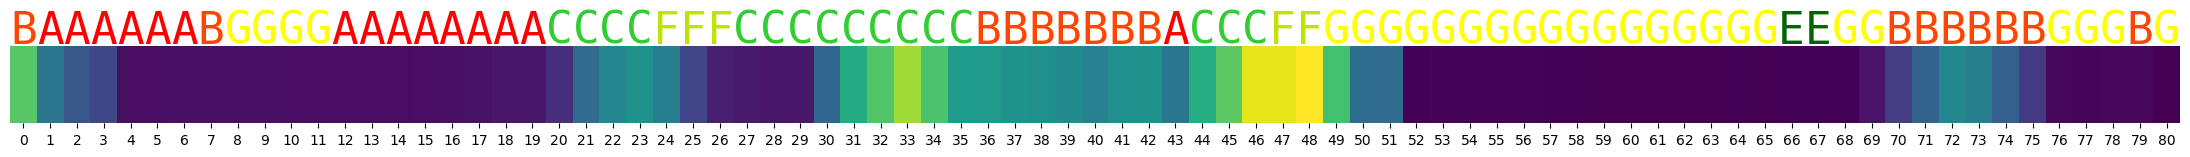

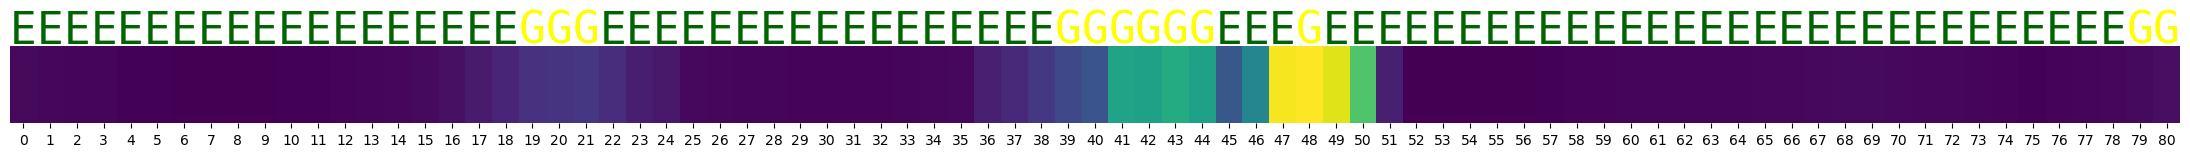

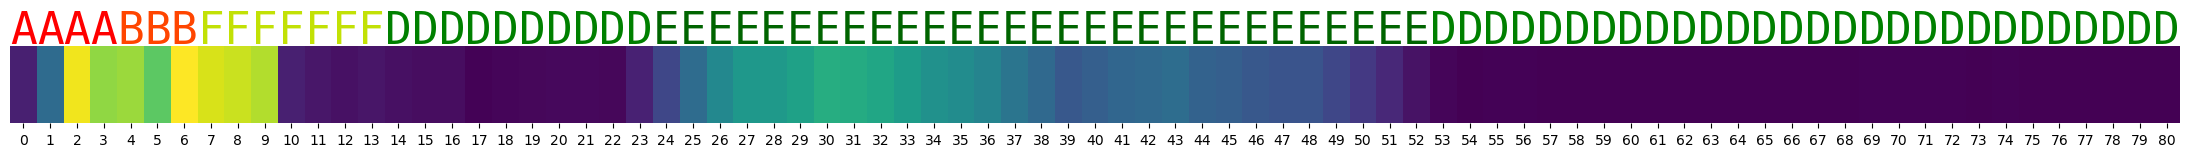

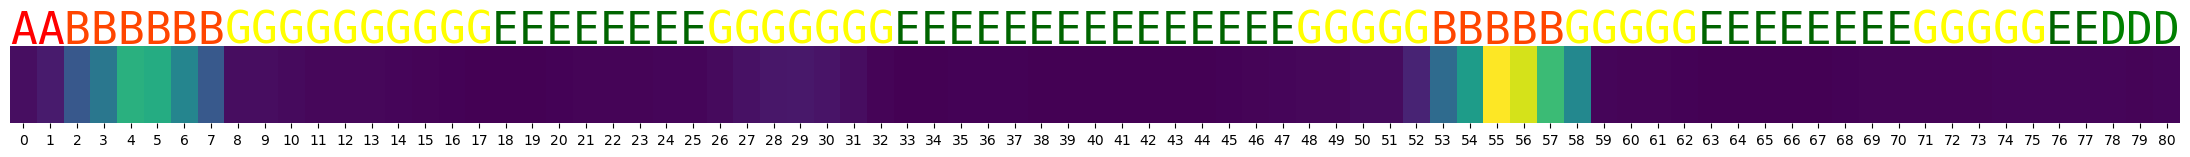

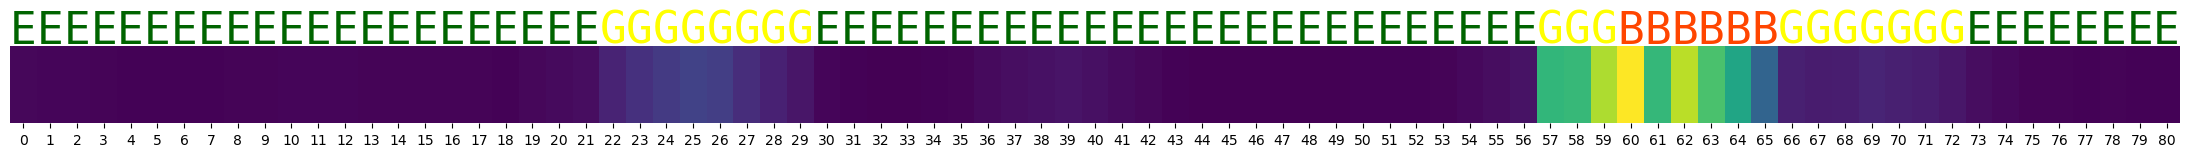

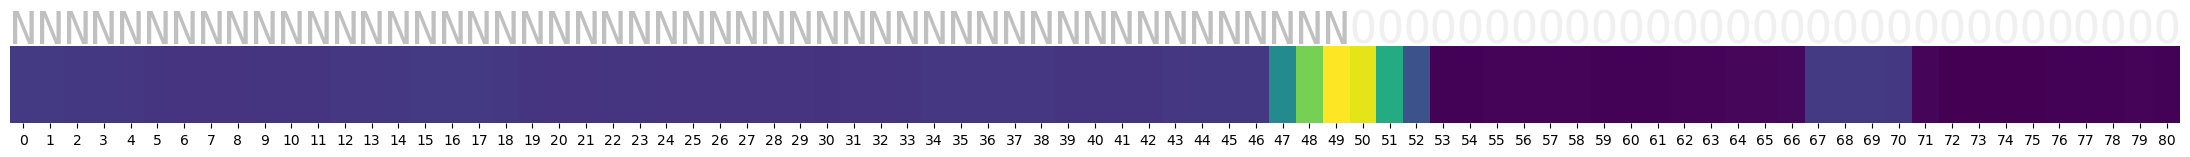

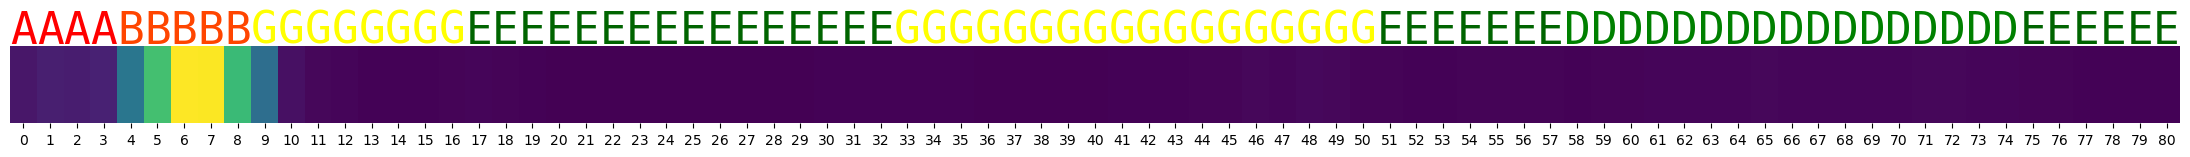

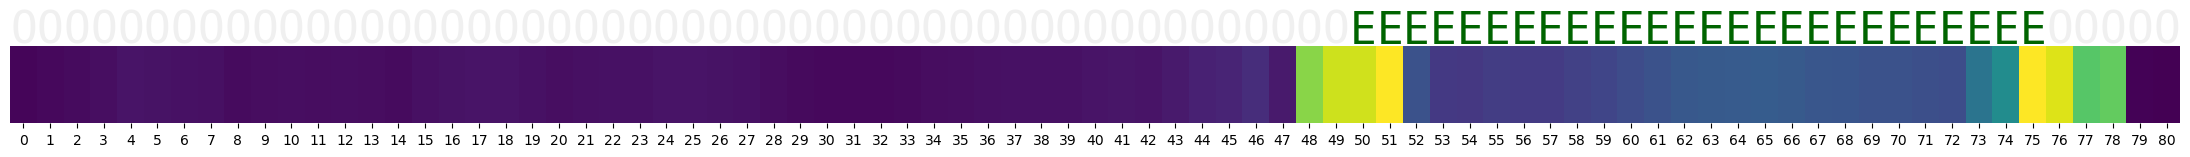

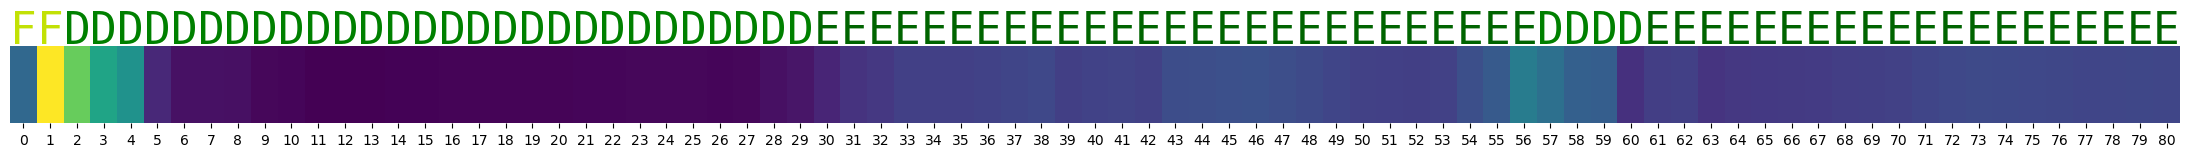

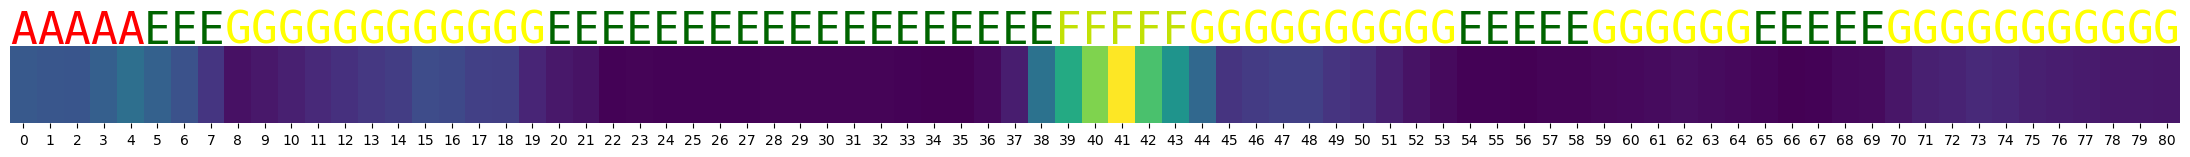

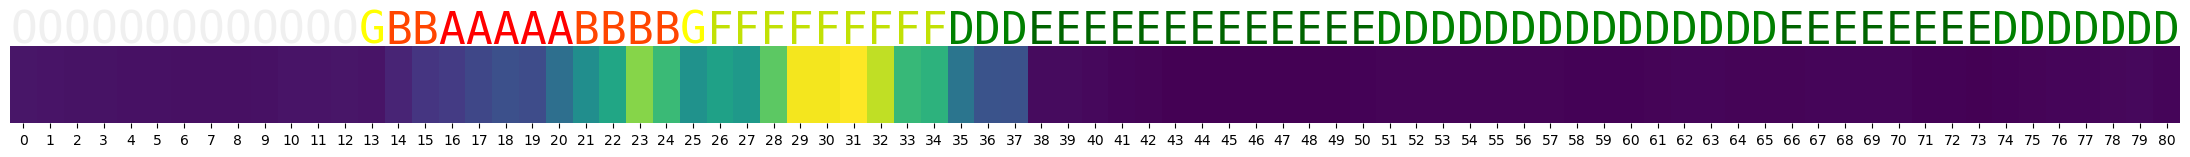

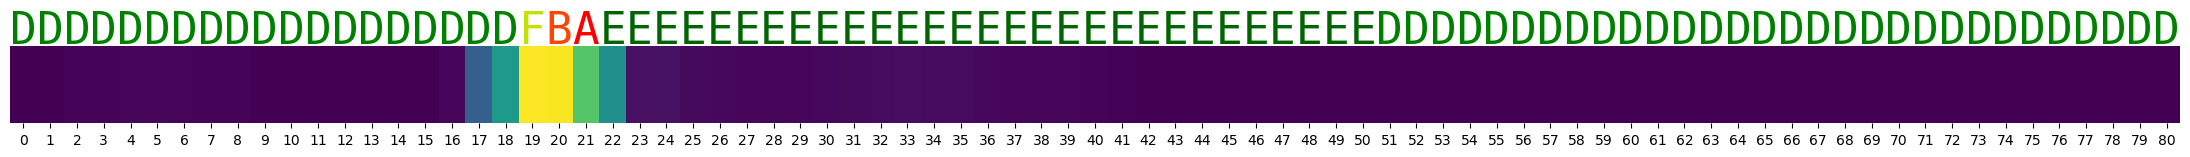

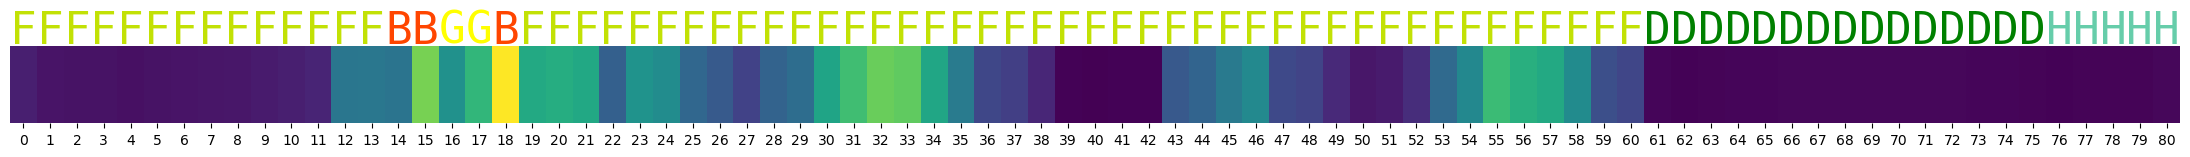

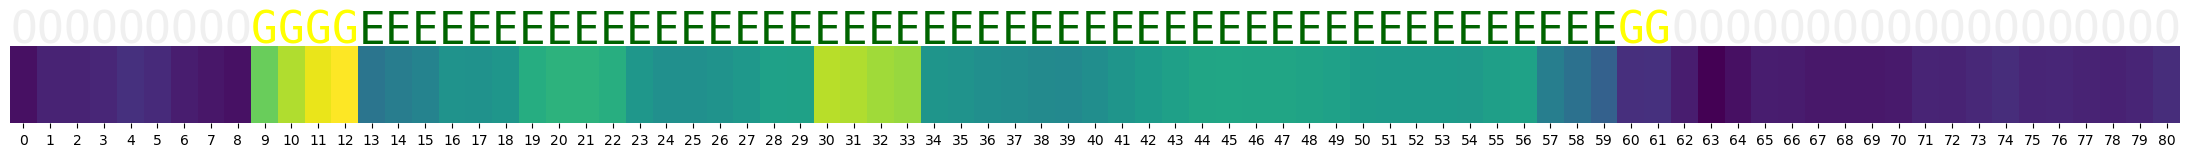

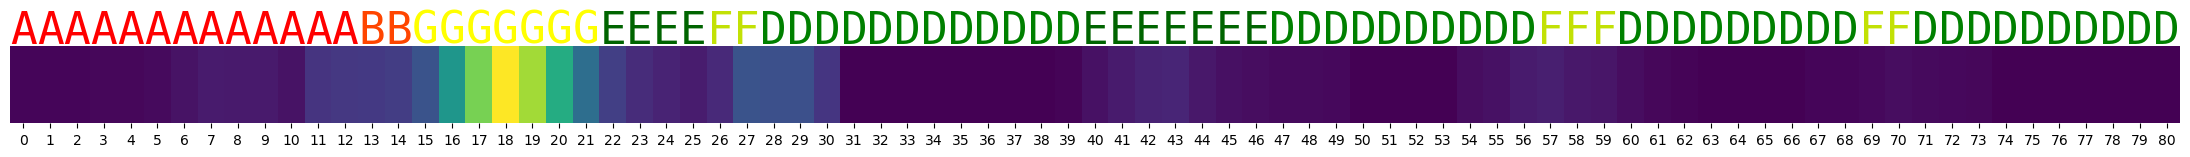

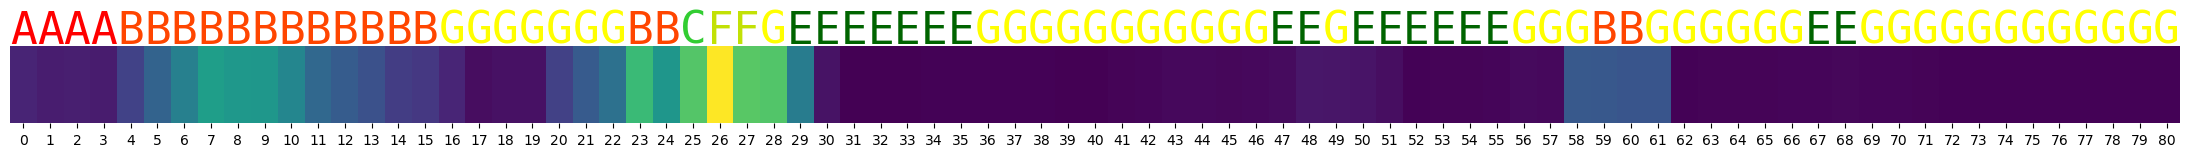

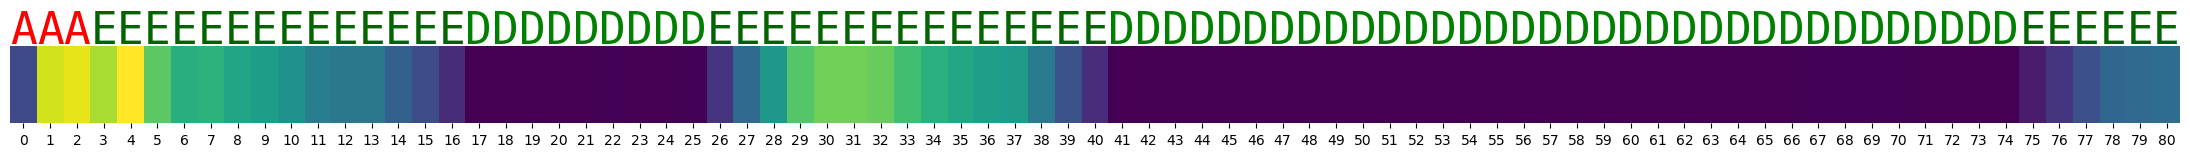

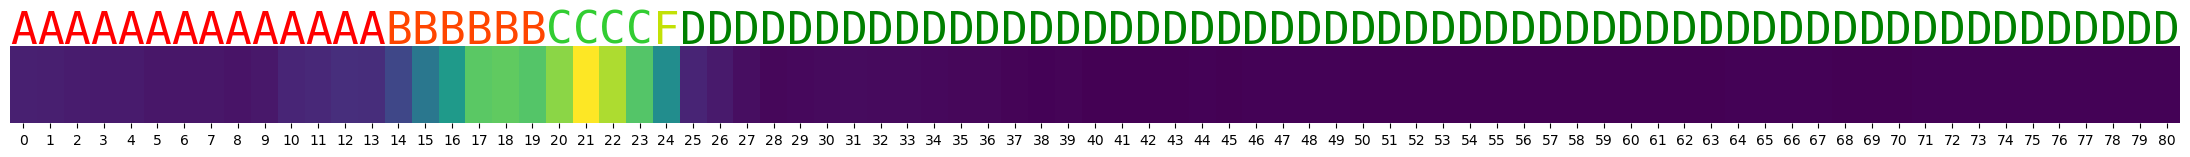

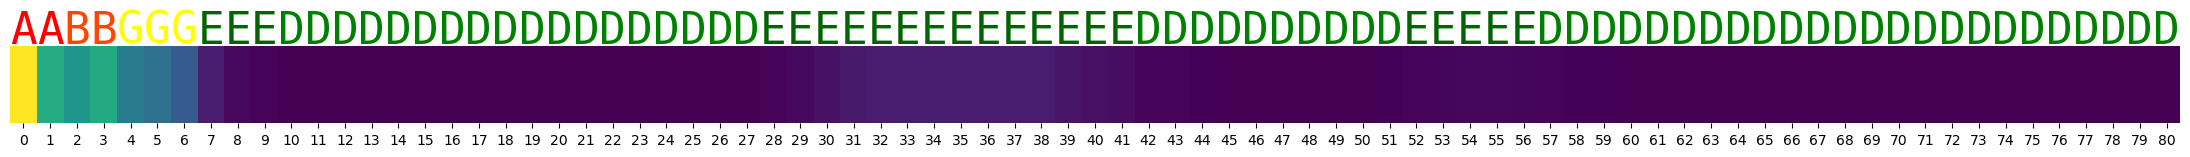

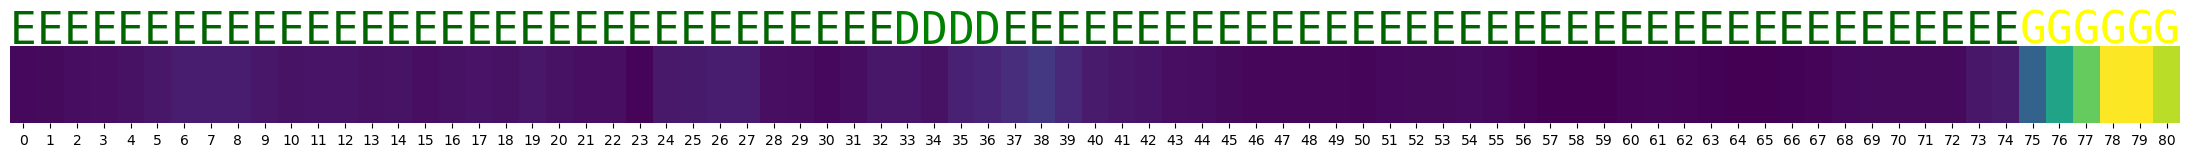

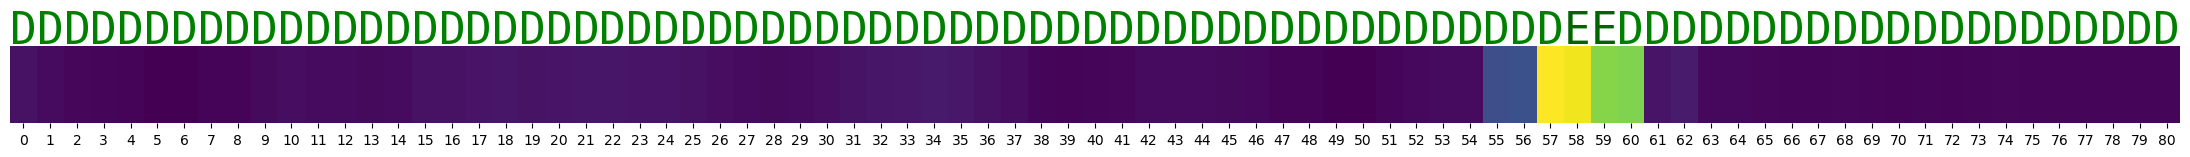

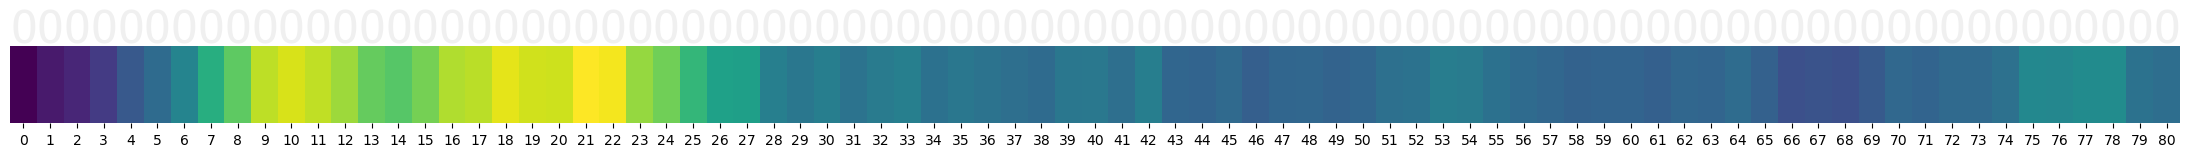

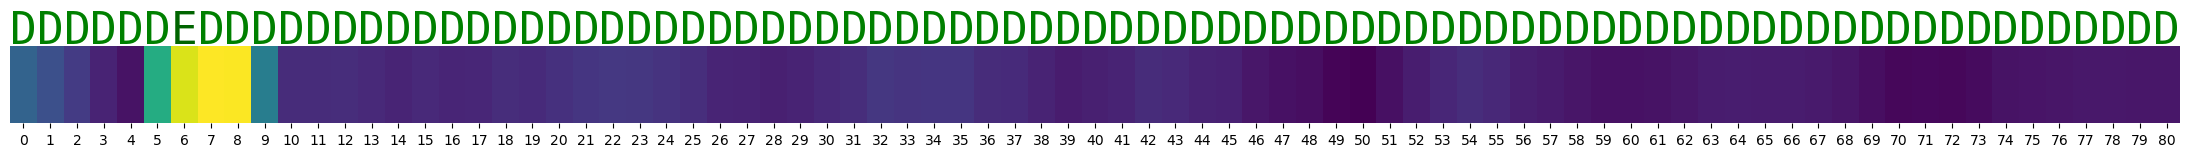

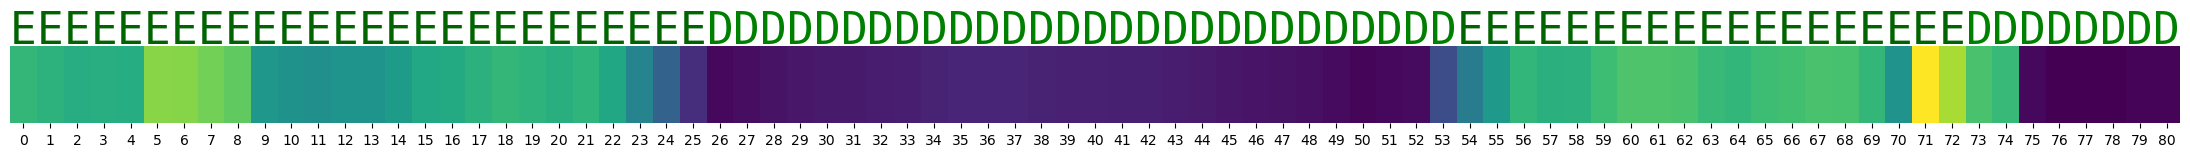

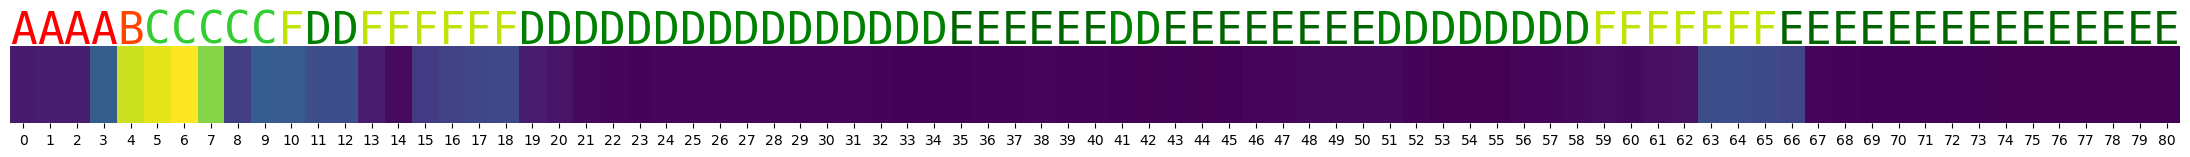

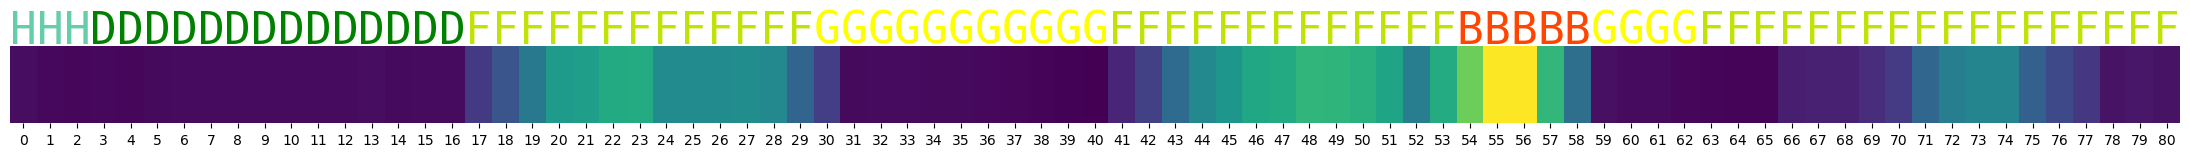

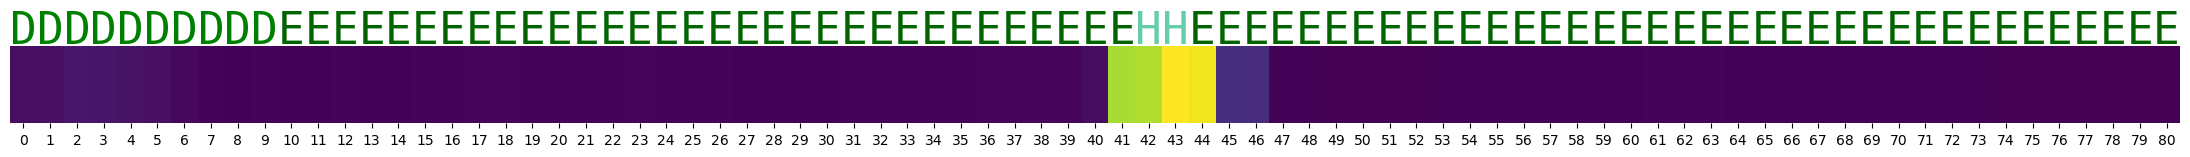

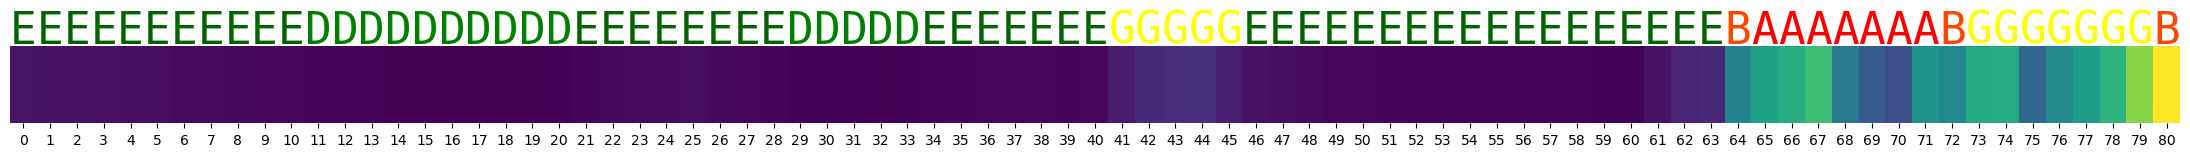

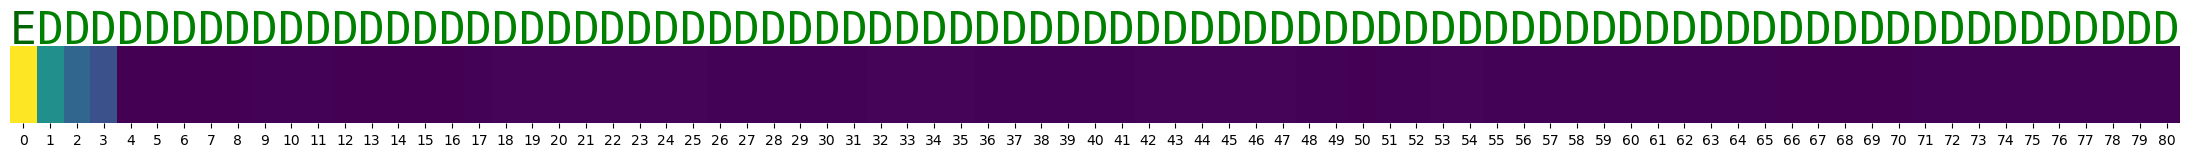

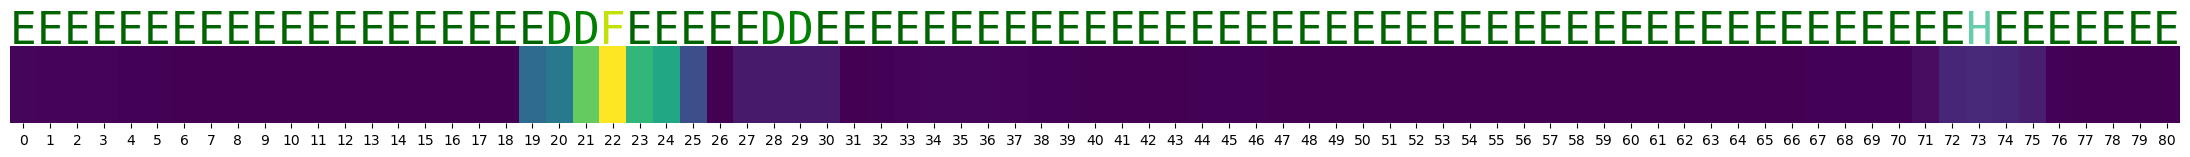

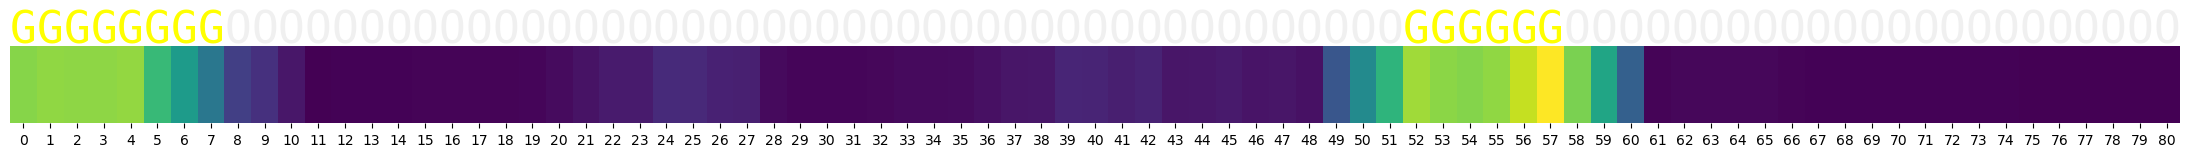

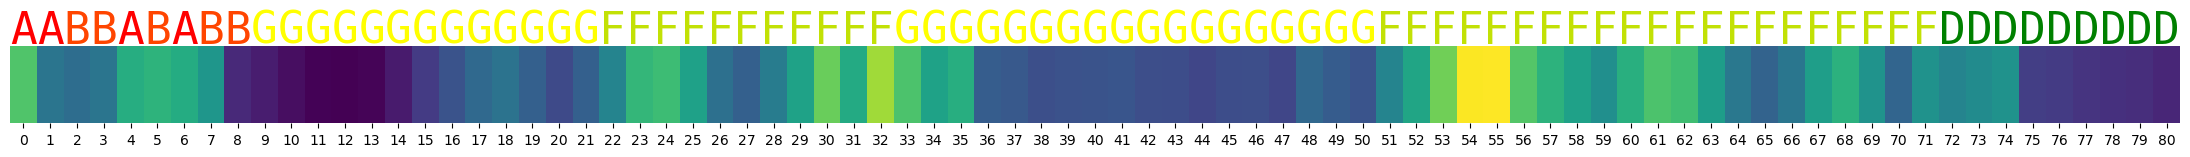

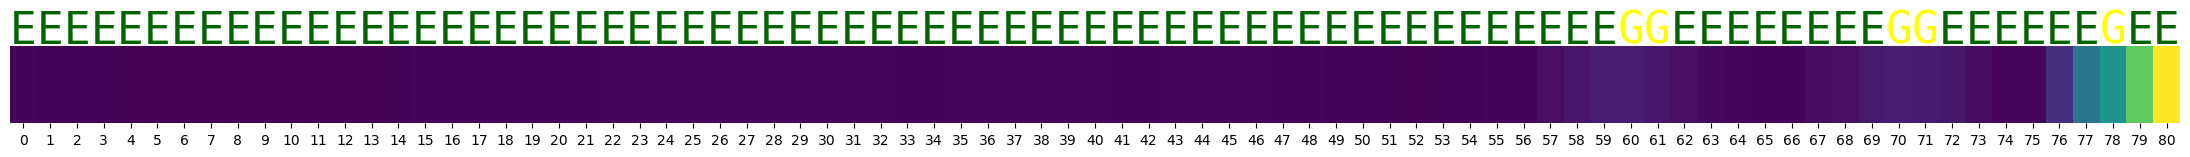

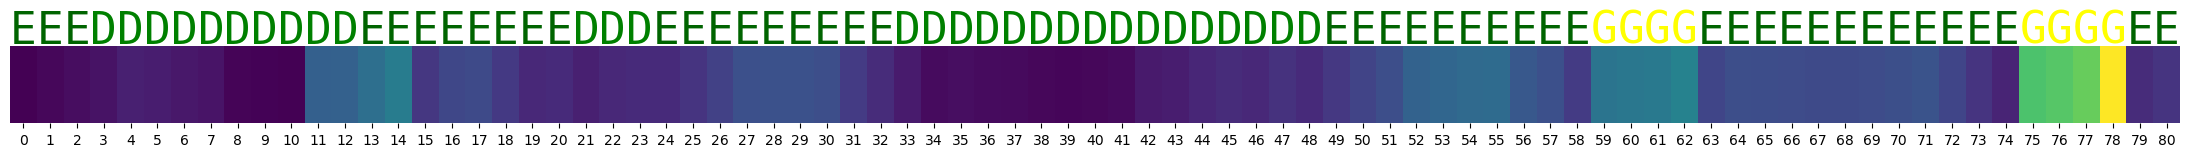

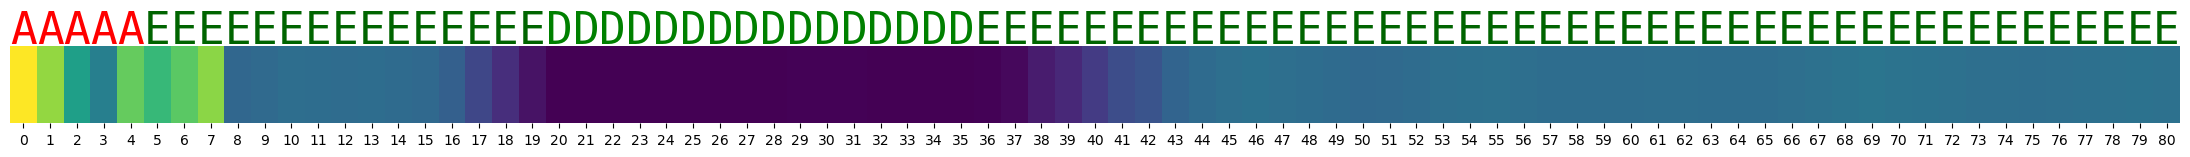

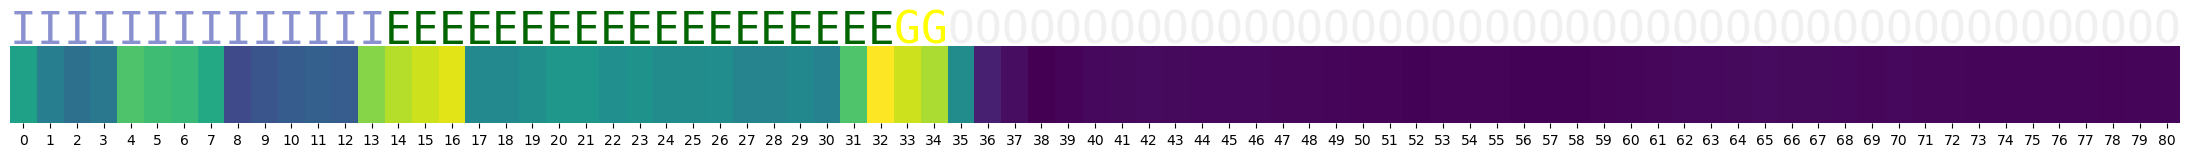

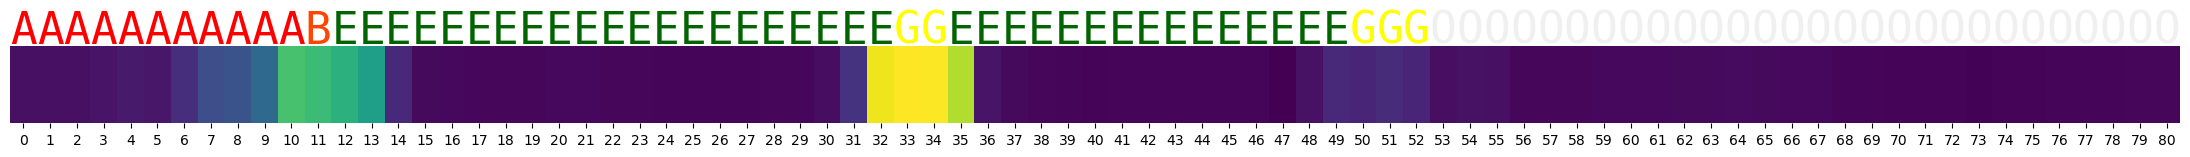

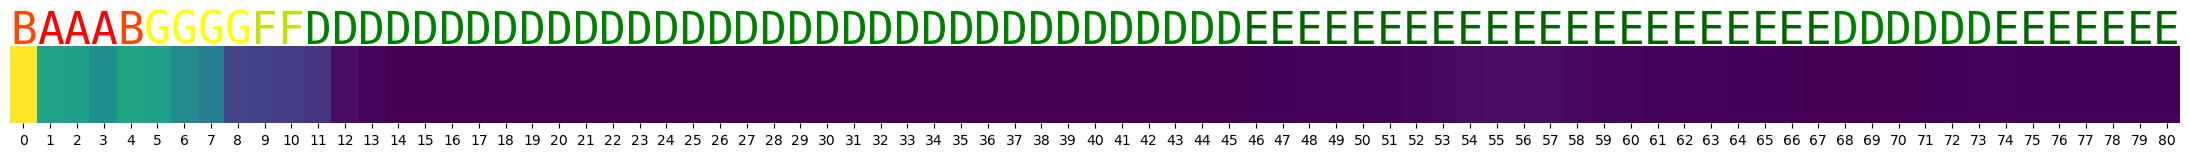

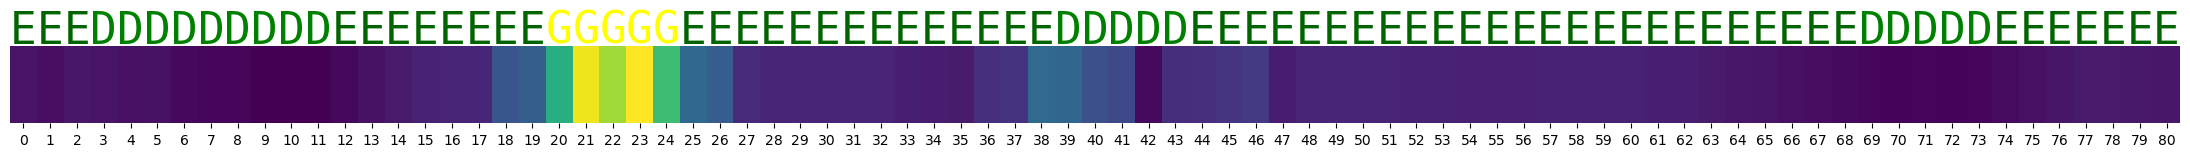

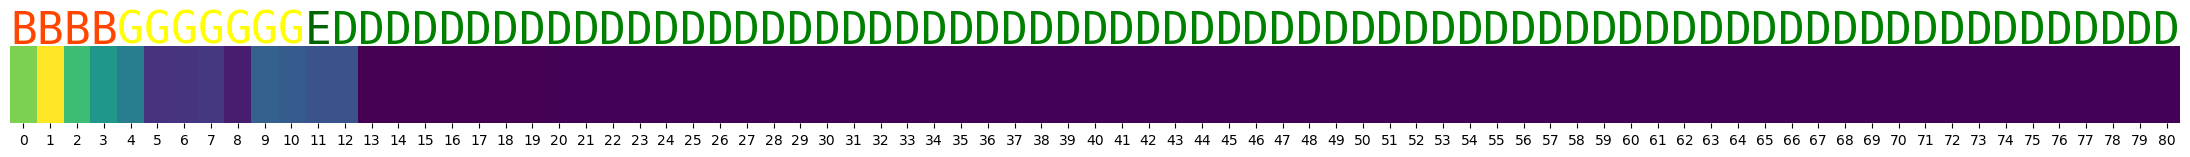

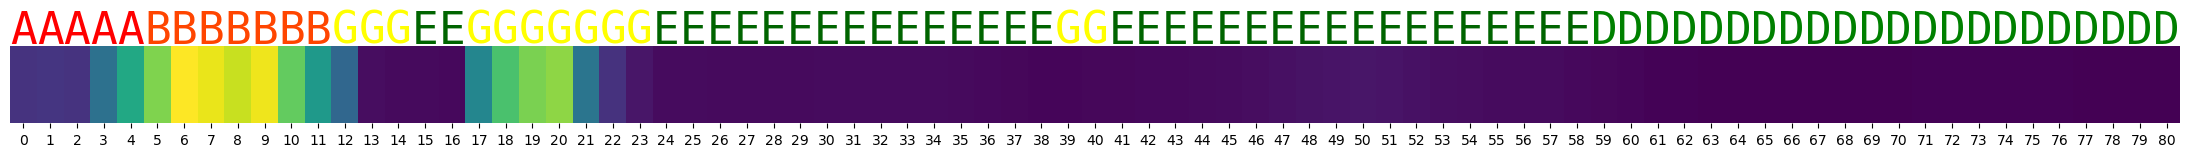

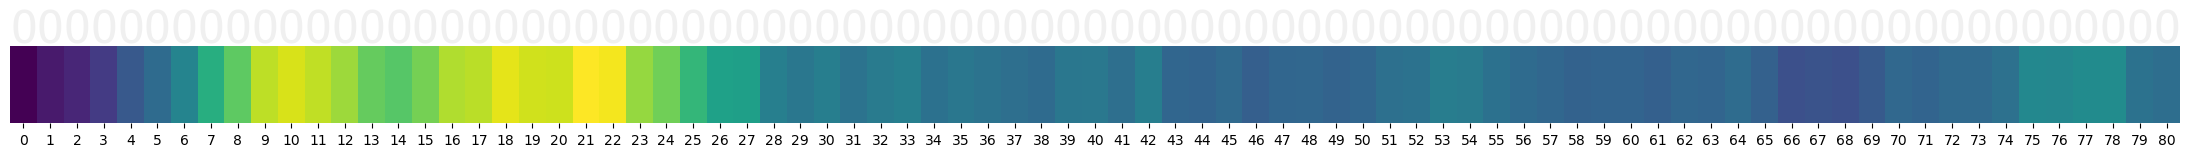

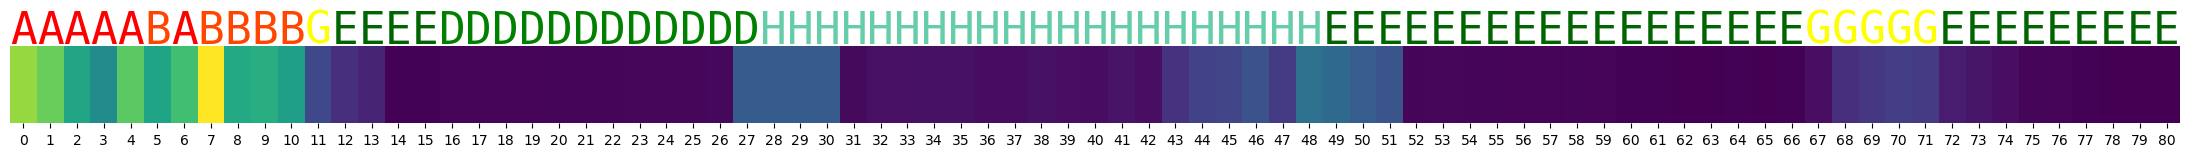

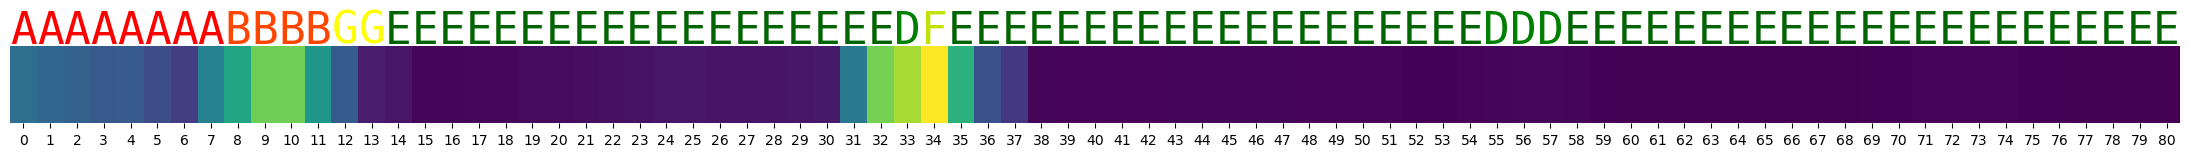

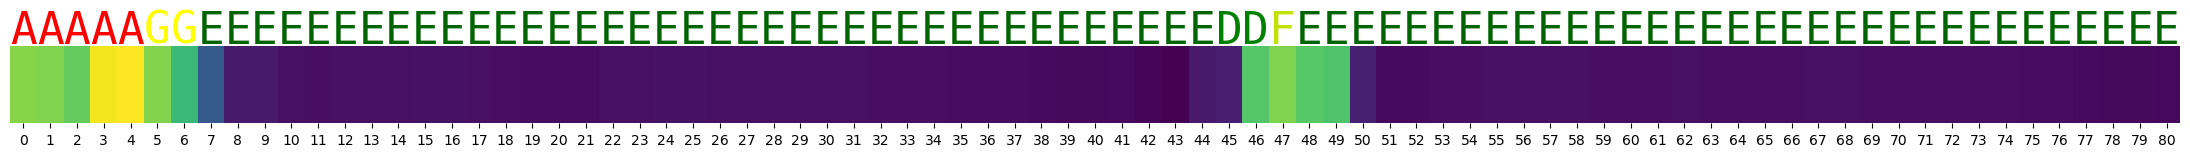

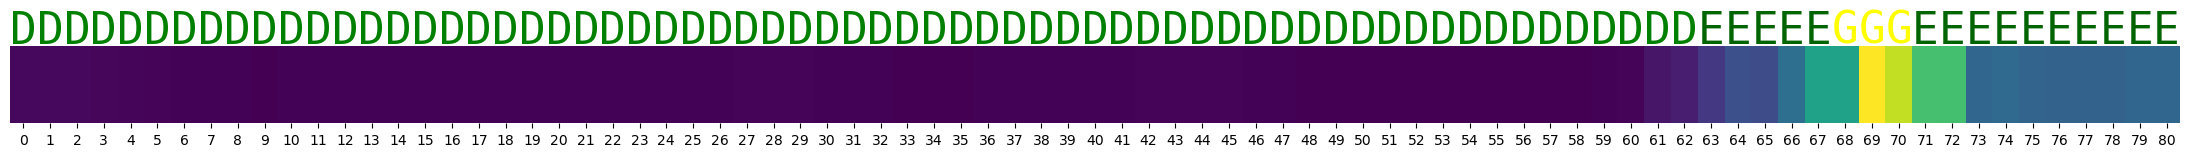

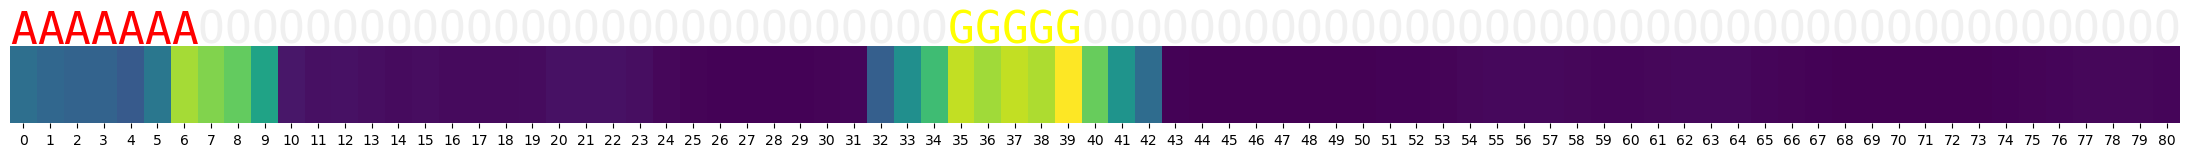

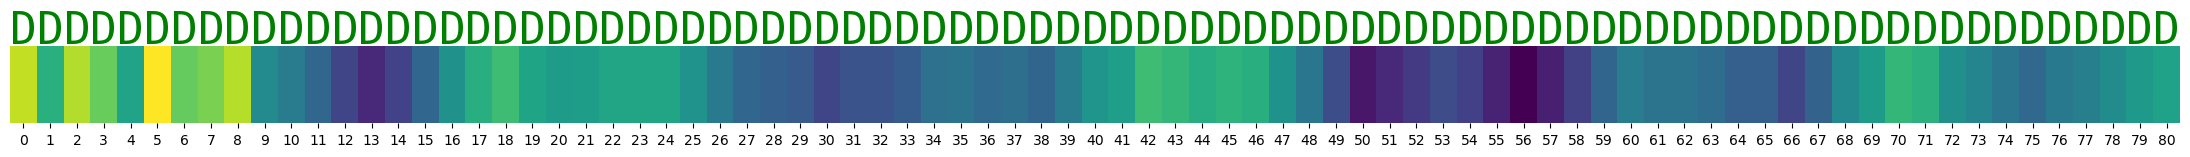

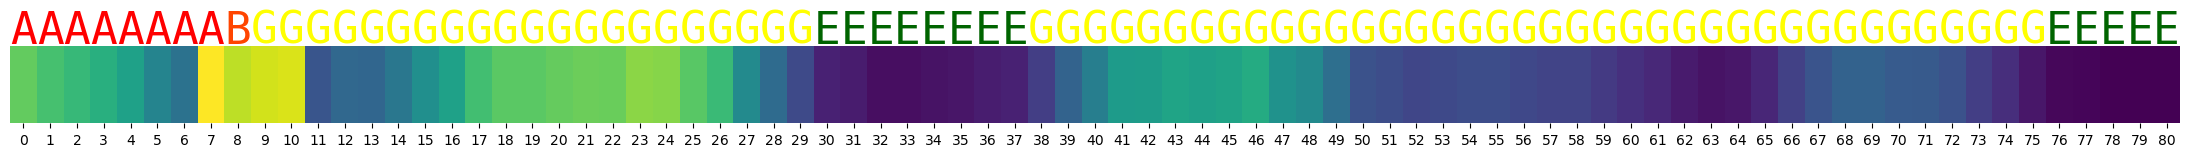

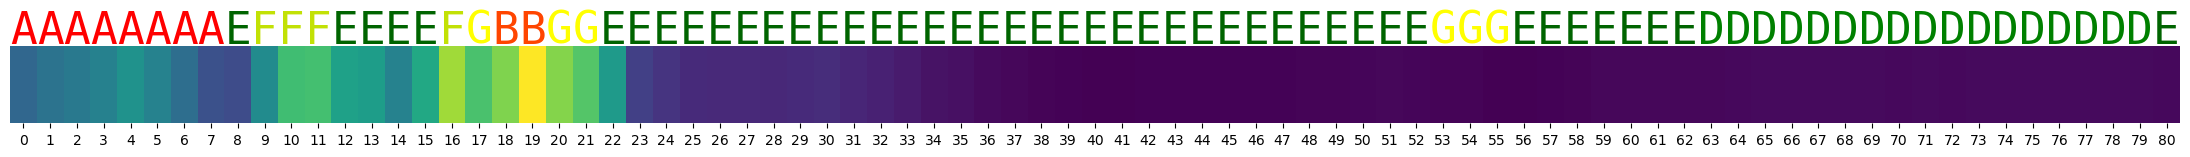

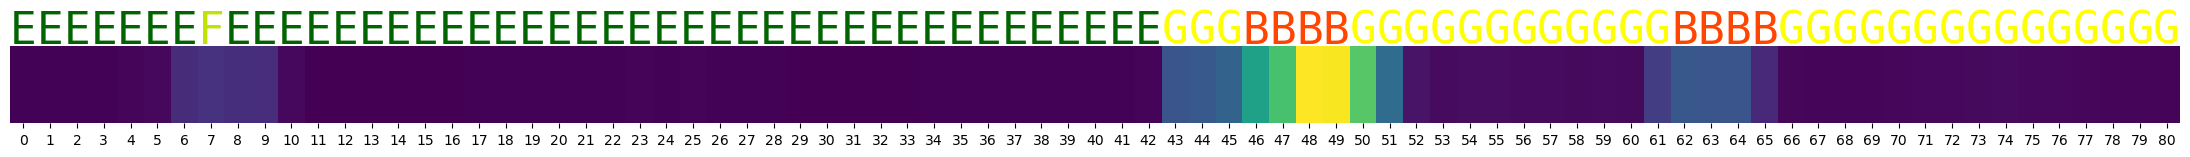

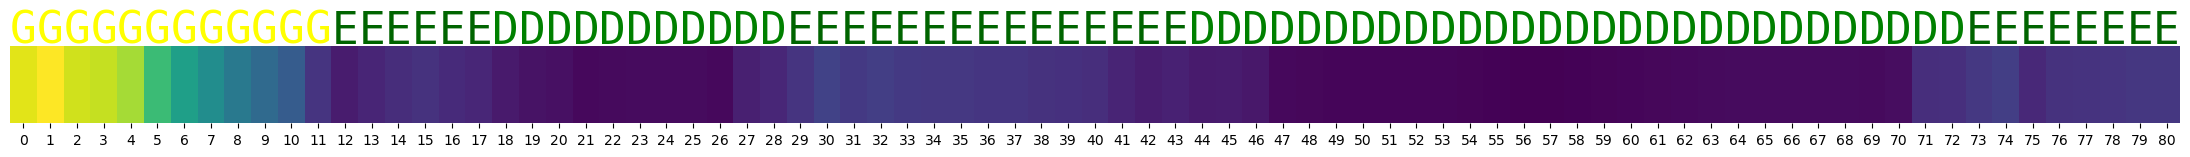

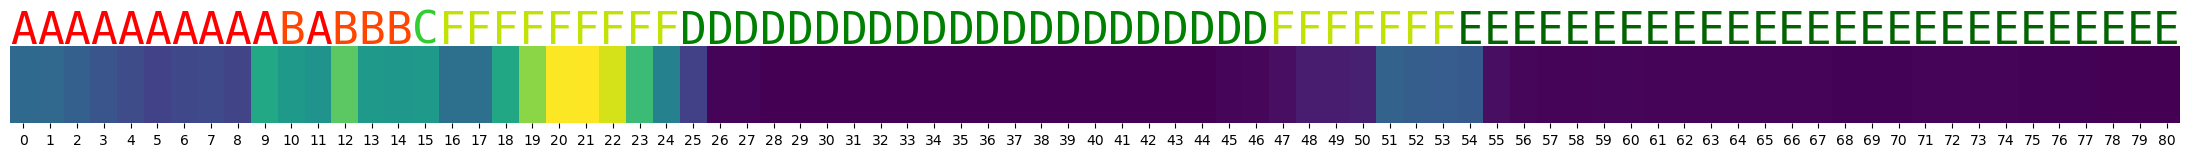

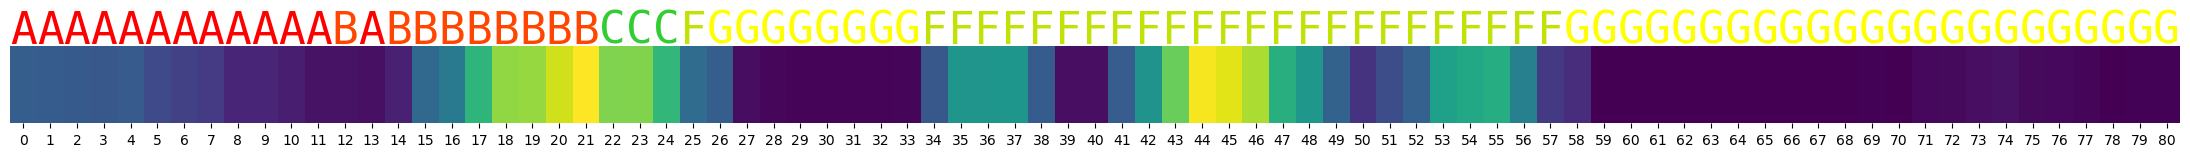

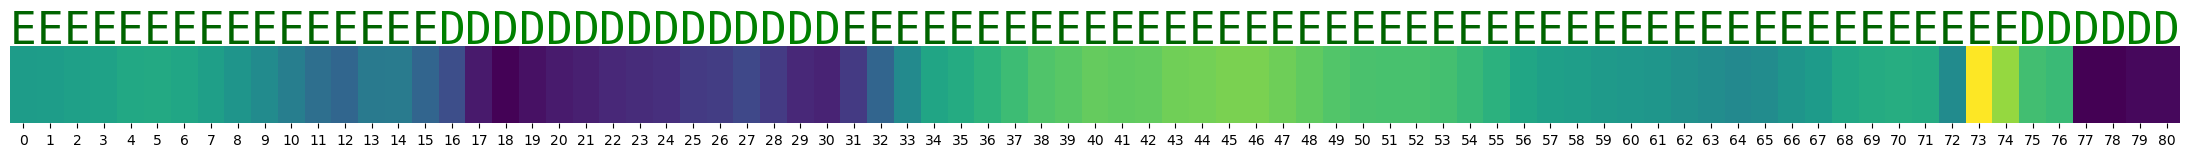

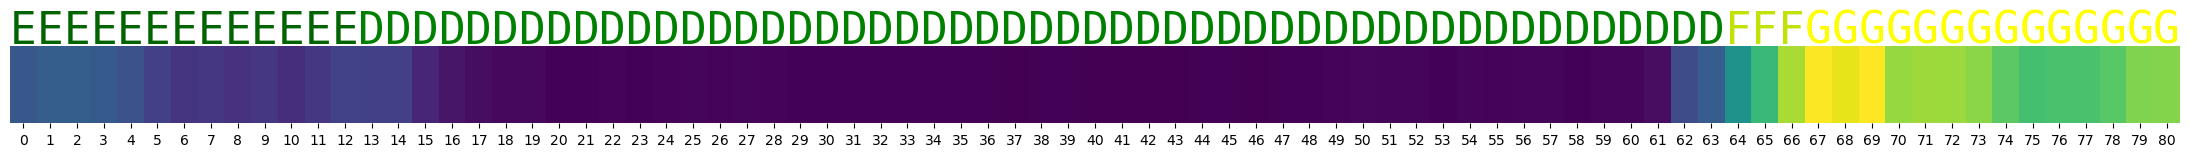

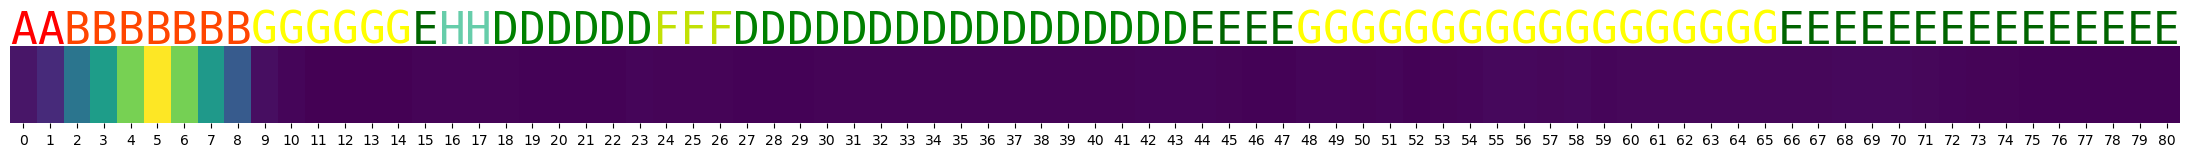

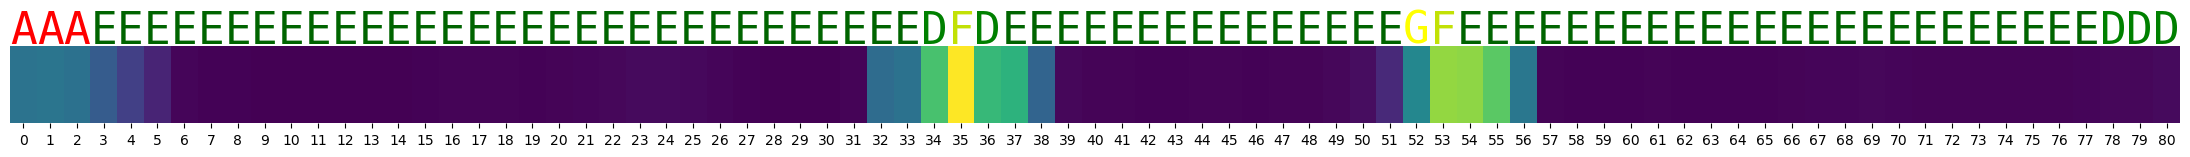

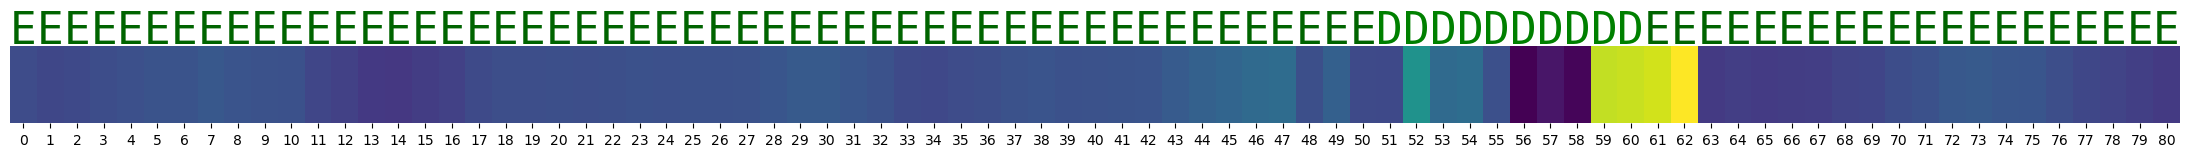

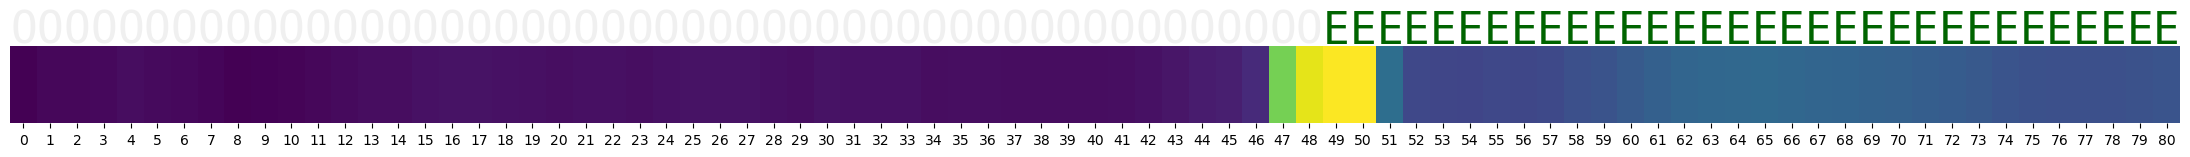

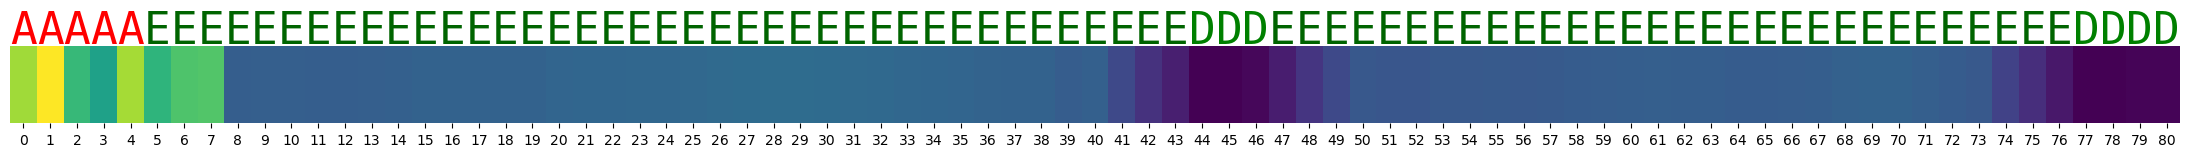

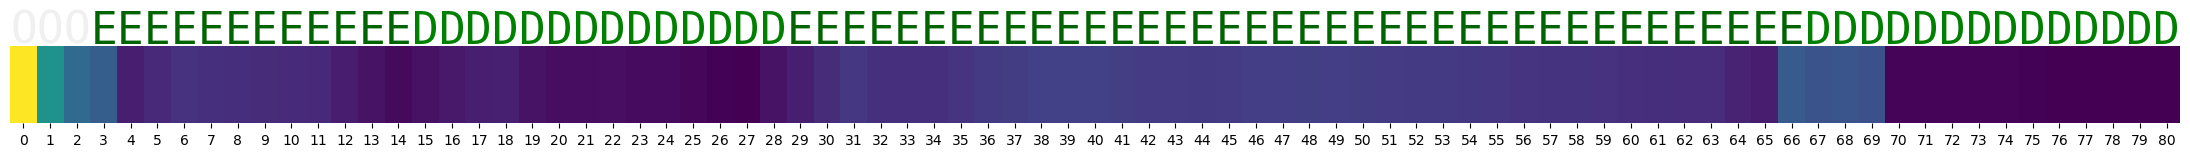

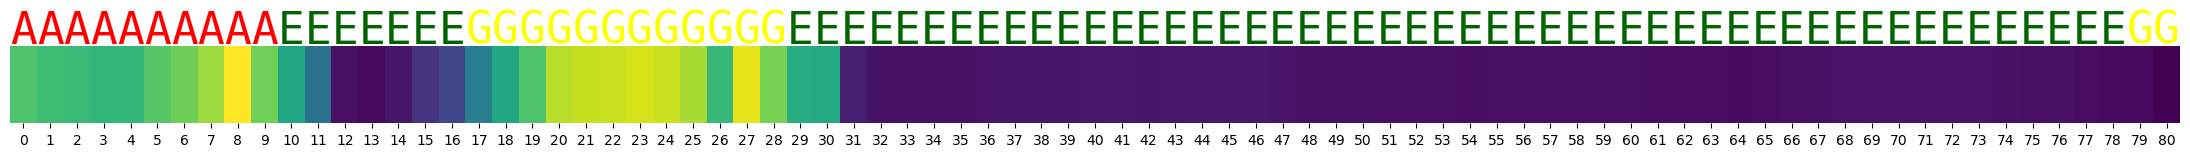

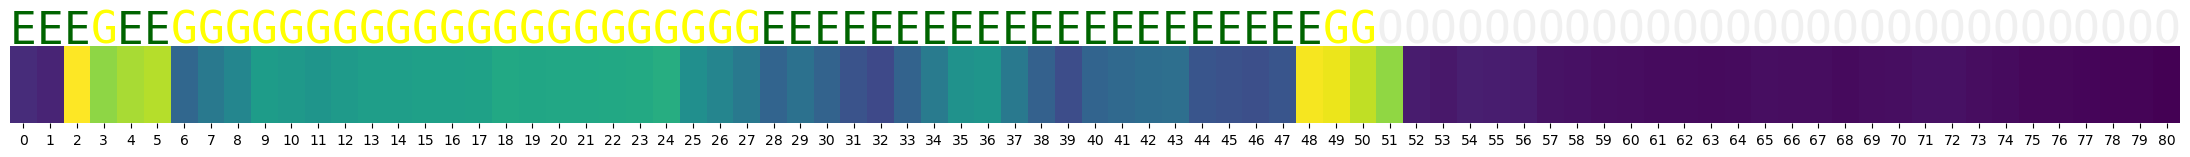

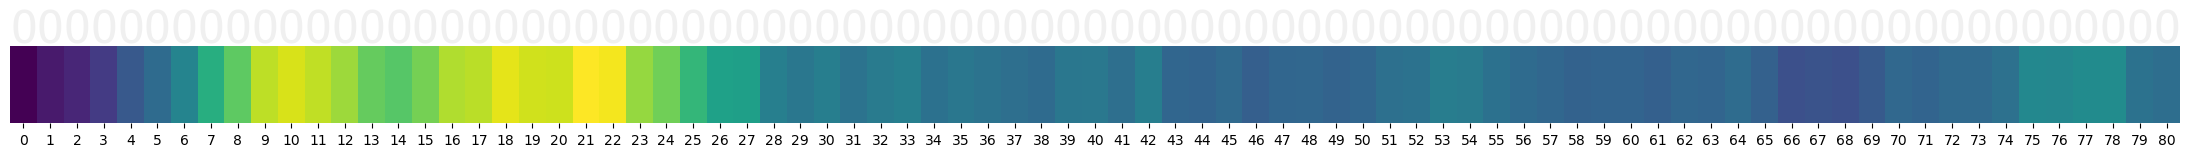

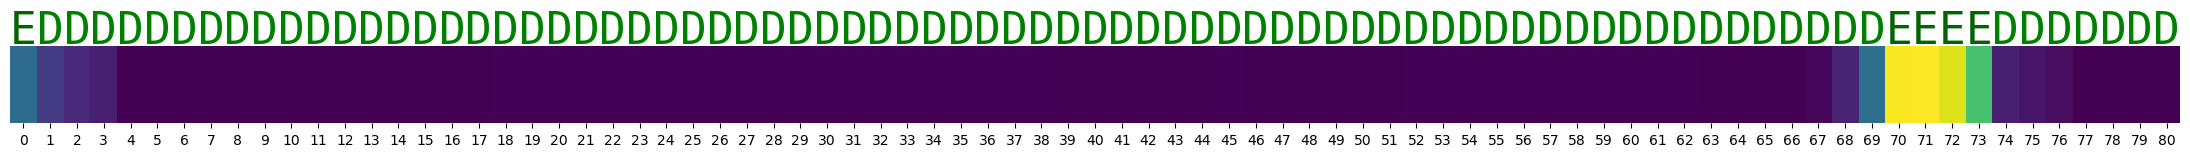

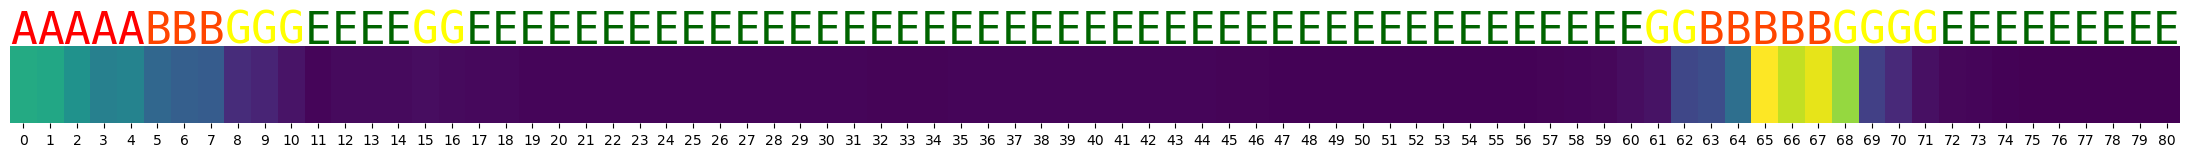

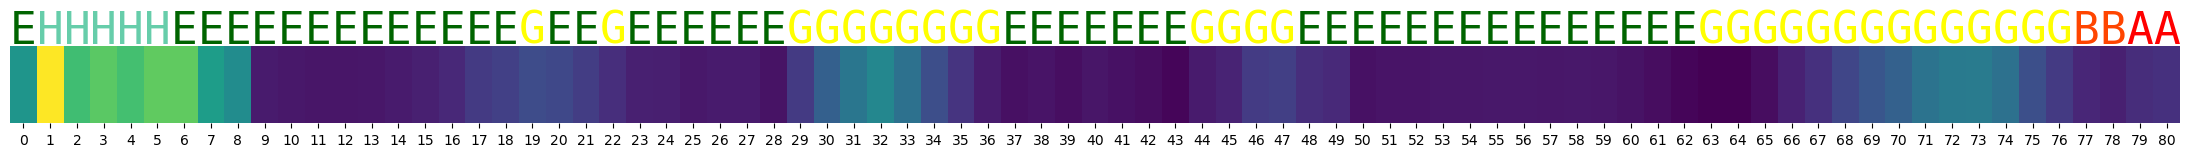

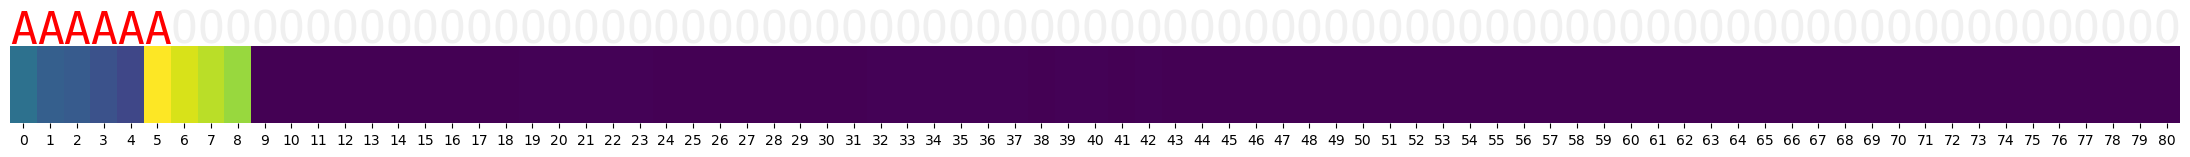

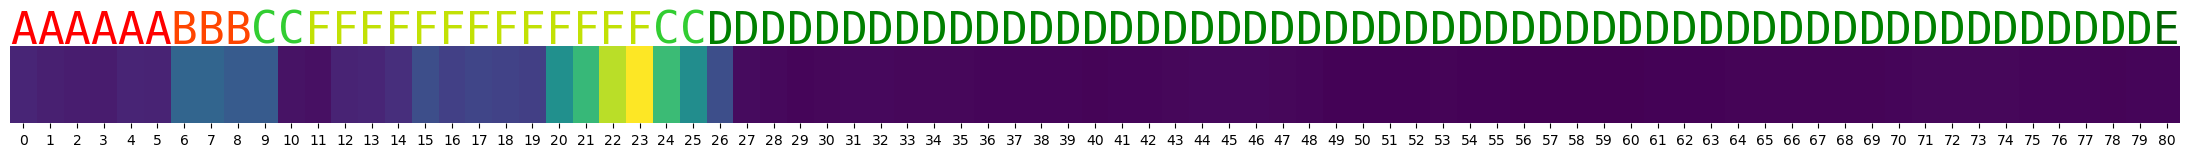

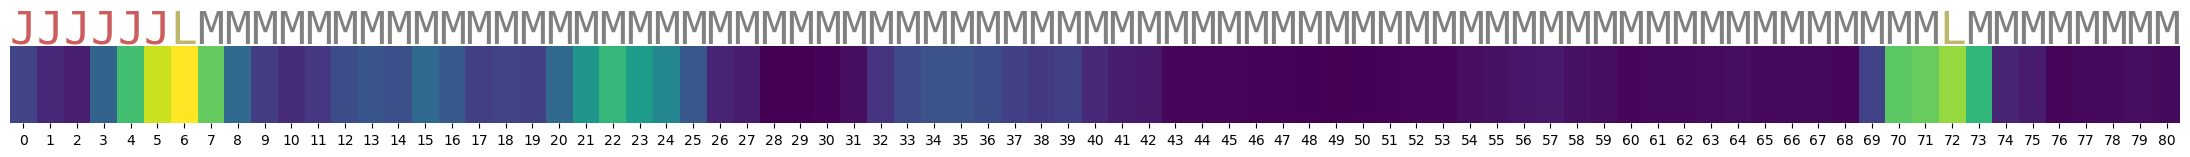

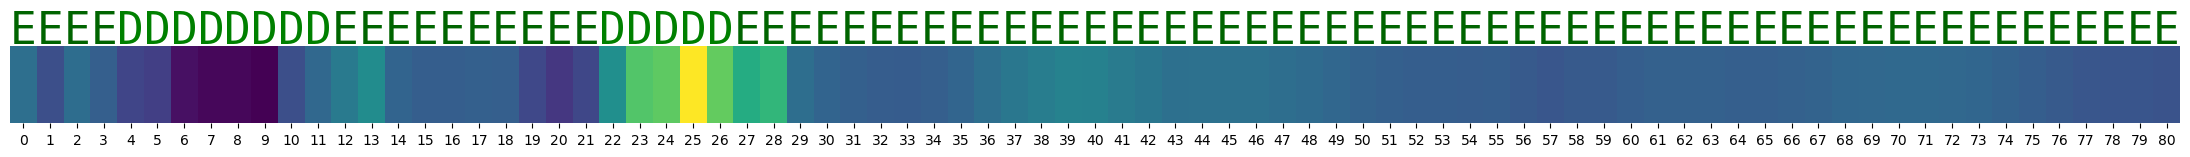

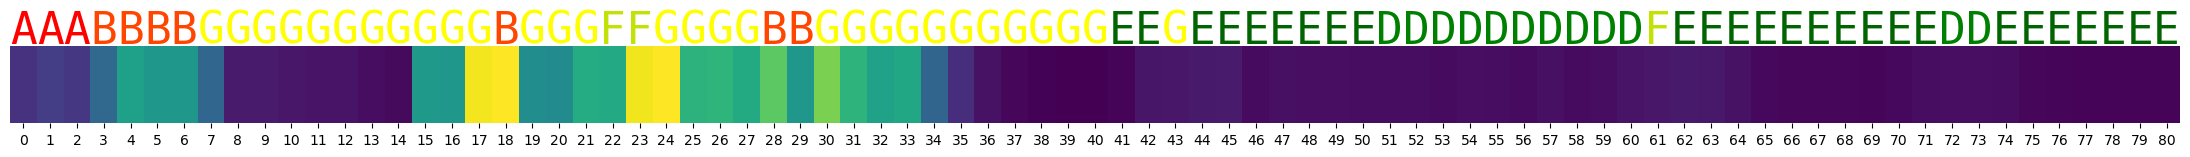

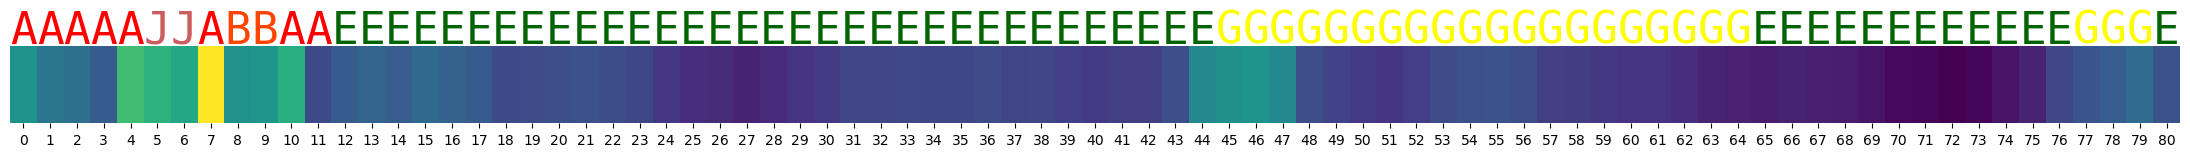

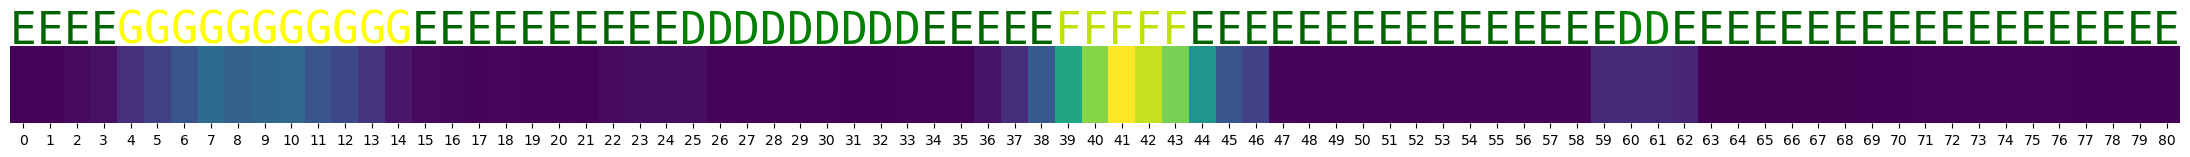

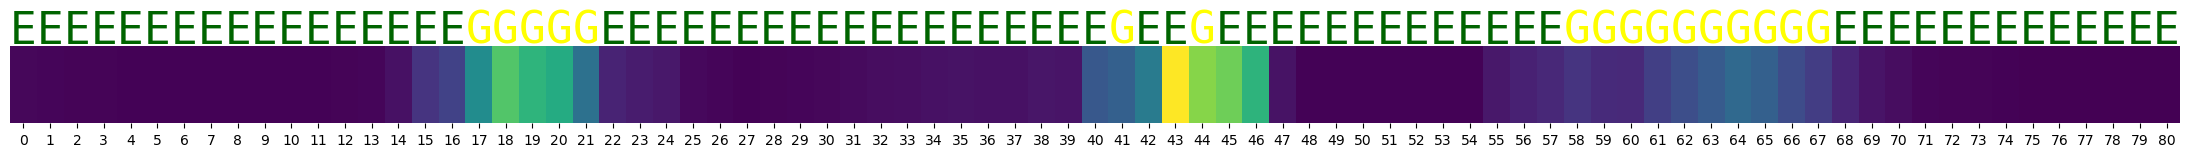

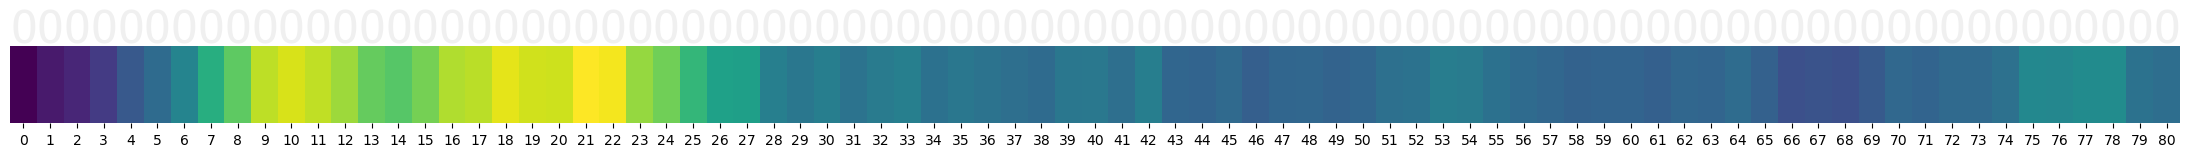

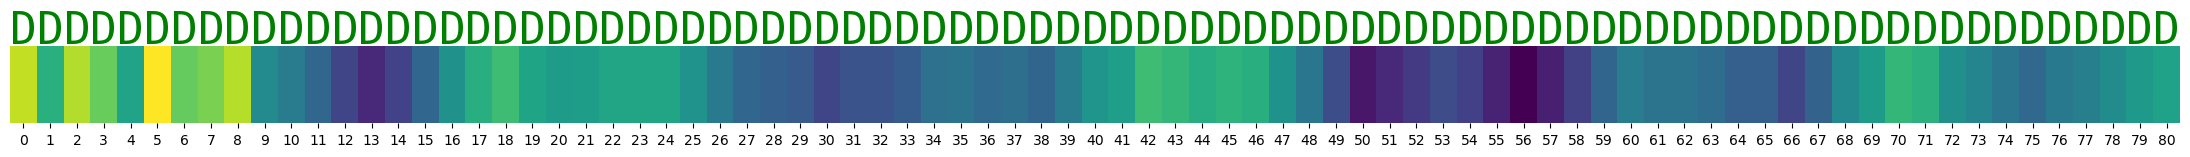

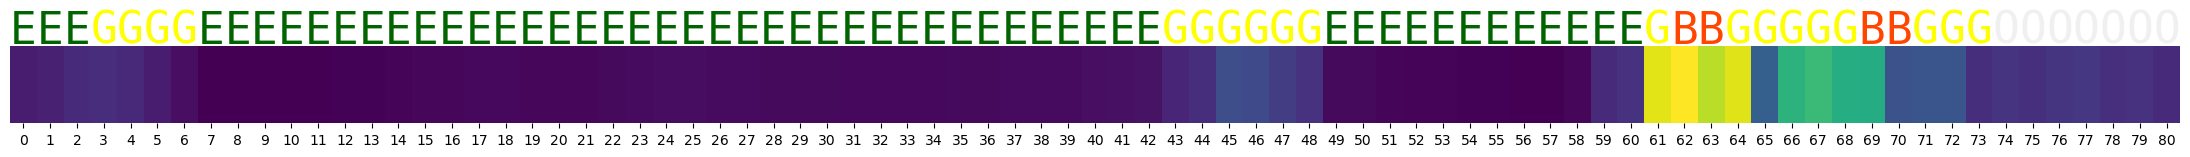

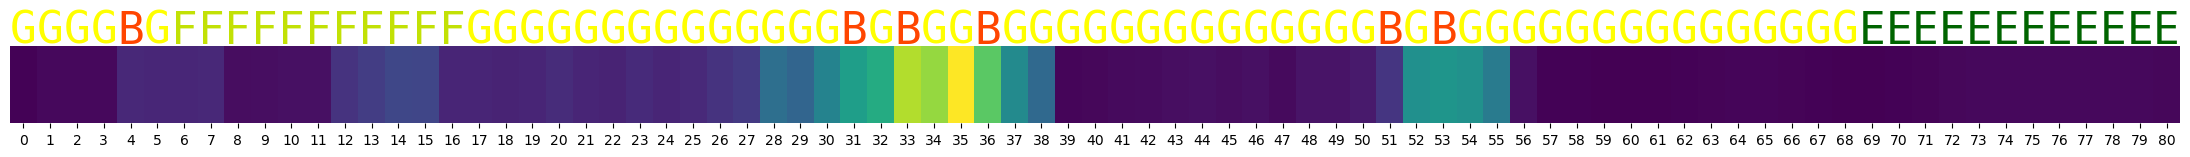

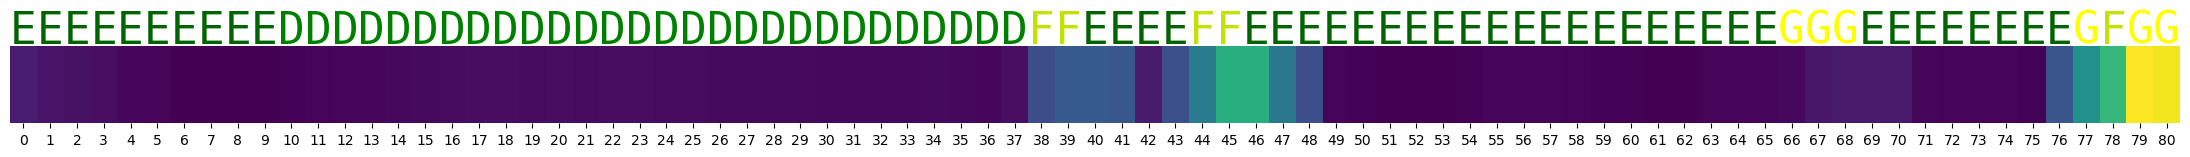

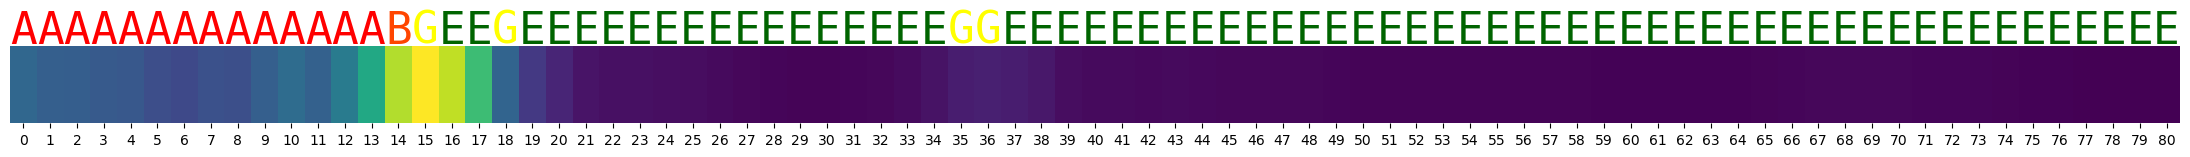

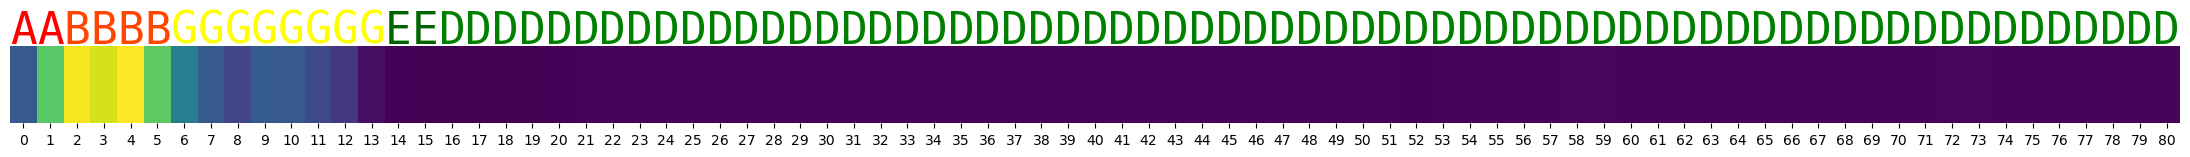

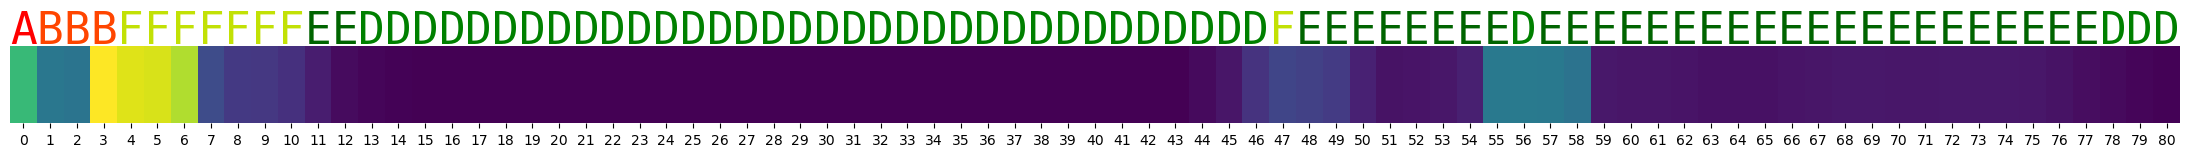

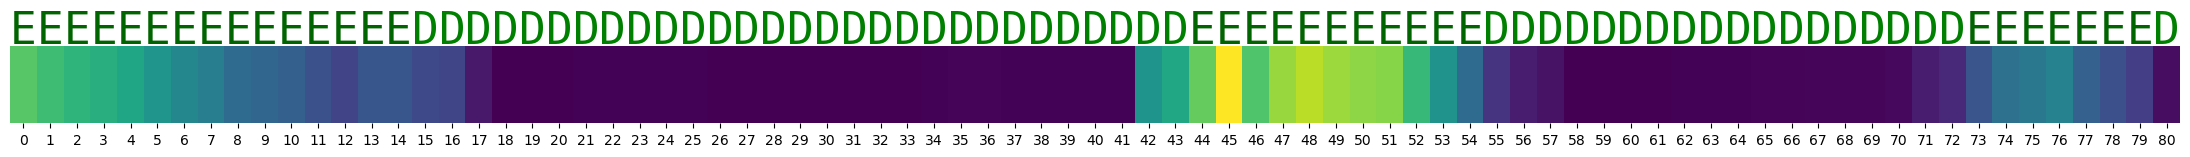

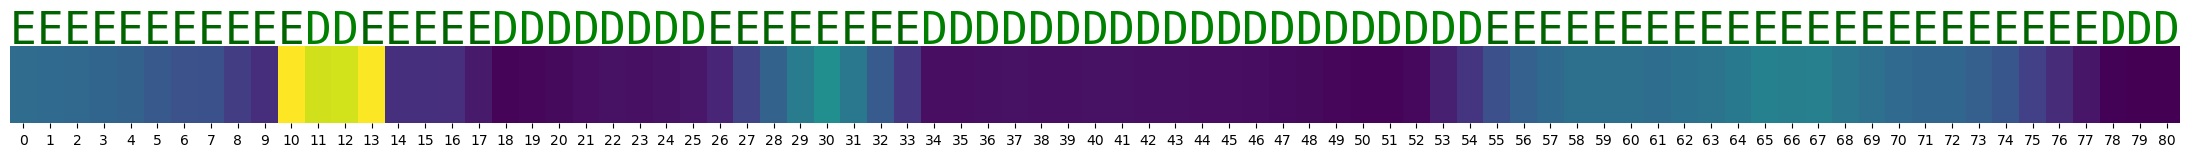

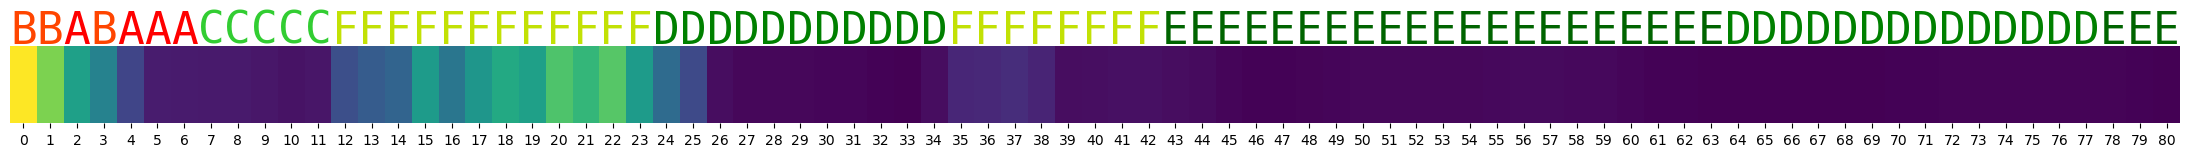

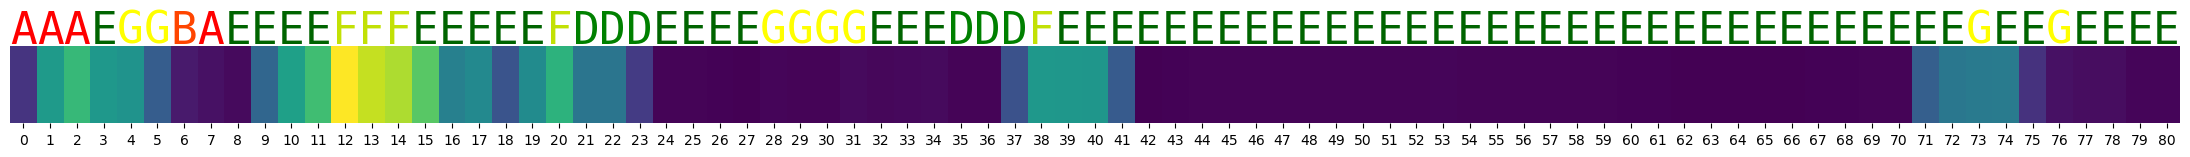

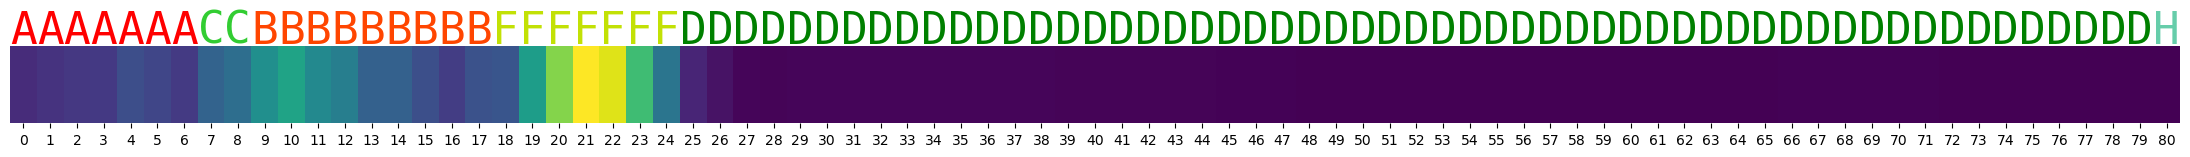

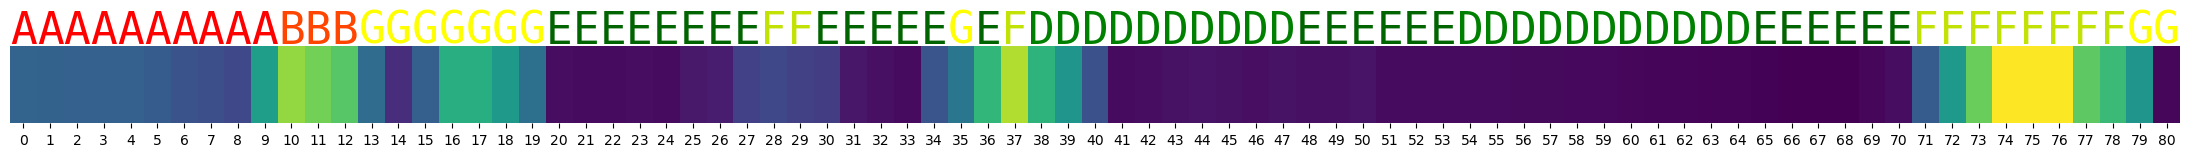

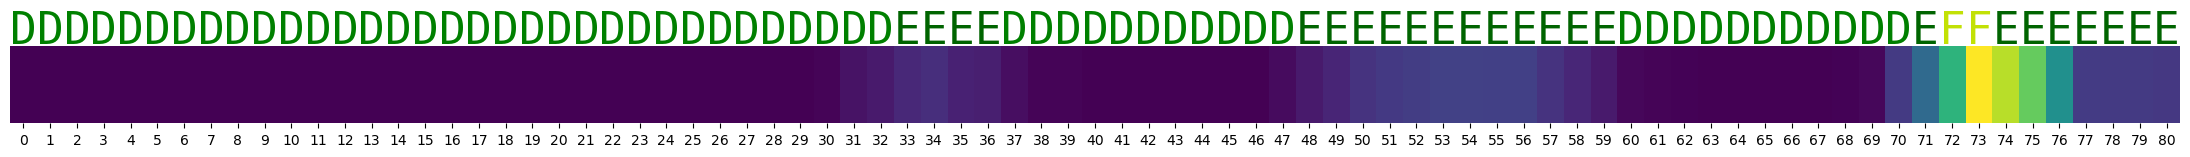

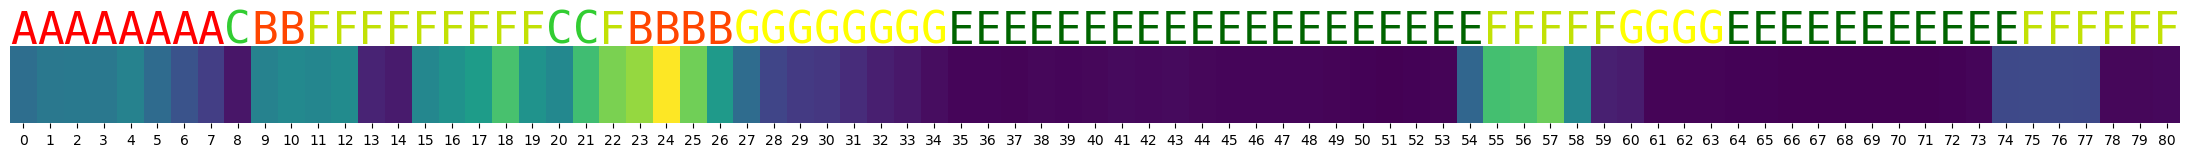

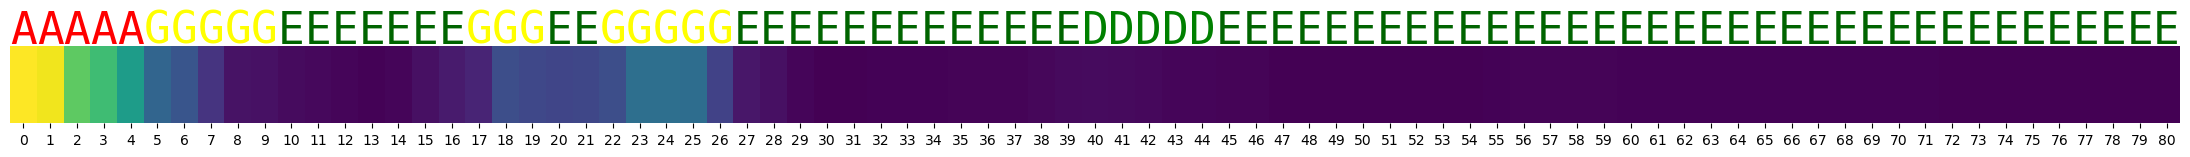

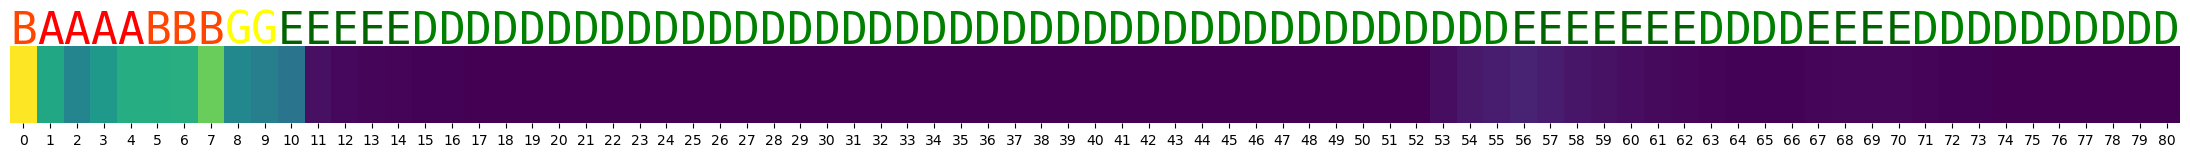

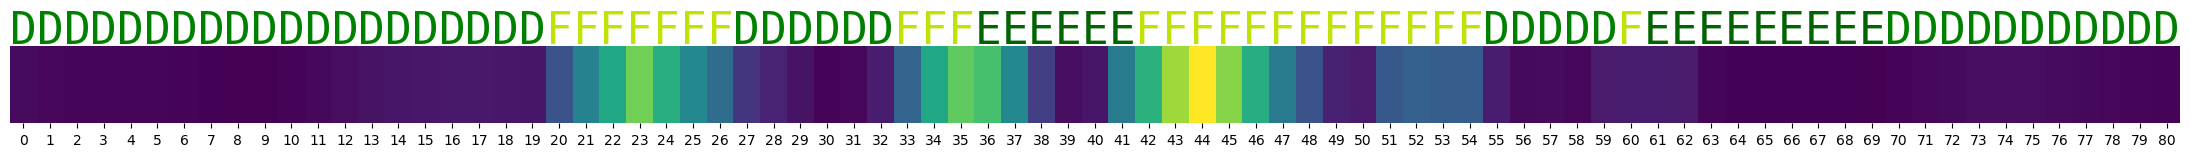

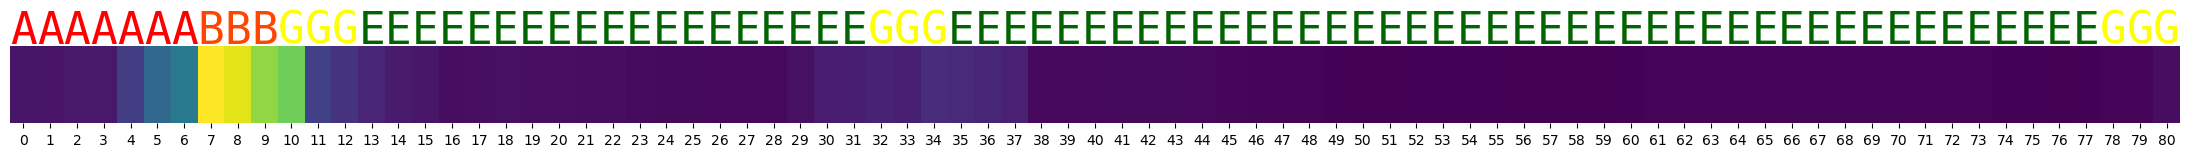

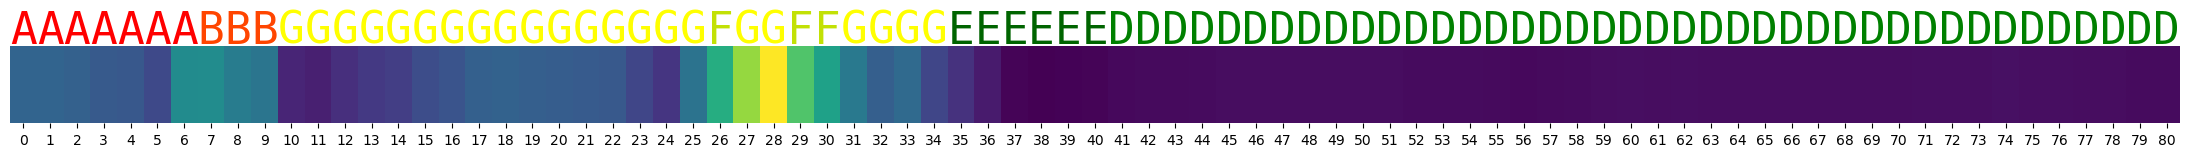

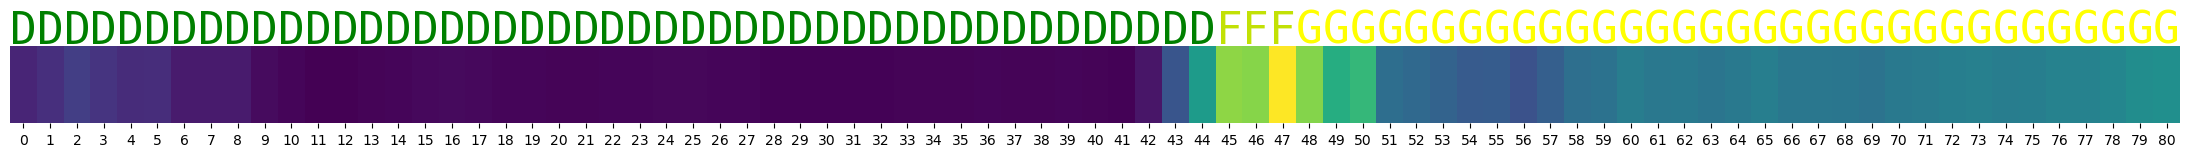

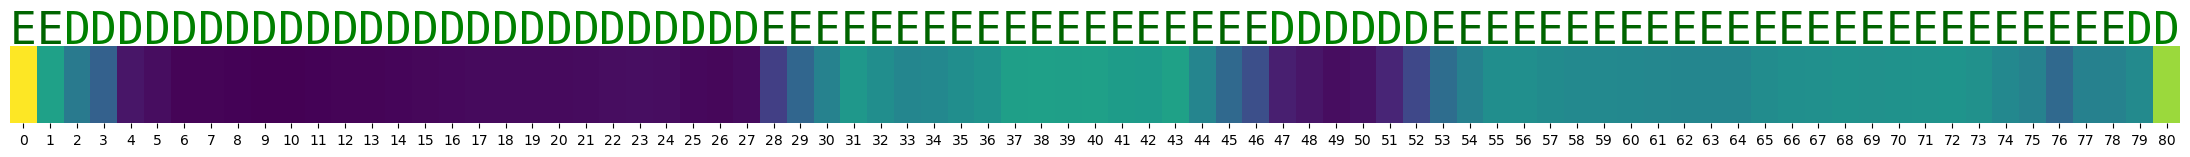

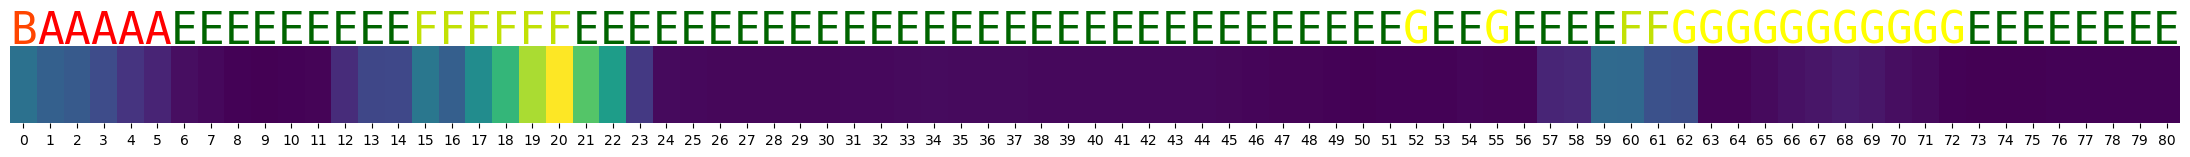

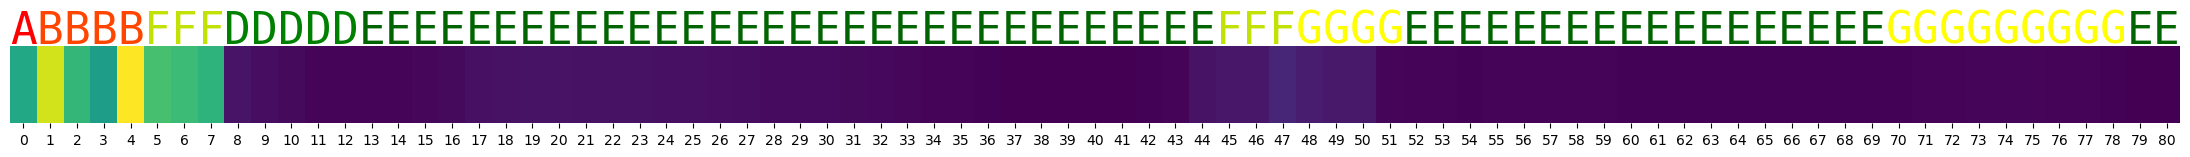

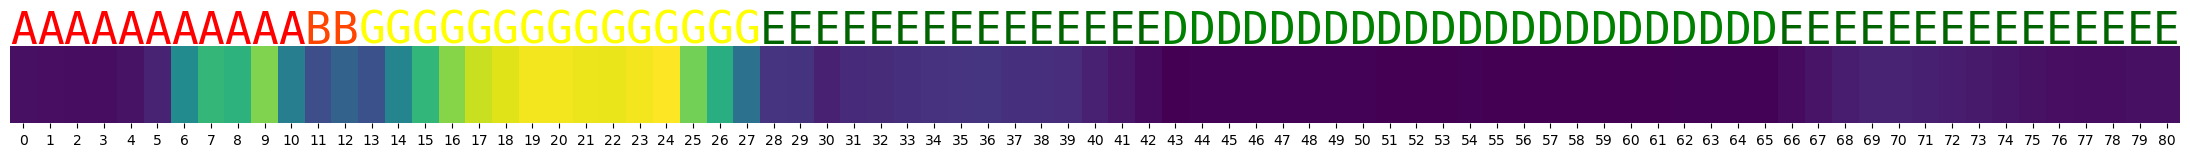

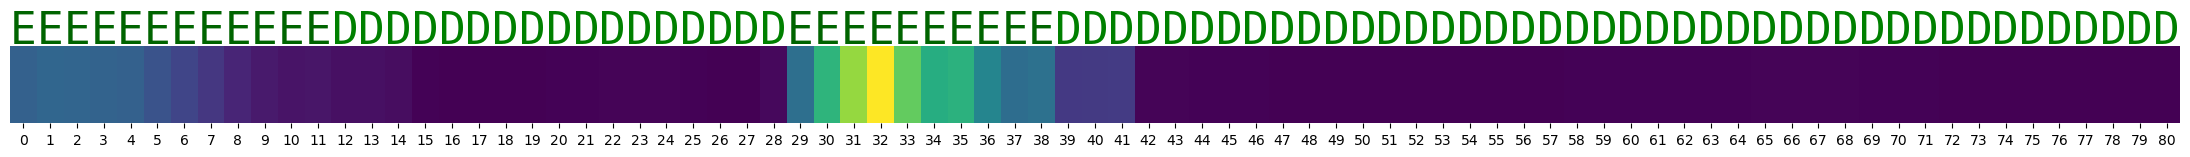

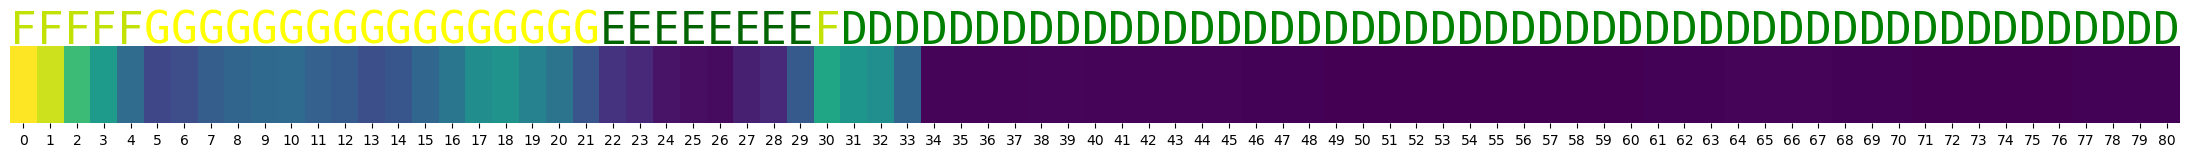

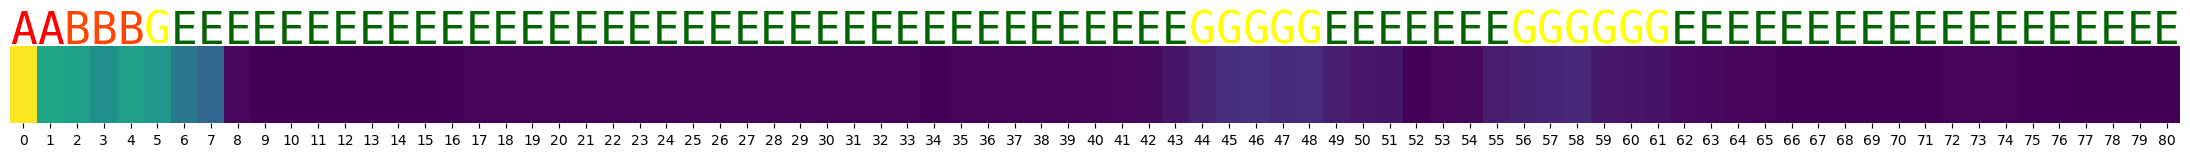

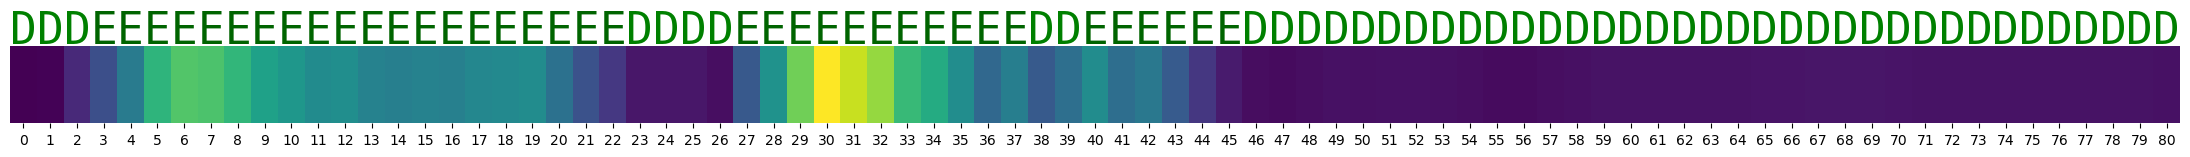

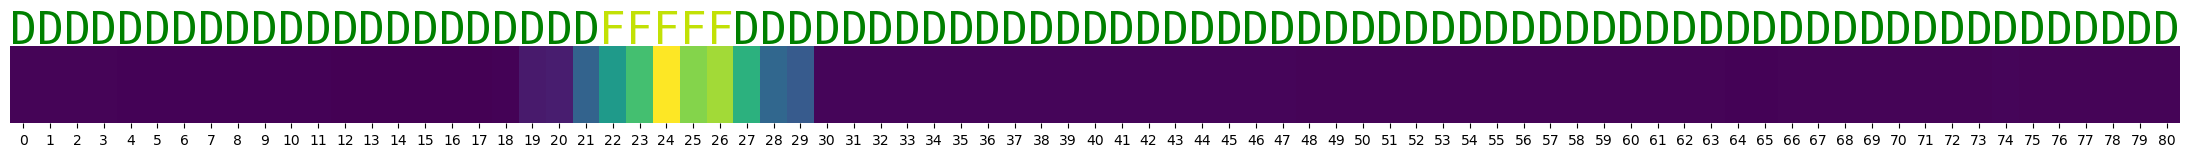

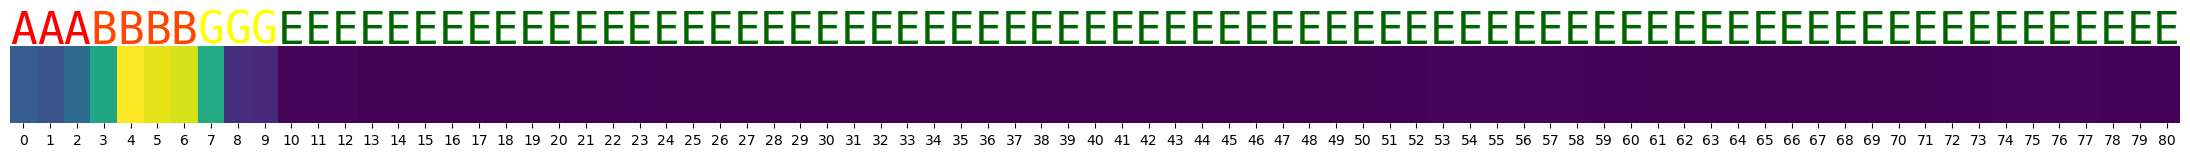

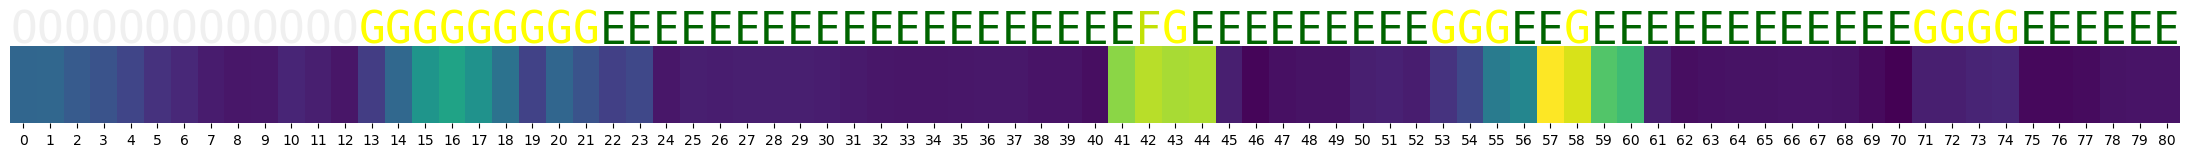

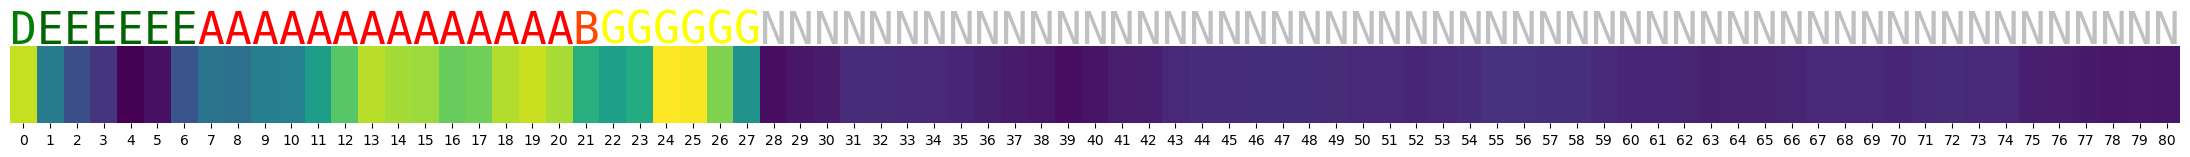

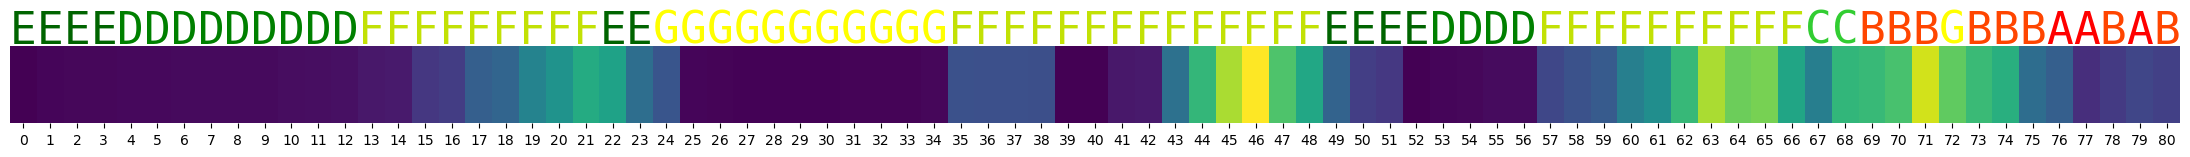

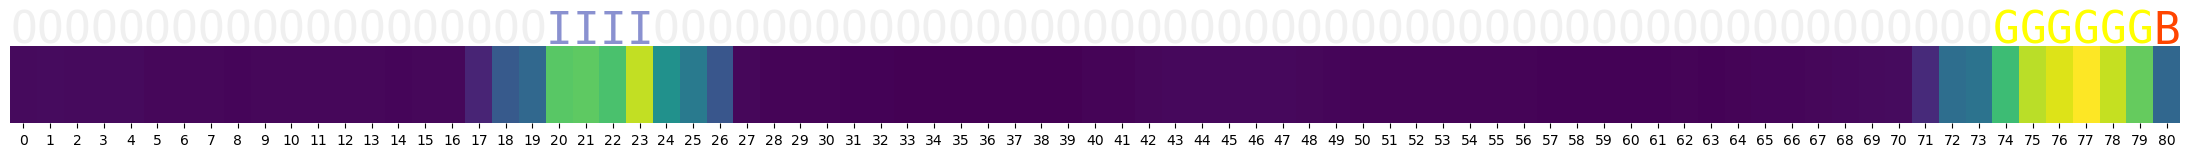

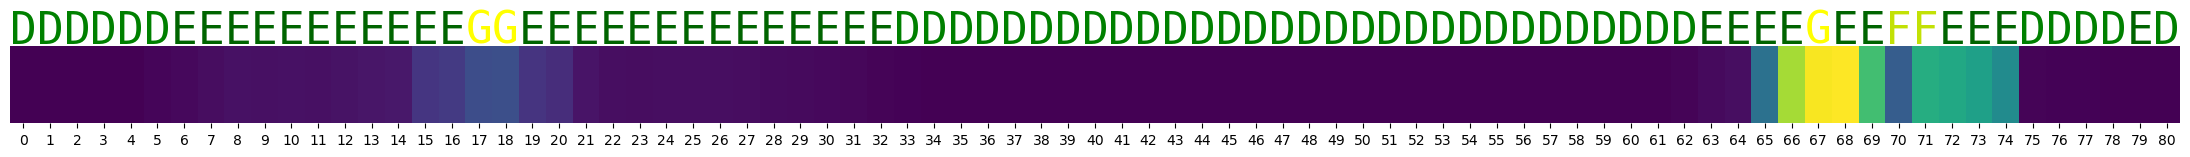

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming state_col_dict is defined somewhere above
# state_col_dict = {'A': 'red', 'G': 'green', ...}

################# Draw the entire entry #############################

for index, (dev_entry, atten_entry) in list(all_dict_1.items()):
    dev_tar = dev_entry['ori_seq']
    atten_tar = atten_entry.values.reshape(-1, 1).T  # Reshape to 2D array for heatmap

    # Get the lengths of the dev_tar and atten_tar
    dev_length = len(dev_tar)
    atten_length = atten_tar.shape[1]

    # Only proceed if atten_length is not longer than dev_length
    if atten_length <= dev_length:
        plt.figure(figsize=(28, 1))  # Adjusted height to give space for text
        
        # Add colored text for each letter in dev_tar above where the heatmap will be
        for i, letter in enumerate(dev_tar[:atten_length]):
            plt.text(i + 0.5, -0.2, letter, color=state_col_dict.get(letter, 'black'),
                     ha='center', va='center', fontsize=32, family='monospace')
        
        sns.heatmap(data=atten_tar, cmap="viridis", yticklabels=False, cbar=False)

        plt.show()  # Display the figure
#         print(f"Skipping index {index} as atten length ({atten_length}) is greater than dev length ({dev_length}).")

In [239]:
####################### draw the designated entry ######################
# strategy: 
# first function: extract the motif and score only, and show the figure
# secodn function: prepare the whole dataframe (column; all possible characters, row: length of the motif)

def get_motifWScore(all_dict_1, motif="GBBBG"):
    # all_dict_1 is the dictionary (key:index, value=tuple of motif and )
    for index, (dev_entry, atten_entry) in list(all_dict_1.items()):
        dev_tar = dev_entry['ori_seq']
        atten = atten_entry.values.reshape(-1, 1).T  # Reshape to 2D array for heatmap
        atten_tar = atten[0] # atten is a list of list, with one element
        
        if motif in dev_tar:
            start_index=dev_tar.find(motif)
            end_index=start_index+len(motif)
            
            if end_index <= len(atten_tar)+1:
                motif_found=dev_tar[start_index:end_index]
                score_found=atten_tar[start_index:end_index]
                score_found_norm=[item/sum(atten_tar) for item in score_found]  # normalize

                ### create the motif figures 
                fig_width=len(motif)*0.35
                
                ######## 2. Data strip with colored scores
                
                plt.figure(figsize=(fig_width, 1))  # Adjusted height to give space for text
                # Add colored text for each letter in dev_tar above the heatmap
                for i, letter in enumerate(motif_found):                    
                    plt.text(i + 0.5, -0.2, letter, color=state_col_dict.get(letter, 'black'),
                             ha='center', va='center', fontsize=32, family='monospace')

                sns.heatmap(data=[score_found], cmap="viridis", yticklabels=False, cbar=False)
                plt.show()
                return motif_found, score_found, score_found_norm

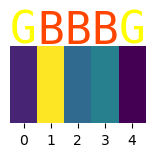

In [240]:
motif_found, score_found, score_found_norm=get_motifWScore(all_dict_1, motif="GBBBG")

In [236]:
motif_df

('GBBBG',
 array([0.24296161, 0.36762018, 0.27654782, 0.28899417, 0.22922759]),
 [0.037422959957138166,
  0.056623905982810585,
  0.042596185518628656,
  0.04451327586612238,
  0.03530753205866926])

In [222]:
####################### draw the designated entry ######################

def get_motifWScore(all_dict_1, motif="GBBBG"):
    # all_dict_1 is the dictionary (key:index, value=tuple of motif and )
    for index, (dev_entry, atten_entry) in list(all_dict_1.items()):
        dev_tar = dev_entry['ori_seq']
        atten = atten_entry.values.reshape(-1, 1).T  # Reshape to 2D array for heatmap
        atten_tar = atten[0] # atten is a list of list, with one element
        
        if motif in dev_tar:
            start_index = dev_tar.find(motif)
            end_index = start_index + len(motif)

            if end_index <= len(atten_tar) + 1:
                motif_found = dev_tar[start_index:end_index]
                score_found = atten_tar[start_index:end_index]
                score_found_norm = [item / sum(atten_tar) for item in score_found]
                

                # Create individual DataFrames for each character
                char_dataframes = {}
                for i, letter in enumerate(motif_found):
                    unique_key = f"{i}_{letter}"
                    score_list = [0] * len(motif_found)
                    score_list[i] = score_found_norm[i]
                    char_dataframes[unique_key] = pd.DataFrame({letter: score_list})
                    
                print(char_dataframes)

                # Plot individual logos in a single figure
                # Create a figure for the composite logo
                fig, axs = plt.subplots(1, len(motif_found), figsize=(len(motif_found) * 0.35, 1))

                # Generate and stitch together logos for each unique letter
                for i, letter in enumerate(motif_found):
                    # Create DataFrame for this letter
                    letter_df = pd.DataFrame({letter: [score_found_norm[i]]})
                        # ... Rest of your code for the data strip with colored scores ...
                # Generate logo for this letter
                logo = logomaker.Logo(letter_df, ax=axs[i], font_name="sans-serif", color_scheme=state_col_dict_num)

                # Adjust axes and labels as needed
                axs[i].set_ylabel("Normalized")
                axs[i].set_xticks([])
                axs[i].set_yticks([])
                axs[i].spines["top"].set_visible(False)
                axs[i].spines["right"].set_visible(False)

            plt.tight_layout()
            plt.show()

#         return motif_found, score_found, score_found_norm

        
#         if motif in dev_tar:
#             start_index=dev_tar.find(motif)
#             end_index=start_index+len(motif)
#             if end_index <= len(atten_tar)+1:
#                 motif_found=dev_tar[start_index:end_index]
#                 score_found=atten_tar[start_index:end_index]
#                 score_found_norm=[item/sum(atten_tar) for item in score_found]  # normalize
                
#                 ### create the motif figures 
#                 fig_width=len(motif)*0.35
                
#                 ######## 1. Dynamic height
#                 motif_found_sep=[char for char in motif_found]
#                 motif_score_dic={}
# #                 print(motif_found_sep)
#                 for i, letter in enumerate(motif_found_sep):
# #                     unique_key = f"{i}_{letter}"   # to deal with repetitive entries
#                     unique_key = f"{i}{letter}"   # to deal with repetitive entries

#                     score_list = [0] * len(letters)
#                     score_list[i] = score_found_norm[i]
#                     motif_score_dic[unique_key] = score_list
# #                 for i, letter in enumerate(motif_found_sep):
# #                     score_list=[0]*len(letters)
# #                     score_list[i]=score_found_norm[i]
# #                     motif_score_dic[letter]=score_list
                    
#                 motif_df=pd.DataFrame(motif_score_dic)
#                 print(motif_df)
#                 ####### this is to get back the repetitive entries to column
#                 motif_df_col=motif_df.columns.to_list()
#                 motif_df_col_re=[item[-1] for item in motif_df_col]
             
#                 motif_df.columns=motif_df_col_re
#                 print(motif_df)
#                 print(motif_df.dtypes)

#                 logo=logomaker.Logo(motif_df, font_name="sans-serif", color_scheme=state_col_dict_num, figsize=(fig_width,1))
#                 # for letter, color in state_col_dict_num.items():
#                 #     logo.style_glyphs_in_sequence(sequence=letter, color=color)
#                 logo.ax.set_ylabel("Normalized")
#                 # logo.ax.set_title("Letter Heights According to Scores")
#                 logo.ax.set_xticks(range(len(motif_df.columns)))
#                 logo.ax.spines["top"].set_visible(False)
#                 logo.ax.spines["right"].set_visible(False)
#                 plt.show()

#                 ######## 2. Data strip with colored scores
                
#                 plt.figure(figsize=(fig_width, 1))  # Adjusted height to give space for text
#                 # Add colored text for each letter in dev_tar above the heatmap
#                 for i, letter in enumerate(motif_found):                    
#                     plt.text(i + 0.5, -0.2, letter, color=state_col_dict.get(letter, 'black'),
#                              ha='center', va='center', fontsize=32, family='monospace')

#                 sns.heatmap(data=[score_found], cmap="viridis", yticklabels=False, cbar=False)
#     return motif_found, score_found, score_found_norm

<Figure size 640x480 with 0 Axes>

{'0_G':           G
0  0.037423
1  0.000000
2  0.000000
3  0.000000
4  0.000000, '1_B':           B
0  0.000000
1  0.056624
2  0.000000
3  0.000000
4  0.000000, '2_B':           B
0  0.000000
1  0.000000
2  0.042596
3  0.000000
4  0.000000, '3_B':           B
0  0.000000
1  0.000000
2  0.000000
3  0.044513
4  0.000000, '4_G':           G
0  0.000000
1  0.000000
2  0.000000
3  0.000000
4  0.035308}


/tmp/ipykernel_25333/2180085080.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


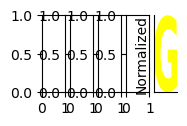

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

{'0_G':           G
0  0.016587
1  0.000000
2  0.000000
3  0.000000
4  0.000000, '1_B':           B
0  0.000000
1  0.043263
2  0.000000
3  0.000000
4  0.000000, '2_B':           B
0  0.000000
1  0.000000
2  0.038802
3  0.000000
4  0.000000, '3_B':           B
0  0.000000
1  0.000000
2  0.000000
3  0.039038
4  0.000000, '4_G':           G
0  0.000000
1  0.000000
2  0.000000
3  0.000000
4  0.030851}


/tmp/ipykernel_25333/2180085080.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


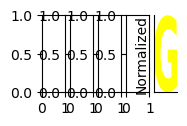

{'0_G':           G
0  0.004381
1  0.000000
2  0.000000
3  0.000000
4  0.000000, '1_B':           B
0  0.000000
1  0.004239
2  0.000000
3  0.000000
4  0.000000, '2_B':          B
0  0.00000
1  0.00000
2  0.00522
3  0.00000
4  0.00000, '3_B':           B
0  0.000000
1  0.000000
2  0.000000
3  0.005273
4  0.000000, '4_G':           G
0  0.000000
1  0.000000
2  0.000000
3  0.000000
4  0.005328}


/tmp/ipykernel_25333/2180085080.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


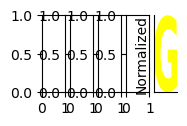

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

TypeError: cannot unpack non-iterable NoneType object

In [207]:
motif_found, score_found, score_found_norm=get_motifWScore(all_dict_1, motif="GBBBG")

In [154]:
data = {
    '0_A': [1, 2, 3],
    '1_B': [4, 5, 6],
    '2_A': [7, 8, 9],
    '3_C': [10, 11, 12]}
test_df=pd.DataFrame(data)

In [157]:
test_df.columns.to_list()

['0_A', '1_B', '2_A', '3_C']

In [158]:
[item[-1] for item in test_df.columns.to_list()]

['A', 'B', 'A', 'C']

In [61]:
for index, (dev_entry, atten_entry) in list(all_dict_1.items()):
    dev_tar = dev_entry['ori_seq']
    atten_tar = atten_entry.values.reshape(-1, 1).T
    print(dev_tar)
    print(atten_tar)
    break

AABBBBGGEEDDFDDDD
[[0.13960469 0.23908932 0.36994302 0.35861821 0.36491524 0.29730704
  0.15250862 0.08396216 0.04956359 0.1421967  0.33051414 0.32814538
  0.32745696 0.22323808 0.03306575 0.02560536 0.02302926 0.02029366
  0.01128953 0.01115505 0.01018743 0.0100993  0.01108158 0.01180866
  0.01300614 0.01384082 0.01327263 0.01266926 0.01107429 0.00970276
  0.0090755  0.00855201 0.00858864 0.00842566 0.00862201 0.00867252
  0.00871144 0.00948756 0.00941733 0.01006541 0.01075099 0.01067536
  0.01178779 0.01164163 0.0115325  0.01162196 0.01087265 0.01107508
  0.0109432  0.01066455 0.01041546 0.01007172 0.01005131 0.01006118
  0.01012713 0.00982707 0.00947596 0.00924403 0.00923507 0.00927428
  0.00935594 0.00962311 0.01002337 0.01000216 0.00993431 0.01001593
  0.00953334 0.00930405 0.00935945 0.00919876 0.00929891 0.01027909
  0.01054125 0.0106697  0.01152516 0.01078801 0.01033074 0.00990402
  0.00892215 0.00859546 0.00842014]]


In [4]:
path="../database/motif/gene_exp/4mer/test02_double_data"
or_not_dirs=[item for item in os.listdir(path) if "not" in item and "bu" not in item]
or_not_dirs

['Ghexp_rpkm10_or_not',
 'Ghexp_rpkm20_or_not',
 'Ghexp_rpkm30_or_not',
 'Ghexp_rpkm50_or_not']

In [23]:
path_exp=[os.path.join(path,item) for item in or_not_dirs]
sorted(path_exp)

['../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm10_or_not',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm20_or_not',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_not',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm50_or_not']

In [25]:
motif_all=[]
freq_all=[]
for item in sorted(path_exp):
    all_contents=os.listdir(item)
    contents=[one for one in all_contents if ".txt" in one]
    
    motif_temp=[]
    freq_temp=[]
    for file in contents:
        match = re.search(r'motif_([A-Z]+)_(\d+)\.txt', file)
        motif=match.group(1)
        motif_temp.append(motif)
        
        freq=match.group(2)
        freq_temp.append(freq)
    motif_all.append(motif_temp)
    freq_all.append(freq_temp)
        
print(motif_all)
print(freq_all)

[['DDDDE', 'EEGGE', 'EEEDD', 'GGGGG', 'EEEEE'], ['EEEDD', 'DDDDD', 'BBBBA', 'EEEGG', 'GGGBB', 'FFFFF', 'BBGGG', 'FFFDDD', 'GGGEE', 'EEEEE', 'FFFDD', 'DDDDD', 'EEEDD', 'EEEFF', 'BBBBBB'], ['ABBBB', 'FFFFF', 'GBBBG', 'EEDDD', 'GGGGB', 'FFFEE', 'DEEEE'], ['FFFFF', 'DEEEE', 'DDDDD', 'EEDDD']]
[['12', '5', '7', '4', '4'], ['33', '4', '4', '3', '6', '5', '3', '5', '11', '13', '10', '9', '5', '3', '3'], ['5', '36', '3', '6', '13', '4', '5'], ['9', '5', '4', '5']]


In [26]:
list1=motif_all
list2=freq_all

In [27]:
# Create four data frames
dfs = []
for sublist1, sublist2 in zip(list1, list2):
    df = pd.DataFrame({'Column1': sublist1, 'Column2': sublist2})
    dfs.append(df)

# Access each data frame
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]

# Print the data frames
print("DataFrame 1:")
print(df1)
print()

print("DataFrame 2:")
print(df2)
print()

print("DataFrame 3:")
print(df3)
print()

print("DataFrame 4:")
print(df4)

DataFrame 1:
  Column1 Column2
0   DDDDE      12
1   EEGGE       5
2   EEEDD       7
3   GGGGG       4
4   EEEEE       4

DataFrame 2:
   Column1 Column2
0    EEEDD      33
1    DDDDD       4
2    BBBBA       4
3    EEEGG       3
4    GGGBB       6
5    FFFFF       5
6    BBGGG       3
7   FFFDDD       5
8    GGGEE      11
9    EEEEE      13
10   FFFDD      10
11   DDDDD       9
12   EEEDD       5
13   EEEFF       3
14  BBBBBB       3

DataFrame 3:
  Column1 Column2
0   ABBBB       5
1   FFFFF      36
2   GBBBG       3
3   EEDDD       6
4   GGGGB      13
5   FFFEE       4
6   DEEEE       5

DataFrame 4:
  Column1 Column2
0   FFFFF       9
1   DEEEE       5
2   DDDDD       4
3   EEDDD       5


In [2]:
test_path="../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/"
test_filelist=[os.path.join(test_path,file) for file in os.listdir(test_path) if ".txt" in file]
test_filelist

['../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_EEEDD_5.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_GGGBB_8.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_BBBBB_5.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_CCCCC_3.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_FFFFB_10.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_DFEEE_3.txt']

In [3]:
[word for word in test_path.split("/")[-2:] if word !=""][0]

'Ghexp_rpkm30_or_exp'

In [4]:
motifs={}
for file_name in test_filelist:
    motif, num_txt=file_name.split("/")[-1].split("_")[1:3]
    freq=num_txt.split(".")[0]
    motifs[motif]=int(freq)

In [5]:
motifs

{'EEEDD': 5, 'GGGBB': 8, 'BBBBB': 5, 'CCCCC': 3, 'FFFFB': 10, 'DFEEE': 3}

In [38]:
wc=WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wordcloud=wc.generate_from_frequencies(motifs)

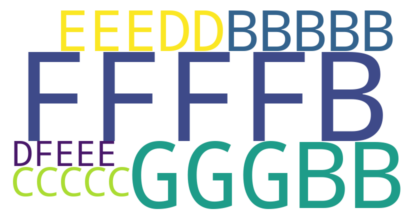

In [39]:
plt.figure(figsize=(6,2), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [86]:
def create_motif_wordcloud(path, color_map="Set2"):
    target=[word for word in path.split("/")[-2:] if word !=""][0]
    print("target", target)
    file_lst=[os.path.join(path,file) for file in os.listdir(path) if ".txt" in file]
    motifs={}
    for file_name in file_lst:
        motif, num_txt=file_name.split("/")[-1].split("_")[1:3]
        freq=num_txt.split(".")[0]
        motifs[motif]=int(freq)
    print("motifs = ", motifs)
    wc=WordCloud(width=800, height=400, background_color="white", colormap=color_map)
    wordcloud=wc.generate_from_frequencies(motifs)
    plt.figure(figsize=(6,2), facecolor=None)
#     plt.imshow(wordcloud, interpolation="bilinear")
    plt.imshow(wordcloud, interpolation="nearest")
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    output_path="../database/figs/"+target+"_motif_wordcloud.pdf"
    plt.savefig(output_path,format="pdf", dpi=500 )
    plt.show()

In [87]:
path="../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_not/"

target Ghexp_rpkm30_or_not
motifs =  {'ABBBB': 5, 'FFFFF': 36, 'GBBBG': 3, 'EEDDD': 6, 'GGGGB': 13, 'FFFEE': 4, 'DEEEE': 5}


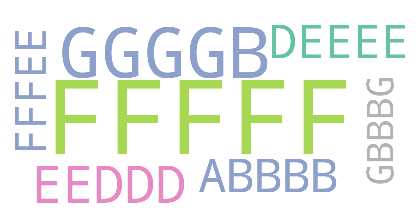

In [88]:
create_motif_wordcloud(path)

target Ghexp_rpkm30_or_exp
motifs =  {'EEEDD': 5, 'GGGBB': 8, 'BBBBB': 5, 'CCCCC': 3, 'FFFFB': 10, 'DFEEE': 3}


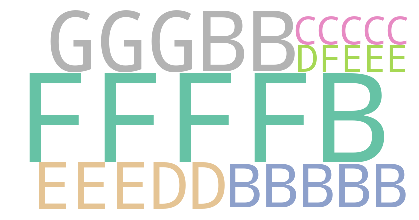

In [129]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/")

target Ghexp_rpkm10_or_not
motifs =  {'DDDDE': 12, 'EEGGE': 5, 'EEEDD': 7, 'GGGGG': 4, 'EEEEE': 4}


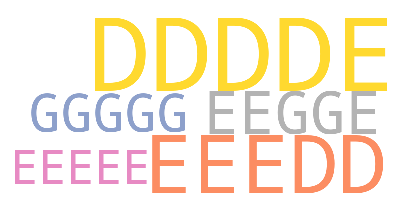

In [90]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm10_or_not/")

target Ghexp_rpkm10_or_exp
motifs =  {'EEEEE': 12, 'FFFFF': 5, 'BBBBB': 3, 'BGGGG': 4, 'DDDDEE': 5}


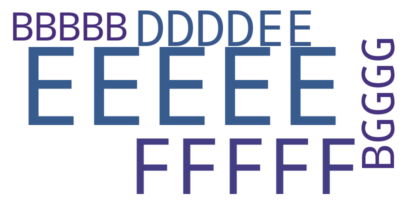

In [185]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm10_or_exp/")

target Ghexp_rpkm20_or_not
motifs =  {'EEEDD': 5, 'DDDDD': 9, 'BBBBA': 4, 'EEEGG': 3, 'GGGBB': 6, 'FFFFF': 5, 'BBGGG': 3, 'FFFDDD': 5, 'GGGEE': 11, 'EEEEE': 13, 'FFFDD': 10, 'EEEFF': 3, 'BBBBBB': 3}


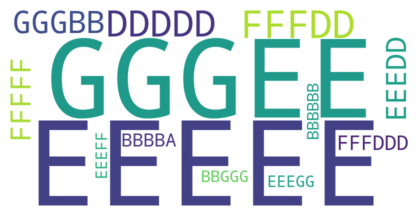

In [186]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm20_or_not/")

target Ghexp_rpkm20_or_exp
motifs =  {'EEEEE': 13, 'BBBBB': 4, 'GGBBB': 3, 'GGGGGG': 8}


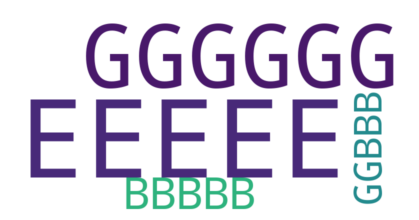

In [187]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm20_or_exp/")

target Ghexp_rpkm50_or_not
motifs =  {'FFFFF': 9, 'DEEEE': 5, 'DDDDD': 4, 'EEDDD': 5}


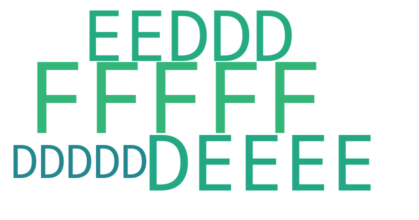

In [188]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm50_or_not/")

target Ghexp_rpkm50_or_exp
motifs =  {'DFFFF': 12, 'GGGGB': 5}


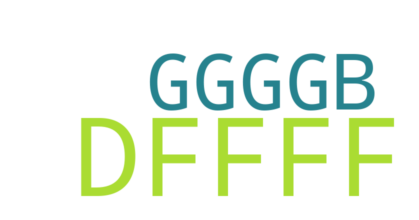

In [189]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm50_or_exp/")

**Fixing the size of the word according to the relative frequency**
gone fail..

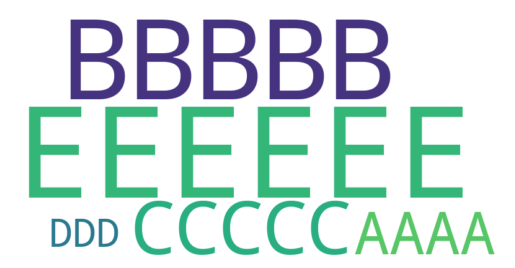

In [243]:
# Your word frequency dictionary
word_freqs = {"AAAA": 3, "BBBBB": 15, "CCCCC": 5, "DDD":1, "EEEEEE":20}

# Custom function to adjust font size based on frequency
def size_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return font_size * word_freqs[word] / sum(word_freqs.values())

# Create the WordCloud with a fixed random state and apply the custom font size function
random_integer = random.randint(1, 100)
wc = WordCloud(background_color="white", random_state=42, width=800, height=400, contour_width=size_func)
wc.generate_from_frequencies(word_freqs)
wc.recolor(color_func=None, random_state=None)

# Plot the WordCloud
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
hexa_state_col_dict

{'A': '#ff0000',
 'B': '#ff4500',
 'C': '#32cd32',
 'D': '#008000',
 'E': '#006400',
 'F': '#c2e105',
 'G': '#ffff00',
 'H': '#66cdaa',
 'I': '#8a91d0',
 'J': '#cd5c5c',
 'K': '#e9967a',
 'L': '#bdb76b',
 'M': '#808080',
 'N': '#c0c0c0',
 'O': '#f0f0f0'}

In [15]:
color_map_string=",".join(hexa_state_col_dict.values())

In [17]:
text = ' '.join([' '.join([motif]*count) for motif, count in motifs.items()])

In [18]:
text

'EEEDD EEEDD EEEDD EEEDD EEEDD GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB BBBBB BBBBB BBBBB BBBBB BBBBB CCCCC CCCCC CCCCC FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB DFEEE DFEEE DFEEE'

In [19]:
stylecloud.gen_stylecloud(text=text, size=1024, icon_name="fas fa-cloud", palette=color_map_string,
                         background_color="white", output_name="custom.png")

ModuleNotFoundError: No module named 'palettable.'